In [53]:
from utilities_ketamine_analysis_v5 import *
import copy

In [54]:
whos

Variable                             Type           Data/Info
-------------------------------------------------------------
ExtractDigital                       function       <function ExtractDigital at 0x00000233E275E310>
Int2Volts                            function       <function Int2Volts at 0x00000233E2754DC0>
Isomap                               type           <class 'sklearn.manifold._isomap.Isomap'>
NormalizeData                        function       <function NormalizeData at 0x00000233DEBBCCA0>
Parallel                             type           <class 'joblib.parallel.Parallel'>
Path                                 type           <class 'pathlib.Path'>
Pos_process                          function       <function Pos_process at 0x00000233DEBC5CA0>
SampRate                             function       <function SampRate at 0x00000233E2754D30>
TdmsFile                             type           <class 'nptdms.tdms.TdmsFile'>
Tk                                   type           

# Filenames to analyze

In [55]:
binPath = r'C:\Users\fentonlab\Desktop\Gino\SPK\electrophysiology\\'
binFullPath = Path(binPath)

In [56]:
#nt_Path for behavior
#sync_path for sync pulse
#ksort_path

dlc_path = binFullPath.parents[1]

files = dlc_path.glob('**/*.mat')

sync_path=[]
nt_path=[]

for i in sorted(files):
    
    if 'sync' in str(i): 
        print(i)
        sync_path.append(i)
        
    if 'behavior' in str(i): 
        print(i)
        nt_path.append(i)

print(nt_path[-1])

C:\Users\fentonlab\Desktop\Gino\SPK\behavior\2022-07-27_07-41-00_M015_SAL_PFC_HPC_0_0_0mpk.mat
C:\Users\fentonlab\Desktop\Gino\SPK\behavior\2022-07-28_13-19-00_M016_SAL_PFC_HPC_0_0_0mpk.mat
C:\Users\fentonlab\Desktop\Gino\SPK\behavior\2022-08-01_04-30-00_M015_RSK_mPFC_HPC_3_10_30mpk.mat
C:\Users\fentonlab\Desktop\Gino\SPK\behavior\2022-08-03_12-45-00_M015_RSK_mPFC_HPC_3_10_30mpk.mat
C:\Users\fentonlab\Desktop\Gino\SPK\behavior\2022-08-04_03-45-00_M016_RSK_mPFC_HPC_3_10_30mpk.mat
C:\Users\fentonlab\Desktop\Gino\SPK\behavior\2022-08-06-05-20-00_M016_RSK_mPFC_HPC_3_10_30mpk.mat
C:\Users\fentonlab\Desktop\Gino\SPK\behavior\2022-08-08-04-05-00_M017_SAL_mPFC_HPC_0_0_0mpk.mat
C:\Users\fentonlab\Desktop\Gino\SPK\behavior\2022-08-11-01-55-00_M018_SAL_mPFC_HPC_0_0_0mpk.mat
C:\Users\fentonlab\Desktop\Gino\SPK\behavior\2022-08-12-02-35-00_M017_RSK_mPFC_HPC_3_10_30mpk.mat
C:\Users\fentonlab\Desktop\Gino\SPK\behavior\2022-08-13-03-57-00_M018_RSK_mPFC_HPC_3_10_30mpk.mat
C:\Users\fentonlab\Desktop\Gin

In [57]:
sync_path

[WindowsPath('C:/Users/fentonlab/Desktop/Gino/SPK/sync/2022-07-27_07-41-00_M015_SAL_PFC_HPC_0_0_0mpk.mat'),
 WindowsPath('C:/Users/fentonlab/Desktop/Gino/SPK/sync/2022-07-28_13-19-00_M016_SAL_PFC_HPC_0_0_0mpk.mat'),
 WindowsPath('C:/Users/fentonlab/Desktop/Gino/SPK/sync/2022-08-01_04-30-00_M015_RSK_mPFC_HPC_3_10_30mpk.mat'),
 WindowsPath('C:/Users/fentonlab/Desktop/Gino/SPK/sync/2022-08-03_12-45-00_M015_RSK_mPFC_HPC_3_10_30mpk.mat'),
 WindowsPath('C:/Users/fentonlab/Desktop/Gino/SPK/sync/2022-08-04_03-45-00_M016_RSK_mPFC_HPC_3_10_30mpk.mat'),
 WindowsPath('C:/Users/fentonlab/Desktop/Gino/SPK/sync/2022-08-06-05-20-00_M016_RSK_mPFC_HPC_3_10_30mpk.mat'),
 WindowsPath('C:/Users/fentonlab/Desktop/Gino/SPK/sync/2022-08-08-04-05-00_M017_SAL_mPFC_HPC_0_0_0mpk.mat'),
 WindowsPath('C:/Users/fentonlab/Desktop/Gino/SPK/sync/2022-08-11-01-55-00_M018_SAL_mPFC_HPC_0_0_0mpk.mat'),
 WindowsPath('C:/Users/fentonlab/Desktop/Gino/SPK/sync/2022-08-12-02-35-00_M017_RSK_mPFC_HPC_3_10_30mpk.mat'),
 WindowsPat

In [62]:
#Example of how to append two files together
dlc_path = binFullPath
ksort_HPC_path=[]
ksort_PFC_path=[]

files = os.listdir(dlc_path)
for i in sorted(files):
            
    if 'HPCprobe' in str(i): 
        ksort_HPC_path.append(Path(r'C:\Users\fentonlab\Desktop\Gino\SPK\electrophysiology\\' + i))
        print(i)
    if 'PFCprobe' in str(i): 
        ksort_PFC_path.append(Path(r'C:\Users\fentonlab\Desktop\Gino\SPK\electrophysiology\\' + i))      
        print(i)
        
print(ksort_HPC_path)

2022-07-27_07-41-00_M015_SAL_PFC_HPC_0_0_0mpk_HPCprobe
2022-07-27_07-41-00_M015_SAL_PFC_HPC_0_0_0mpk_PFCprobe
2022-07-28_13-19-00_M016_SAL_PFC_HPC_0_0_0mpk_HPCprobe
2022-07-28_13-19-00_M016_SAL_PFC_HPC_0_0_0mpk_PFCprobe
2022-08-01_04-30-00_M015_RSK_mPFC_HPC_3_10_30mpk_HPCprobe
2022-08-01_04-30-00_M015_RSK_mPFC_HPC_3_10_30mpk_PFCprobe
2022-08-03_12-45-00_M015_RSK_mPFC_HPC_3_10_30mpk_HPCprobe
2022-08-03_12-45-00_M015_RSK_mPFC_HPC_3_10_30mpk_PFCprobe
2022-08-04_03-45-00_M016_RSK_mPFC_HPC_3_10_30mpk_HPCprobe
2022-08-04_03-45-00_M016_RSK_mPFC_HPC_3_10_30mpk_PFCprobe
2022-08-06-05-20-00_M016_RSK_mPFC_HPC_3_10_30mpk_HPCprobe
2022-08-06-05-20-00_M016_RSK_mPFC_HPC_3_10_30mpk_PFCprobe
2022-08-08-04-05-00_M017_SAL_mPFC_HPC_0_0_0mpk_HPCprobe
2022-08-08-04-05-00_M017_SAL_mPFC_HPC_0_0_0mpk_PFCprobe
2022-08-11-01-55-00_M018_SAL_mPFC_HPC_0_0_0mpk_HPCprobe
2022-08-11-01-55-00_M018_SAL_mPFC_HPC_0_0_0mpk_PFCprobe
2022-08-12-02-35-00_M017_RSK_mPFC_HPC_3_10_30mpk_HPCprobe
2022-08-12-02-35-00_M017_RSK_mPFC_

# Behavior

### Load neurotar

In [59]:
pip install mat73

Note: you may need to restart the kernel to use updated packages.


In [63]:
print(len(nt_path),len(sync_path),len(ksort_HPC_path))

36 36 36


In [64]:
import mat73
ts_ephys_aln = []
nt_sync_aln = []
camera_sync_aln = []
ioFS = []
x = []
y = []
yaw = []
speed = []
sync_bool = []

for ipath in range(0,len(nt_path)):
    
    ipathsync = sync_path[ipath]
    ipathnt = nt_path[ipath]

    print('experiment',ipathsync)
    
    # raw files for sync and behavior
    sync_extracted = mat73.loadmat(ipathsync)
    behavior = loadmat(ipathnt)
    
    if np.abs(sync_extracted['samplesSyncAP_HPCprobe'].size - sync_extracted['samplesCamera'].size) < 1000:
        
        ts_ephys_aln.append(sync_extracted['samplesSyncAP_HPCprobe'])
        nt_sync_aln.append(sync_extracted['samplesNeurotarStrobe'])
        camera_sync_aln.append(sync_extracted['samplesCamera'])
        ioFS.append(sync_extracted['ioFS'])
        
        x.append(behavior['nt_x'][0])
        y.append(behavior['nt_y'][0])
        yaw.append(behavior['nt_alpha'][0])
        speed.append(behavior['nt_speed'][0])
        
        
        sync_bool.append(True)
        
    else:
        sync_bool.append(False)


#     if 'SAL' in ipathsync:

experiment C:\Users\fentonlab\Desktop\Gino\SPK\sync\2022-07-27_07-41-00_M015_SAL_PFC_HPC_0_0_0mpk.mat
experiment C:\Users\fentonlab\Desktop\Gino\SPK\sync\2022-07-28_13-19-00_M016_SAL_PFC_HPC_0_0_0mpk.mat
experiment C:\Users\fentonlab\Desktop\Gino\SPK\sync\2022-08-01_04-30-00_M015_RSK_mPFC_HPC_3_10_30mpk.mat
experiment C:\Users\fentonlab\Desktop\Gino\SPK\sync\2022-08-03_12-45-00_M015_RSK_mPFC_HPC_3_10_30mpk.mat
experiment C:\Users\fentonlab\Desktop\Gino\SPK\sync\2022-08-04_03-45-00_M016_RSK_mPFC_HPC_3_10_30mpk.mat
experiment C:\Users\fentonlab\Desktop\Gino\SPK\sync\2022-08-06-05-20-00_M016_RSK_mPFC_HPC_3_10_30mpk.mat
experiment C:\Users\fentonlab\Desktop\Gino\SPK\sync\2022-08-08-04-05-00_M017_SAL_mPFC_HPC_0_0_0mpk.mat
experiment C:\Users\fentonlab\Desktop\Gino\SPK\sync\2022-08-11-01-55-00_M018_SAL_mPFC_HPC_0_0_0mpk.mat
experiment C:\Users\fentonlab\Desktop\Gino\SPK\sync\2022-08-12-02-35-00_M017_RSK_mPFC_HPC_3_10_30mpk.mat
experiment C:\Users\fentonlab\Desktop\Gino\SPK\sync\2022-08-13-03

In [65]:
ipath

35

In [66]:
print(sync_bool)
sync_cond = (np.hstack(sync_bool))
print(sync_cond)

[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True]


In [67]:
idx_sync_ok = np.flatnonzero(sync_cond == True)
idx_sync_ok.shape

(36,)

In [68]:
#Already alligned
sync_path_matched = np.array(sync_path)[idx_sync_ok]
nt_path_matched = np.array(nt_path)[idx_sync_ok]
ksort_HPC_path_matched = np.array(ksort_HPC_path)[idx_sync_ok]
ksort_PFC_path_matched = np.array(ksort_PFC_path)[idx_sync_ok]

In [69]:
print(ksort_HPC_path_matched)

[WindowsPath('C:/Users/fentonlab/Desktop/Gino/SPK/electrophysiology/2022-07-27_07-41-00_M015_SAL_PFC_HPC_0_0_0mpk_HPCprobe')
 WindowsPath('C:/Users/fentonlab/Desktop/Gino/SPK/electrophysiology/2022-07-28_13-19-00_M016_SAL_PFC_HPC_0_0_0mpk_HPCprobe')
 WindowsPath('C:/Users/fentonlab/Desktop/Gino/SPK/electrophysiology/2022-08-01_04-30-00_M015_RSK_mPFC_HPC_3_10_30mpk_HPCprobe')
 WindowsPath('C:/Users/fentonlab/Desktop/Gino/SPK/electrophysiology/2022-08-03_12-45-00_M015_RSK_mPFC_HPC_3_10_30mpk_HPCprobe')
 WindowsPath('C:/Users/fentonlab/Desktop/Gino/SPK/electrophysiology/2022-08-04_03-45-00_M016_RSK_mPFC_HPC_3_10_30mpk_HPCprobe')
 WindowsPath('C:/Users/fentonlab/Desktop/Gino/SPK/electrophysiology/2022-08-06-05-20-00_M016_RSK_mPFC_HPC_3_10_30mpk_HPCprobe')
 WindowsPath('C:/Users/fentonlab/Desktop/Gino/SPK/electrophysiology/2022-08-08-04-05-00_M017_SAL_mPFC_HPC_0_0_0mpk_HPCprobe')
 WindowsPath('C:/Users/fentonlab/Desktop/Gino/SPK/electrophysiology/2022-08-11-01-55-00_M018_SAL_mPFC_HPC_0_0_0m

In [17]:
%whos ndarray & list & DataFrame

Variable                 Type       Data/Info
---------------------------------------------
camera_sync_aln          list       n=36
ch_HPC_list              list       n=0
files                    list       n=73
idx_sync_ok              ndarray    36: 36 elems, type `int64`, 288 bytes
ioFS                     list       n=36
ksort_HPC_path           list       n=36
ksort_HPC_path_matched   ndarray    36: 36 elems, type `object`, 288 bytes
ksort_PFC_path           list       n=36
ksort_PFC_path_matched   ndarray    36: 36 elems, type `object`, 288 bytes
nt_path                  list       n=36
nt_path_matched          ndarray    36: 36 elems, type `object`, 288 bytes
nt_sync_aln              list       n=36
speed                    list       n=36
sync_bool                list       n=36
sync_cond                ndarray    36: 36 elems, type `bool`, 36 bytes
sync_path                list       n=36
sync_path_matched        ndarray    36: 36 elems, type `object`, 288 bytes
ts_ephys_aln

experiment C:\Users\fentonlab\Desktop\Gino\SPK\sync\2022-07-27_07-41-00_M015_SAL_PFC_HPC_0_0_0mpk.mat


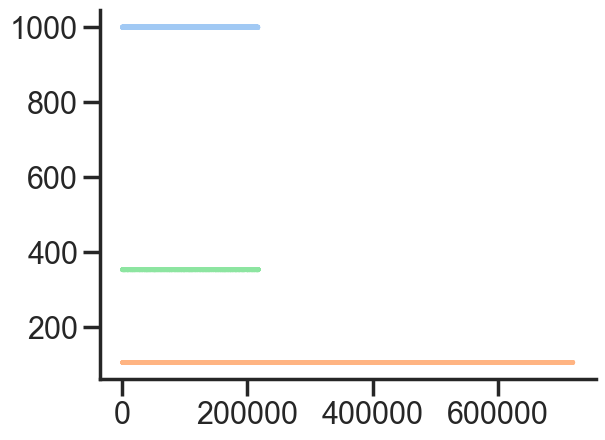

[3.0000000e+02 6.5300000e+02 1.0060000e+03 ... 7.6862194e+07 7.6862546e+07
 7.6862899e+07]
[  101676.   101782.   101888. ... 76393290. 76393396. 76393502.]
camera [288] [216384]
[216096]
217115 720220 217715
nt [3] [720217]
[7202.000933333334] [7201.89834239 7201.89834239 7201.89834239 7201.89834239 7201.89834239
 7201.89834239 7201.89834239 7201.89834239 7201.89834239 7201.89834239
 7201.89834239 7201.89834239 7201.89834239 7201.89834239 7201.89834239
 7201.89834239 7201.89834239 7201.89834239 7201.89834239 7201.89834239
 7201.89834239 7201.89834239 7201.89834239 7201.89834239 7201.89834239
 7201.89834239 7201.89834239 7201.89834239 7201.89834239 7201.89834239
 7201.89834239 7201.89834239 7201.89834239 7201.89834239 7201.89834239
 7201.89834239]
Deviation of [102.59094486] in miliseconds
Deviation at start [-1.0384] in miliseconds
Deviation at end [7.1744] in miliseconds
experiment C:\Users\fentonlab\Desktop\Gino\SPK\sync\2022-07-28_13-19-00_M016_SAL_PFC_HPC_0_0_0mpk.mat


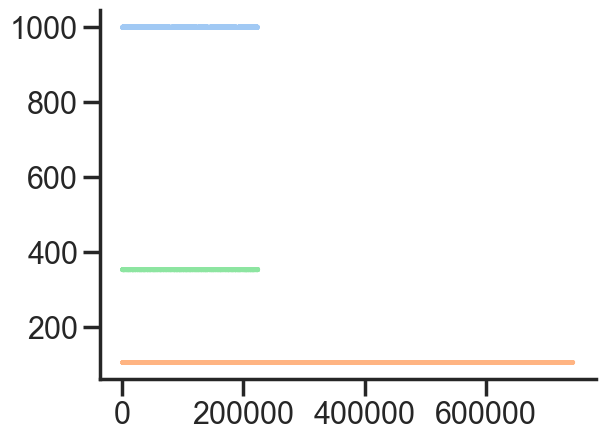

[2.7900000e+02 6.3100000e+02 9.8400000e+02 ... 7.9087070e+07 7.9087423e+07
 7.9087777e+07]
[  237589.   237695.   237801. ... 78991297. 78991403. 78991509.]
camera [673] [223415]
[222742]
223416 743463 224016
nt [3] [742370]
[7202.000933333334, 7423.529366666667] [7423.42030879 7423.42030879 7423.42030879 7423.42030879 7423.42030879
 7423.42030879 7423.42030879 7423.42030879 7423.42030879 7423.42030879
 7423.42030879 7423.42030879 7423.42030879 7423.42030879 7423.42030879
 7423.42030879 7423.42030879 7423.42030879 7423.42030879 7423.42030879
 7423.42030879 7423.42030879 7423.42030879 7423.42030879 7423.42030879
 7423.42030879 7423.42030879 7423.42030879 7423.42030879 7423.42030879
 7423.42030879 7423.42030879 7423.42030879 7423.42030879 7423.42030879
 7423.42030879]
Deviation of [109.05787854] in miliseconds
Deviation at start [-1.416] in miliseconds
Deviation at end [8.6848] in miliseconds
experiment C:\Users\fentonlab\Desktop\Gino\SPK\sync\2022-08-01_04-30-00_M015_RSK_mPFC_HPC_3_10_3

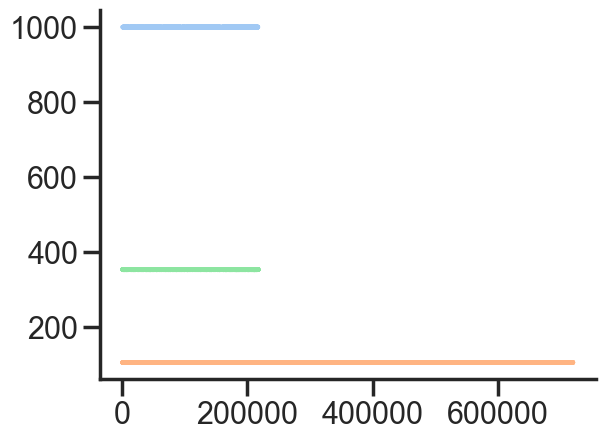

[  134206.   134560.   134913. ... 77070277. 77070630. 77070983.]
[  370933.   371039.   371145. ... 76664109. 76664215. 76664321.]
camera [671] [216743]
[216072]
217296 720235 217896
nt [2] [720232]
[7202.000933333334, 7423.529366666667, 7202.1657] [7202.05580159 7202.05580159 7202.05580159 7202.05580159 7202.05580159
 7202.05580159 7202.05580159 7202.05580159 7202.05580159 7202.05580159
 7202.05580159 7202.05580159 7202.05580159 7202.05580159 7202.05580159
 7202.05580159 7202.05580159 7202.05580159 7202.05580159 7202.05580159
 7202.05580159 7202.05580159 7202.05580159 7202.05580159 7202.05580159
 7202.05580159 7202.05580159 7202.05580159 7202.05580159 7202.05580159
 7202.05580159 7202.05580159 7202.05580159 7202.05580159 7202.05580159
 7202.05580159]
Deviation of [109.89841152] in miliseconds
Deviation at start [-0.6608] in miliseconds
Deviation at end [9.44] in miliseconds
experiment C:\Users\fentonlab\Desktop\Gino\SPK\sync\2022-08-03_12-45-00_M015_RSK_mPFC_HPC_3_10_30mpk.mat


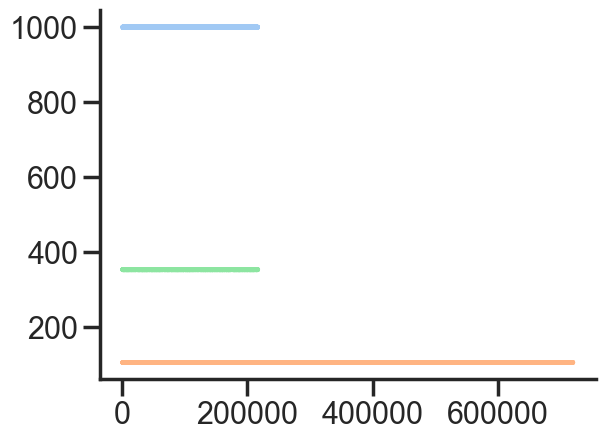

[4.8546000e+04 4.8899000e+04 4.9252000e+04 ... 7.6621546e+07 7.6621899e+07
 7.6622252e+07]
[  264092.   264198.   264304. ... 76542276. 76542382. 76542488.]
camera [611] [216675]
[216064]
216902 720095 216902
nt [2] [720093]
[7202.000933333334, 7423.529366666667, 7202.1657, 7200.771566666666] [7200.65056319 7200.65056319 7200.65056319 7200.65056319 7200.65056319
 7200.65056319 7200.65056319 7200.65056319 7200.65056319 7200.65056319
 7200.65056319 7200.65056319 7200.65056319 7200.65056319 7200.65056319
 7200.65056319 7200.65056319 7200.65056319 7200.65056319 7200.65056319
 7200.65056319 7200.65056319 7200.65056319 7200.65056319 7200.65056319
 7200.65056319 7200.65056319 7200.65056319 7200.65056319 7200.65056319
 7200.65056319 7200.65056319 7200.65056319 7200.65056319 7200.65056319
 7200.65056319]
Deviation of [121.00347819] in miliseconds
Deviation at start [-2.2656] in miliseconds
Deviation at end [6.5136] in miliseconds
experiment C:\Users\fentonlab\Desktop\Gino\SPK\sync\2022-08-04_03

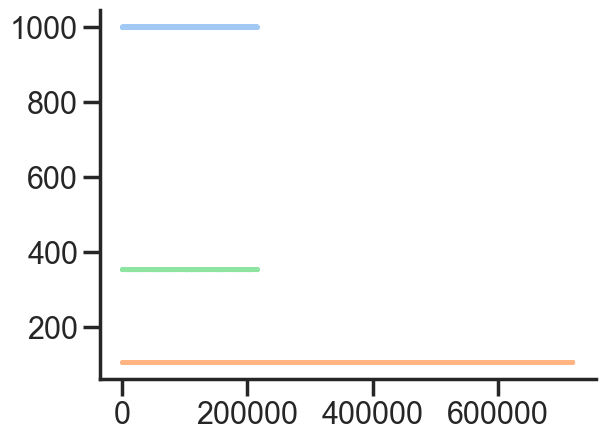

[  146910.   147263.   147615. ... 76618898. 76619251. 76619604.]
[  247968.   248074.   248180. ... 76560257. 76560363. 76560469.]
camera [287] [216414]
[216127]
216583 720417 216583
nt [3] [720414]
[7202.000933333334, 7423.529366666667, 7202.1657, 7200.771566666666, 7203.977266666667] [7203.85006239 7203.85006239 7203.85006239 7203.85006239 7203.85006239
 7203.85006239 7203.85006239 7203.85006239 7203.85006239 7203.85006239
 7203.85006239 7203.85006239 7203.85006239 7203.85006239 7203.85006239
 7203.85006239 7203.85006239 7203.85006239 7203.85006239 7203.85006239
 7203.85006239 7203.85006239 7203.85006239 7203.85006239 7203.85006239
 7203.85006239 7203.85006239 7203.85006239 7203.85006239 7203.85006239
 7203.85006239 7203.85006239 7203.85006239 7203.85006239 7203.85006239
 7203.85006239]
Deviation of [127.20427819] in miliseconds
Deviation at start [-4.72] in miliseconds
Deviation at end [2.4544] in miliseconds
experiment C:\Users\fentonlab\Desktop\Gino\SPK\sync\2022-08-06-05-20-00_M

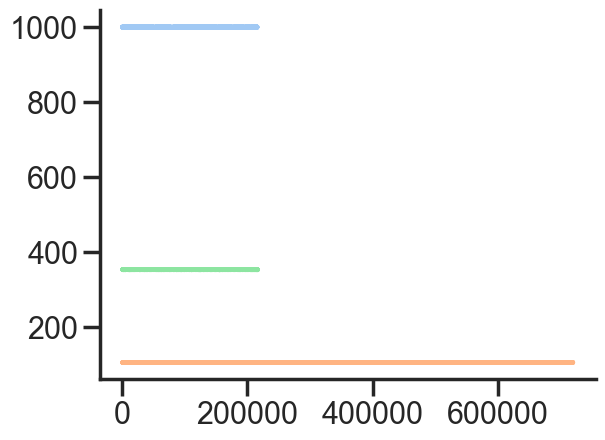

[   85608.    85961.    86314. ... 76499529. 76499882. 76500235.]
[  155888.   155994.   156100. ... 76451228. 76451334. 76451440.]
camera [200] [215985]
[215785]
215986 720257 216417
nt [4] [719280]
[7202.000933333334, 7423.529366666667, 7202.1657, 7200.771566666666, 7203.977266666667, 7192.625933333334] [7192.50044479 7192.50044479 7192.50044479 7192.50044479 7192.50044479
 7192.50044479 7192.50044479 7192.50044479 7192.50044479 7192.50044479
 7192.50044479 7192.50044479 7192.50044479 7192.50044479 7192.50044479
 7192.50044479 7192.50044479 7192.50044479 7192.50044479 7192.50044479
 7192.50044479 7192.50044479 7192.50044479 7192.50044479 7192.50044479
 7192.50044479 7192.50044479 7192.50044479 7192.50044479 7192.50044479
 7192.50044479 7192.50044479 7192.50044479 7192.50044479 7192.50044479
 7192.50044479]
Deviation of [125.48854484] in miliseconds
Deviation at start [-7.9296] in miliseconds
Deviation at end [1.5104] in miliseconds
experiment C:\Users\fentonlab\Desktop\Gino\SPK\sync\

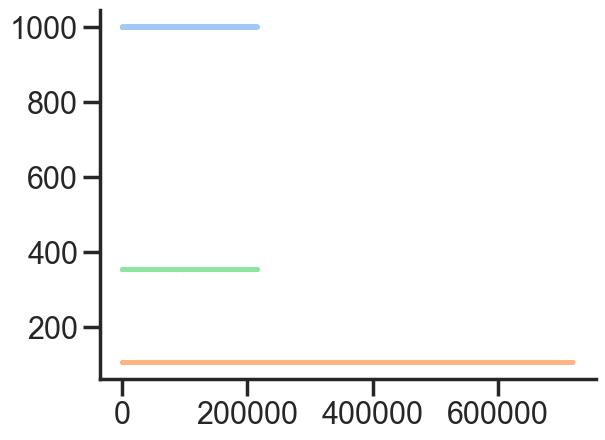

[   91209.    91562.    91915. ... 76512166. 76512519. 76512872.]
[  163006.   163112.   163218. ... 76467023. 76467129. 76467235.]
camera [204] [216306]
[216102]
216437 720339 216437
nt [3] [720335]
[7202.000933333334, 7423.529366666667, 7202.1657, 7200.771566666666, 7203.977266666667, 7192.625933333334, 7203.210766666667] [7203.05917919 7203.05917919 7203.05917919 7203.05917919 7203.05917919
 7203.05917919 7203.05917919 7203.05917919 7203.05917919 7203.05917919
 7203.05917919 7203.05917919 7203.05917919 7203.05917919 7203.05917919
 7203.05917919 7203.05917919 7203.05917919 7203.05917919 7203.05917919
 7203.05917919 7203.05917919 7203.05917919 7203.05917919 7203.05917919
 7203.05917919 7203.05917919 7203.05917919 7203.05917919 7203.05917919
 7203.05917919 7203.05917919 7203.05917919 7203.05917919 7203.05917919
 7203.05917919]
Deviation of [151.58747819] in miliseconds
Deviation at start [-9.6288] in miliseconds
Deviation at end [4.9088] in miliseconds
experiment C:\Users\fentonlab\Des

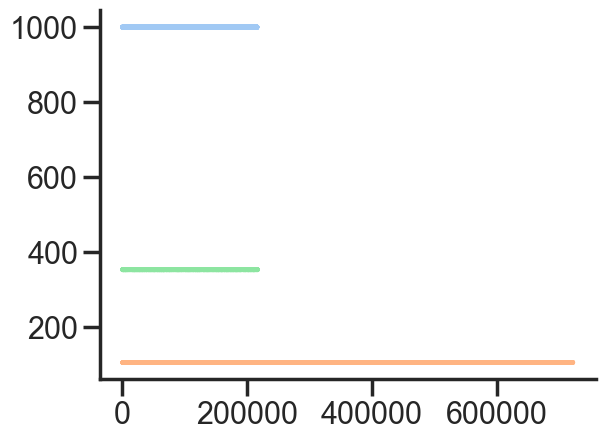

[  107373.   107726.   108079. ... 76682624. 76682977. 76683330.]
[  162701.   162806.   162912. ... 76632494. 76632600. 76632706.]
camera [157] [216453]
[216296]
216454 721904 216903
nt [2] [720884]
[7202.000933333334, 7423.529366666667, 7202.1657, 7200.771566666666, 7203.977266666667, 7192.625933333334, 7203.210766666667, 7208.707666666666] [7208.55892319 7208.55892319 7208.55892319 7208.55892319 7208.55892319
 7208.55892319 7208.55892319 7208.55892319 7208.55892319 7208.55892319
 7208.55892319 7208.55892319 7208.55892319 7208.55892319 7208.55892319
 7208.55892319 7208.55892319 7208.55892319 7208.55892319 7208.55892319
 7208.55892319 7208.55892319 7208.55892319 7208.55892319 7208.55892319
 7208.55892319 7208.55892319 7208.55892319 7208.55892319 7208.55892319
 7208.55892319 7208.55892319 7208.55892319 7208.55892319 7208.55892319
 7208.55892319]
Deviation of [148.7434782] in miliseconds
Deviation at start [-9.6288] in miliseconds
Deviation at end [4.0592] in miliseconds
experiment C:\U

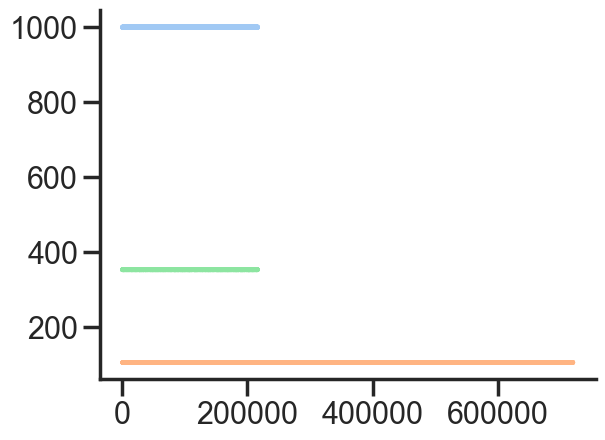

[5.4456000e+04 5.4809000e+04 5.5162000e+04 ... 7.6489010e+07 7.6489363e+07
 7.6489715e+07]
[  121828.   121934.   122040. ... 76437077. 76437183. 76437289.]
camera [191] [216355]
[216164]
216505 720445 216505
nt [1] [720442]
[7202.000933333334, 7423.529366666667, 7202.1657, 7200.771566666666, 7203.977266666667, 7192.625933333334, 7203.210766666667, 7208.707666666666, 7204.2908333333335] [7204.14949919 7204.14949919 7204.14949919 7204.14949919 7204.14949919
 7204.14949919 7204.14949919 7204.14949919 7204.14949919 7204.14949919
 7204.14949919 7204.14949919 7204.14949919 7204.14949919 7204.14949919
 7204.14949919 7204.14949919 7204.14949919 7204.14949919 7204.14949919
 7204.14949919 7204.14949919 7204.14949919 7204.14949919 7204.14949919
 7204.14949919 7204.14949919 7204.14949919 7204.14949919 7204.14949919
 7204.14949919 7204.14949919 7204.14949919 7204.14949919 7204.14949919
 7204.14949919]
Deviation of [141.33414486] in miliseconds
Deviation at start [-4.4368] in miliseconds
Deviation 

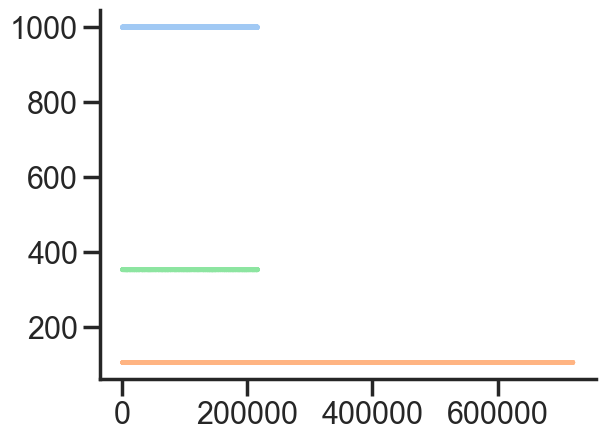

[5.7176000e+04 5.7528000e+04 5.7881000e+04 ... 7.6545630e+07 7.6545983e+07
 7.6546336e+07]
[   99455.    99561.    99667. ... 76451570. 76451676. 76451782.]
camera [120] [216297]
[216177]
216298 720793 216659
nt [1] [720481]
[7202.000933333334, 7423.529366666667, 7202.1657, 7200.771566666666, 7203.977266666667, 7192.625933333334, 7203.210766666667, 7208.707666666666, 7204.2908333333335, 7204.6833] [7204.53974879 7204.53974879 7204.53974879 7204.53974879 7204.53974879
 7204.53974879 7204.53974879 7204.53974879 7204.53974879 7204.53974879
 7204.53974879 7204.53974879 7204.53974879 7204.53974879 7204.53974879
 7204.53974879 7204.53974879 7204.53974879 7204.53974879 7204.53974879
 7204.53974879 7204.53974879 7204.53974879 7204.53974879 7204.53974879
 7204.53974879 7204.53974879 7204.53974879 7204.53974879 7204.53974879
 7204.53974879 7204.53974879 7204.53974879 7204.53974879 7204.53974879
 7204.53974879]
Deviation of [143.55121153] in miliseconds
Deviation at start [-2.6432] in miliseconds

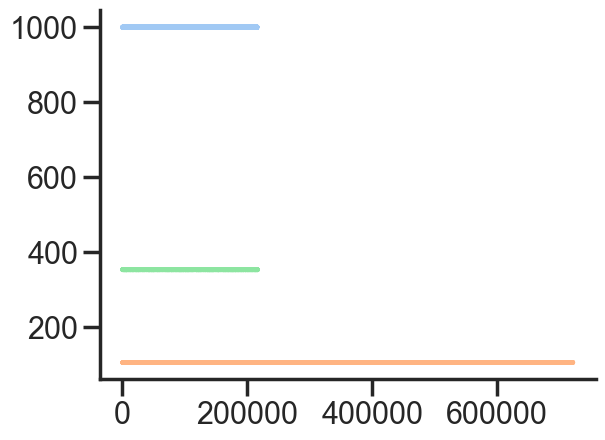

[   80071.    80424.    80777. ... 76604019. 76604372. 76604725.]
[  131974.   132079.   132185. ... 76545204. 76545310. 76545416.]
camera [147] [216310]
[216163]
216311 721370 216758
nt [1] [720439]
[7202.000933333334, 7423.529366666667, 7202.1657, 7200.771566666666, 7203.977266666667, 7192.625933333334, 7203.210766666667, 7208.707666666666, 7204.2908333333335, 7204.6833, 7204.269366666666] [7204.11929119 7204.11929119 7204.11929119 7204.11929119 7204.11929119
 7204.11929119 7204.11929119 7204.11929119 7204.11929119 7204.11929119
 7204.11929119 7204.11929119 7204.11929119 7204.11929119 7204.11929119
 7204.11929119 7204.11929119 7204.11929119 7204.11929119 7204.11929119
 7204.11929119 7204.11929119 7204.11929119 7204.11929119 7204.11929119
 7204.11929119 7204.11929119 7204.11929119 7204.11929119 7204.11929119
 7204.11929119 7204.11929119 7204.11929119 7204.11929119 7204.11929119
 7204.11929119]
Deviation of [150.07547819] in miliseconds
Deviation at start [-9.6288] in miliseconds
Devia

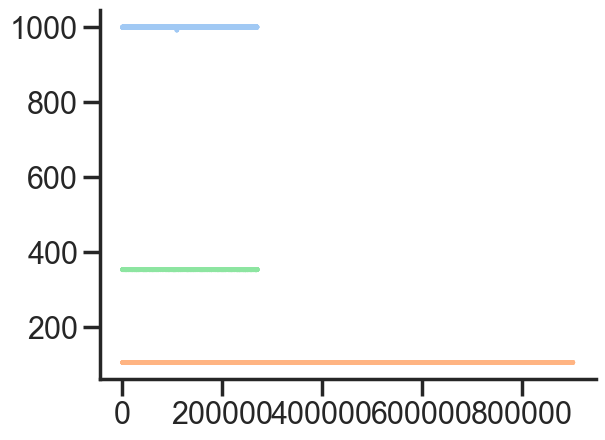

[8.5149000e+04 8.5502000e+04 8.5855000e+04 ... 9.5736157e+07 9.5736510e+07
 9.5736863e+07]
[  145744.   145850.   145956. ... 95777671. 95777777. 95777883.]
camera [172] [270553]
[270381]
270554 902801 270902
nt [2] [901252]
[7202.000933333334, 7423.529366666667, 7202.1657, 7200.771566666666, 7203.977266666667, 7192.625933333334, 7203.210766666667, 7208.707666666666, 7204.2908333333335, 7204.6833, 7204.269366666666, 9012.358733333333] [9012.17438559 9012.17438559 9012.17438559 9012.17438559 9012.17438559
 9012.17438559 9012.17438559 9012.17438559 9012.17438559 9012.17438559
 9012.17438559 9012.17438559 9012.17438559 9012.17438559 9012.17438559
 9012.17438559 9012.17438559 9012.17438559 9012.17438559 9012.17438559
 9012.17438559 9012.17438559 9012.17438559 9012.17438559 9012.17438559
 9012.17438559 9012.17438559 9012.17438559 9012.17438559 9012.17438559
 9012.17438559 9012.17438559 9012.17438559 9012.17438559 9012.17438559
 9012.17438559]
Deviation of [184.34774775] in miliseconds
Devia

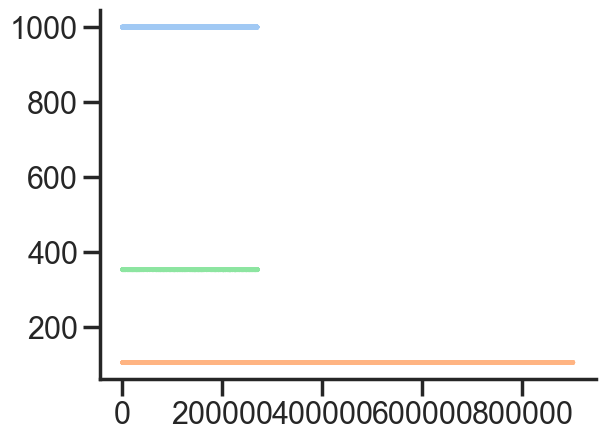

[4.5664000e+04 4.6017000e+04 4.6370000e+04 ... 9.5640397e+07 9.5640750e+07
 9.5641102e+07]
[  100057.   100162.   100268. ... 95591298. 95591404. 95591510.]
camera [155] [270264]
[270109]
270265 901473 270743
nt [4] [900346]
[7202.000933333334, 7423.529366666667, 7202.1657, 7200.771566666666, 7203.977266666667, 7192.625933333334, 7203.210766666667, 7208.707666666666, 7204.2908333333335, 7204.6833, 7204.269366666666, 9012.358733333333, 9003.281566666667] [9003.09357759 9003.09357759 9003.09357759 9003.09357759 9003.09357759
 9003.09357759 9003.09357759 9003.09357759 9003.09357759 9003.09357759
 9003.09357759 9003.09357759 9003.09357759 9003.09357759 9003.09357759
 9003.09357759 9003.09357759 9003.09357759 9003.09357759 9003.09357759
 9003.09357759 9003.09357759 9003.09357759 9003.09357759 9003.09357759
 9003.09357759 9003.09357759 9003.09357759 9003.09357759 9003.09357759
 9003.09357759 9003.09357759 9003.09357759 9003.09357759 9003.09357759
 9003.09357759]
Deviation of [187.98908107] i

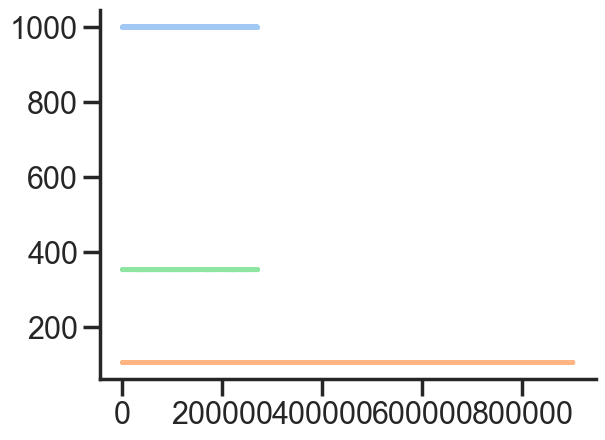

[5.7658000e+04 5.8011000e+04 5.8364000e+04 ... 9.5690911e+07 9.5691264e+07
 9.5691617e+07]
[  126263.   126369.   126475. ... 95604982. 95605088. 95605194.]
camera [195] [270607]
[270412]
270853 901355 270853
nt [3] [901353]
[7202.000933333334, 7423.529366666667, 7202.1657, 7200.771566666666, 7203.977266666667, 7192.625933333334, 7203.210766666667, 7208.707666666666, 7204.2908333333335, 7204.6833, 7204.269366666666, 9012.358733333333, 9003.281566666667, 9013.348366666667] [9013.17106079 9013.17106079 9013.17106079 9013.17106079 9013.17106079
 9013.17106079 9013.17106079 9013.17106079 9013.17106079 9013.17106079
 9013.17106079 9013.17106079 9013.17106079 9013.17106079 9013.17106079
 9013.17106079 9013.17106079 9013.17106079 9013.17106079 9013.17106079
 9013.17106079 9013.17106079 9013.17106079 9013.17106079 9013.17106079
 9013.17106079 9013.17106079 9013.17106079 9013.17106079 9013.17106079
 9013.17106079 9013.17106079 9013.17106079 9013.17106079 9013.17106079
 9013.17106079]
Deviation 

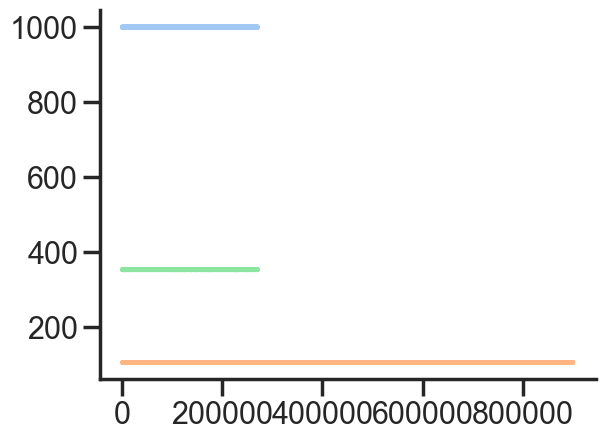

[7.3789000e+04 7.4142000e+04 7.4495000e+04 ... 9.5639546e+07 9.5639899e+07
 9.5640252e+07]
[  136214.   136320.   136426. ... 95567581. 95567687. 95567793.]
camera [177] [270457]
[270280]
270664 900908 270664
nt [1] [900904]
[7202.000933333334, 7423.529366666667, 7202.1657, 7200.771566666666, 7203.977266666667, 7192.625933333334, 7203.210766666667, 7208.707666666666, 7204.2908333333335, 7204.6833, 7204.269366666666, 9012.358733333333, 9003.281566666667, 9013.348366666667, 9008.886066666666] [9008.70103199 9008.70103199 9008.70103199 9008.70103199 9008.70103199
 9008.70103199 9008.70103199 9008.70103199 9008.70103199 9008.70103199
 9008.70103199 9008.70103199 9008.70103199 9008.70103199 9008.70103199
 9008.70103199 9008.70103199 9008.70103199 9008.70103199 9008.70103199
 9008.70103199 9008.70103199 9008.70103199 9008.70103199 9008.70103199
 9008.70103199 9008.70103199 9008.70103199 9008.70103199 9008.70103199
 9008.70103199 9008.70103199 9008.70103199 9008.70103199 9008.70103199
 9008.7

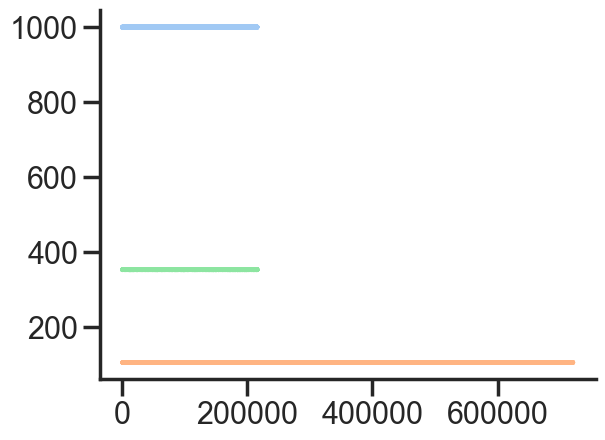

[  117557.   117910.   118263. ... 76526731. 76527084. 76527437.]
[  158043.   158149.   158255. ... 76492415. 76492521. 76492627.]
camera [115] [216205]
[216090]
216206 720626 216409
nt [2] [720276]
[7202.000933333334, 7423.529366666667, 7202.1657, 7200.771566666666, 7203.977266666667, 7192.625933333334, 7203.210766666667, 7208.707666666666, 7204.2908333333335, 7204.6833, 7204.269366666666, 9012.358733333333, 9003.281566666667, 9013.348366666667, 9008.886066666666, 7202.6313666666665] [7202.47484319 7202.47484319 7202.47484319 7202.47484319 7202.47484319
 7202.47484319 7202.47484319 7202.47484319 7202.47484319 7202.47484319
 7202.47484319 7202.47484319 7202.47484319 7202.47484319 7202.47484319
 7202.47484319 7202.47484319 7202.47484319 7202.47484319 7202.47484319
 7202.47484319 7202.47484319 7202.47484319 7202.47484319 7202.47484319
 7202.47484319 7202.47484319 7202.47484319 7202.47484319 7202.47484319
 7202.47484319 7202.47484319 7202.47484319 7202.47484319 7202.47484319
 7202.474843

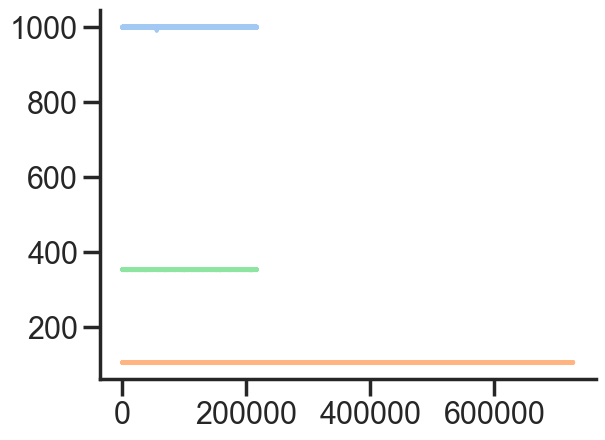

[6.2515000e+04 6.2868000e+04 6.3221000e+04 ... 7.6646117e+07 7.6646470e+07
 7.6646823e+07]
[  112970.   113076.   113182. ... 77105577. 77105683. 77105789.]
camera [143] [216901]
[216758]
216902 726840 216902
nt [1] [722506]
[7202.000933333334, 7423.529366666667, 7202.1657, 7200.771566666666, 7203.977266666667, 7192.625933333334, 7203.210766666667, 7208.707666666666, 7204.2908333333335, 7204.6833, 7204.269366666666, 9012.358733333333, 9003.281566666667, 9013.348366666667, 9008.886066666666, 7202.6313666666665, 7224.9296] [7224.78363999 7224.78363999 7224.78363999 7224.78363999 7224.78363999
 7224.78363999 7224.78363999 7224.78363999 7224.78363999 7224.78363999
 7224.78363999 7224.78363999 7224.78363999 7224.78363999 7224.78363999
 7224.78363999 7224.78363999 7224.78363999 7224.78363999 7224.78363999
 7224.78363999 7224.78363999 7224.78363999 7224.78363999 7224.78363999
 7224.78363999 7224.78363999 7224.78363999 7224.78363999 7224.78363999
 7224.78363999 7224.78363999 7224.78363999 7224

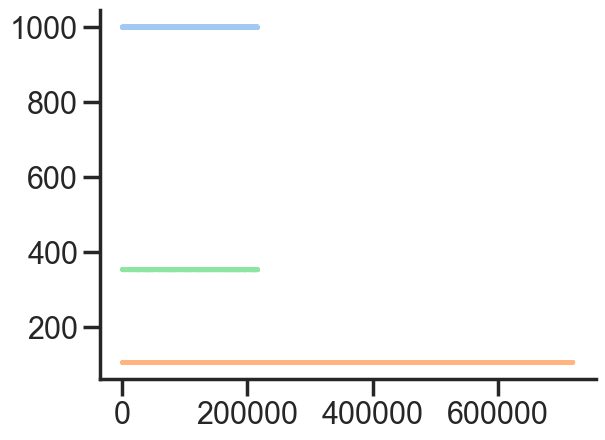

[5.3592000e+04 5.3945000e+04 5.4298000e+04 ... 7.6536107e+07 7.6536460e+07
 7.6536813e+07]
[  111262.   111368.   111474. ... 76401774. 76401880. 76401986.]
camera [164] [216250]
[216086]
216251 720212 216639
nt [3] [720190]
[7202.000933333334, 7423.529366666667, 7202.1657, 7200.771566666666, 7203.977266666667, 7192.625933333334, 7203.210766666667, 7208.707666666666, 7204.2908333333335, 7204.6833, 7204.269366666666, 9012.358733333333, 9003.281566666667, 9013.348366666667, 9008.886066666666, 7202.6313666666665, 7224.9296, 7201.7563666666665] [7201.60428639 7201.60428639 7201.60428639 7201.60428639 7201.60428639
 7201.60428639 7201.60428639 7201.60428639 7201.60428639 7201.60428639
 7201.60428639 7201.60428639 7201.60428639 7201.60428639 7201.60428639
 7201.60428639 7201.60428639 7201.60428639 7201.60428639 7201.60428639
 7201.60428639 7201.60428639 7201.60428639 7201.60428639 7201.60428639
 7201.60428639 7201.60428639 7201.60428639 7201.60428639 7201.60428639
 7201.60428639 7201.6042863

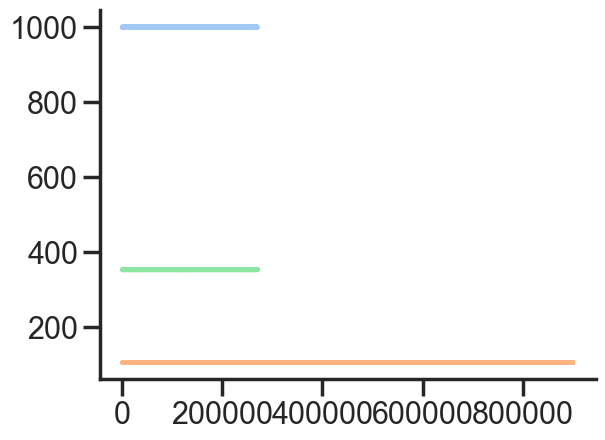

[3.2351000e+04 3.2705000e+04 3.3058000e+04 ... 9.5535001e+07 9.5535354e+07
 9.5535707e+07]
[8.8819000e+04 8.8925000e+04 8.9031000e+04 ... 9.5490906e+07 9.5491012e+07
 9.5491117e+07]
camera [160] [270040]
[269880]
270041 900631 270514
nt [1] [899474]
[7202.000933333334, 7423.529366666667, 7202.1657, 7200.771566666666, 7203.977266666667, 7192.625933333334, 7203.210766666667, 7208.707666666666, 7204.2908333333335, 7204.6833, 7204.269366666666, 9012.358733333333, 9003.281566666667, 9013.348366666667, 9008.886066666666, 7202.6313666666665, 7224.9296, 7201.7563666666665, 8994.584966666667] [8994.40736159 8994.40736159 8994.40736159 8994.40736159 8994.40736159
 8994.40736159 8994.40736159 8994.40736159 8994.40736159 8994.40736159
 8994.40736159 8994.40736159 8994.40736159 8994.40736159 8994.40736159
 8994.40736159 8994.40736159 8994.40736159 8994.40736159 8994.40736159
 8994.40736159 8994.40736159 8994.40736159 8994.40736159 8994.40736159
 8994.40736159 8994.40736159 8994.40736159 8994.407361

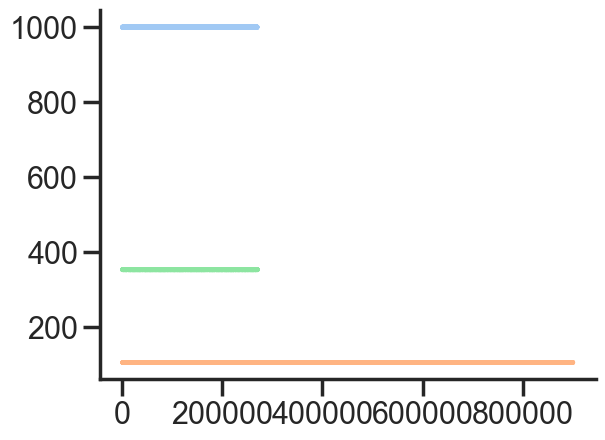

[4.2056000e+04 4.2409000e+04 4.2762000e+04 ... 9.5570325e+07 9.5570678e+07
 9.5571031e+07]
[9.2498000e+04 9.2604000e+04 9.2710000e+04 ... 9.5519040e+07 9.5519146e+07
 9.5519252e+07]
camera [143] [270150]
[270007]
270151 900862 270587
nt [1] [899896]
[7202.000933333334, 7423.529366666667, 7202.1657, 7200.771566666666, 7203.977266666667, 7192.625933333334, 7203.210766666667, 7208.707666666666, 7204.2908333333335, 7204.6833, 7204.269366666666, 9012.358733333333, 9003.281566666667, 9013.348366666667, 9008.886066666666, 7202.6313666666665, 7224.9296, 7201.7563666666665, 8994.584966666667, 8998.803033333334] [8998.62590879 8998.62590879 8998.62590879 8998.62590879 8998.62590879
 8998.62590879 8998.62590879 8998.62590879 8998.62590879 8998.62590879
 8998.62590879 8998.62590879 8998.62590879 8998.62590879 8998.62590879
 8998.62590879 8998.62590879 8998.62590879 8998.62590879 8998.62590879
 8998.62590879 8998.62590879 8998.62590879 8998.62590879 8998.62590879
 8998.62590879 8998.62590879 8998.6

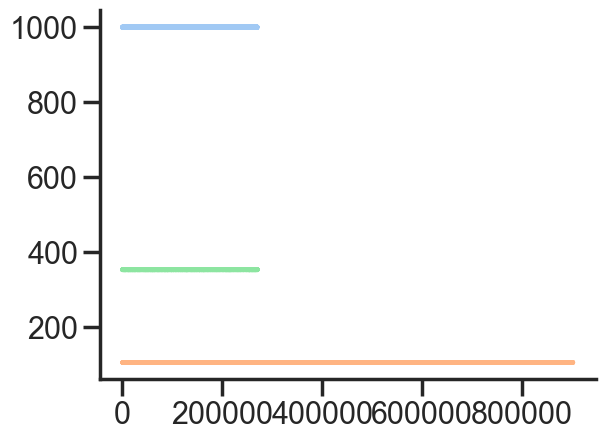

[4.0074000e+04 4.0427000e+04 4.0781000e+04 ... 9.5663789e+07 9.5664142e+07
 9.5664495e+07]
[   96729.    96835.    96941. ... 95635980. 95636086. 95636192.]
camera [161] [270581]
[270420]
270582 901926 270855
nt [2] [901282]
[7202.000933333334, 7423.529366666667, 7202.1657, 7200.771566666666, 7203.977266666667, 7192.625933333334, 7203.210766666667, 7208.707666666666, 7204.2908333333335, 7204.6833, 7204.269366666666, 9012.358733333333, 9003.281566666667, 9013.348366666667, 9008.886066666666, 7202.6313666666665, 7224.9296, 7201.7563666666665, 8994.584966666667, 8998.803033333334, 9012.648933333334] [9012.47552159 9012.47552159 9012.47552159 9012.47552159 9012.47552159
 9012.47552159 9012.47552159 9012.47552159 9012.47552159 9012.47552159
 9012.47552159 9012.47552159 9012.47552159 9012.47552159 9012.47552159
 9012.47552159 9012.47552159 9012.47552159 9012.47552159 9012.47552159
 9012.47552159 9012.47552159 9012.47552159 9012.47552159 9012.47552159
 9012.47552159 9012.47552159 9012.4755215

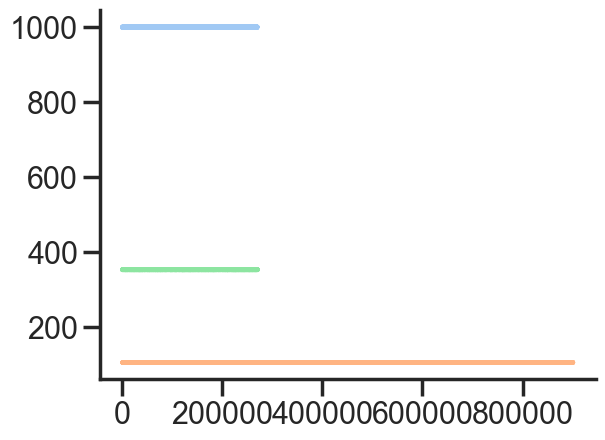

[3.8943000e+04 3.9295000e+04 3.9648000e+04 ... 9.5597267e+07 9.5597620e+07
 9.5597973e+07]
[8.2401000e+04 8.2507000e+04 8.2613000e+04 ... 9.5523037e+07 9.5523143e+07
 9.5523249e+07]
camera [124] [270225]
[270101]
270226 900995 270670
nt [3] [900219]
[7202.000933333334, 7423.529366666667, 7202.1657, 7200.771566666666, 7203.977266666667, 7192.625933333334, 7203.210766666667, 7208.707666666666, 7204.2908333333335, 7204.6833, 7204.269366666666, 9012.358733333333, 9003.281566666667, 9013.348366666667, 9008.886066666666, 7202.6313666666665, 7224.9296, 7201.7563666666665, 8994.584966666667, 8998.803033333334, 9012.648933333334, 9002.0079] [9001.83635839 9001.83635839 9001.83635839 9001.83635839 9001.83635839
 9001.83635839 9001.83635839 9001.83635839 9001.83635839 9001.83635839
 9001.83635839 9001.83635839 9001.83635839 9001.83635839 9001.83635839
 9001.83635839 9001.83635839 9001.83635839 9001.83635839 9001.83635839
 9001.83635839 9001.83635839 9001.83635839 9001.83635839 9001.83635839
 9001

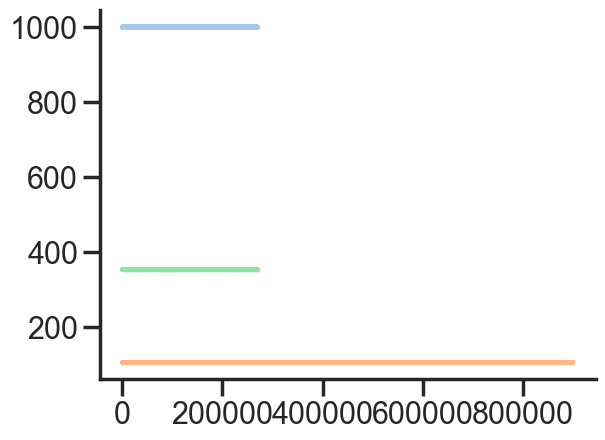

[3.8054000e+04 3.8407000e+04 3.8760000e+04 ... 9.5561144e+07 9.5561497e+07
 9.5561850e+07]
[8.2218000e+04 8.2324000e+04 8.2430000e+04 ... 9.5459079e+07 9.5459185e+07
 9.5459291e+07]
camera [126] [270280]
[270154]
270326 900393 270572
nt [3] [900390]
[7202.000933333334, 7423.529366666667, 7202.1657, 7200.771566666666, 7203.977266666667, 7192.625933333334, 7203.210766666667, 7208.707666666666, 7204.2908333333335, 7204.6833, 7204.269366666666, 9012.358733333333, 9003.281566666667, 9013.348366666667, 9008.886066666666, 7202.6313666666665, 7224.9296, 7201.7563666666665, 8994.584966666667, 8998.803033333334, 9012.648933333334, 9002.0079, 9003.714433333333] [9003.54565919 9003.54565919 9003.54565919 9003.54565919 9003.54565919
 9003.54565919 9003.54565919 9003.54565919 9003.54565919 9003.54565919
 9003.54565919 9003.54565919 9003.54565919 9003.54565919 9003.54565919
 9003.54565919 9003.54565919 9003.54565919 9003.54565919 9003.54565919
 9003.54565919 9003.54565919 9003.54565919 9003.54565919 

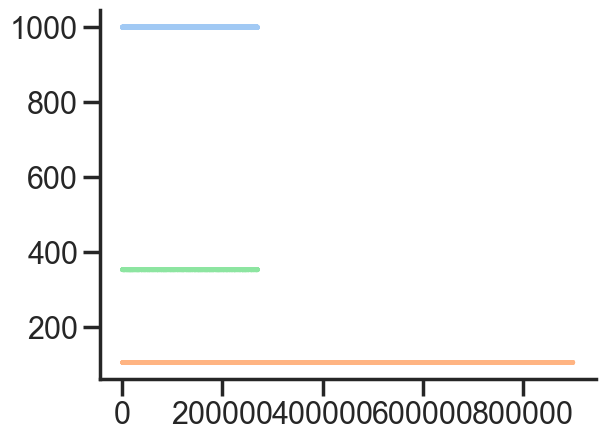

[9.0523000e+04 9.0876000e+04 9.1229000e+04 ... 9.5567054e+07 9.5567406e+07
 9.5567759e+07]
[  144563.   144669.   144775. ... 95518443. 95518549. 95518655.]
camera [154] [270296]
[270142]
270437 900365 270437
nt [4] [900360]
[7202.000933333334, 7423.529366666667, 7202.1657, 7200.771566666666, 7203.977266666667, 7192.625933333334, 7203.210766666667, 7208.707666666666, 7204.2908333333335, 7204.6833, 7204.269366666666, 9012.358733333333, 9003.281566666667, 9013.348366666667, 9008.886066666666, 7202.6313666666665, 7224.9296, 7201.7563666666665, 8994.584966666667, 8998.803033333334, 9012.648933333334, 9002.0079, 9003.714433333333, 9003.420133333333] [9003.23423359 9003.23423359 9003.23423359 9003.23423359 9003.23423359
 9003.23423359 9003.23423359 9003.23423359 9003.23423359 9003.23423359
 9003.23423359 9003.23423359 9003.23423359 9003.23423359 9003.23423359
 9003.23423359 9003.23423359 9003.23423359 9003.23423359 9003.23423359
 9003.23423359 9003.23423359 9003.23423359 9003.23423359 9003.2

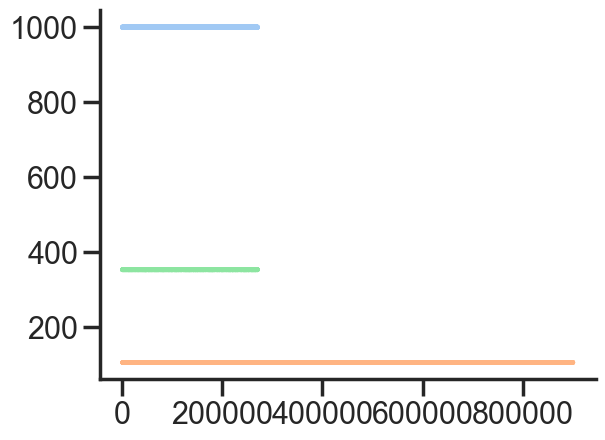

[9.0399000e+04 9.0751000e+04 9.1104000e+04 ... 9.5623084e+07 9.5623438e+07
 9.5623791e+07]
[  161538.   161644.   161750. ... 95569720. 95569826. 95569932.]
camera [202] [270444]
[270242]
270598 900689 270598
nt [2] [900686]
[7202.000933333334, 7423.529366666667, 7202.1657, 7200.771566666666, 7203.977266666667, 7192.625933333334, 7203.210766666667, 7208.707666666666, 7204.2908333333335, 7204.6833, 7204.269366666666, 9012.358733333333, 9003.281566666667, 9013.348366666667, 9008.886066666666, 7202.6313666666665, 7224.9296, 7201.7563666666665, 8994.584966666667, 8998.803033333334, 9012.648933333334, 9002.0079, 9003.714433333333, 9003.420133333333, 9006.693066666667] [9006.51236799 9006.51236799 9006.51236799 9006.51236799 9006.51236799
 9006.51236799 9006.51236799 9006.51236799 9006.51236799 9006.51236799
 9006.51236799 9006.51236799 9006.51236799 9006.51236799 9006.51236799
 9006.51236799 9006.51236799 9006.51236799 9006.51236799 9006.51236799
 9006.51236799 9006.51236799 9006.51236799 9

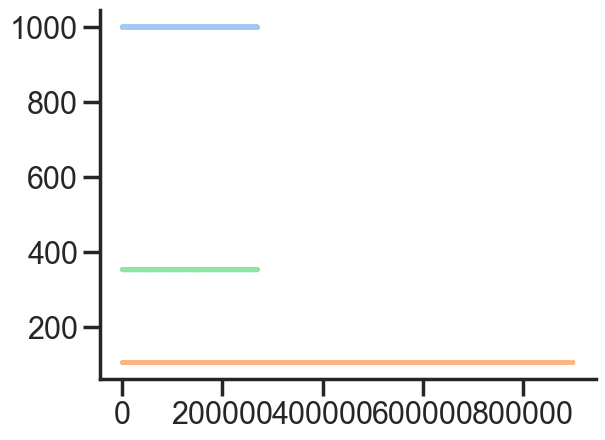

[4.4829000e+04 4.5181000e+04 4.5535000e+04 ... 9.5528711e+07 9.5529064e+07
 9.5529417e+07]
[9.4965000e+04 9.5071000e+04 9.5177000e+04 ... 9.5477206e+07 9.5477312e+07
 9.5477418e+07]
camera [142] [270309]
[270167]
270458 900444 270458
nt [1] [900440]
[7202.000933333334, 7423.529366666667, 7202.1657, 7200.771566666666, 7203.977266666667, 7192.625933333334, 7203.210766666667, 7208.707666666666, 7204.2908333333335, 7204.6833, 7204.269366666666, 9012.358733333333, 9003.281566666667, 9013.348366666667, 9008.886066666666, 7202.6313666666665, 7224.9296, 7201.7563666666665, 8994.584966666667, 8998.803033333334, 9012.648933333334, 9002.0079, 9003.714433333333, 9003.420133333333, 9006.693066666667, 9004.2471] [9004.06363199 9004.06363199 9004.06363199 9004.06363199 9004.06363199
 9004.06363199 9004.06363199 9004.06363199 9004.06363199 9004.06363199
 9004.06363199 9004.06363199 9004.06363199 9004.06363199 9004.06363199
 9004.06363199 9004.06363199 9004.06363199 9004.06363199 9004.06363199
 9004.06

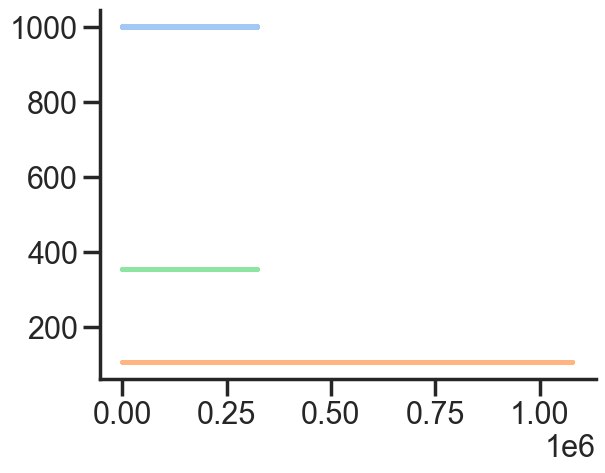

[4.08730000e+04 4.12260000e+04 4.15790000e+04 ... 1.14621216e+08
 1.14621569e+08 1.14621922e+08]
[8.44350000e+04 8.45410000e+04 8.46470000e+04 ... 1.14513145e+08
 1.14513251e+08 1.14513357e+08]
camera [124] [324240]
[324116]
324549 1080249 324549
nt [2] [1080246]
[7202.000933333334, 7423.529366666667, 7202.1657, 7200.771566666666, 7203.977266666667, 7192.625933333334, 7203.210766666667, 7208.707666666666, 7204.2908333333335, 7204.6833, 7204.269366666666, 9012.358733333333, 9003.281566666667, 9013.348366666667, 9008.886066666666, 7202.6313666666665, 7224.9296, 7201.7563666666665, 8994.584966666667, 8998.803033333334, 9012.648933333334, 9002.0079, 9003.714433333333, 9003.420133333333, 9006.693066666667, 9004.2471, 10802.2624] [10802.05021118 10802.05021118 10802.05021118 10802.05021118
 10802.05021118 10802.05021118 10802.05021118 10802.05021118
 10802.05021118 10802.05021118 10802.05021118 10802.05021118
 10802.05021118 10802.05021118 10802.05021118 10802.05021118
 10802.05021118 10802.

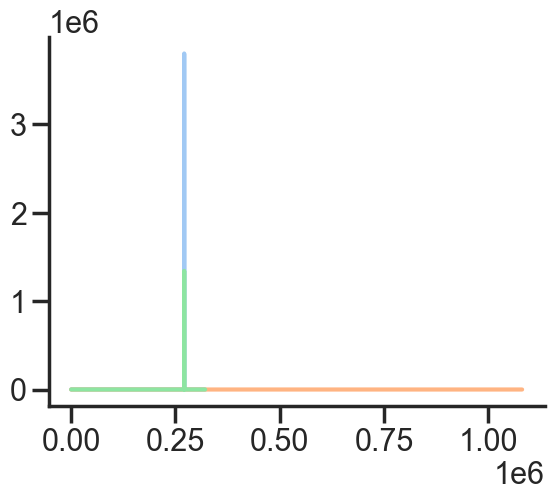

[4.08940000e+04 4.12470000e+04 4.16000000e+04 ... 1.14700529e+08
 1.14700882e+08 1.14701235e+08]
[7.57980000e+04 7.59040000e+04 7.60100000e+04 ... 1.14577087e+08
 1.14577193e+08 1.14577299e+08]
camera [99] [320618]
[320519]
320880 1080934 320971
nt [1] [1080929]
[7202.000933333334, 7423.529366666667, 7202.1657, 7200.771566666666, 7203.977266666667, 7192.625933333334, 7203.210766666667, 7208.707666666666, 7204.2908333333335, 7204.6833, 7204.269366666666, 9012.358733333333, 9003.281566666667, 9013.348366666667, 9008.886066666666, 7202.6313666666665, 7224.9296, 7201.7563666666665, 8994.584966666667, 8998.803033333334, 9012.648933333334, 9002.0079, 9003.714433333333, 9003.420133333333, 9006.693066666667, 9004.2471, 10802.2624, 10809.1058] [10808.89166238 10808.89166238 10808.89166238 10808.89166238
 10808.89166238 10808.89166238 10808.89166238 10808.89166238
 10808.89166238 10808.89166238 10808.89166238 10808.89166238
 10808.89166238 10808.89166238 10808.89166238 10808.89166238
 10808.8916

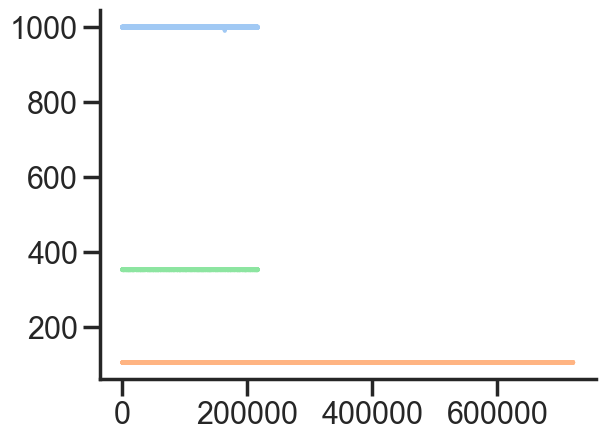

[4.2453000e+04 4.2806000e+04 4.3159000e+04 ... 7.6516847e+07 7.6517200e+07
 7.6517553e+07]
[   88607.    88713.    88819. ... 76459139. 76459245. 76459351.]
camera [131] [216450]
[216319]
216616 720967 216616
nt [1] [720965]
[7202.000933333334, 7423.529366666667, 7202.1657, 7200.771566666666, 7203.977266666667, 7192.625933333334, 7203.210766666667, 7208.707666666666, 7204.2908333333335, 7204.6833, 7204.269366666666, 9012.358733333333, 9003.281566666667, 9013.348366666667, 9008.886066666666, 7202.6313666666665, 7224.9296, 7201.7563666666665, 8994.584966666667, 8998.803033333334, 9012.648933333334, 9002.0079, 9003.714433333333, 9003.420133333333, 9006.693066666667, 9004.2471, 10802.2624, 10809.1058, 7209.523133333333] [7209.37822079 7209.37822079 7209.37822079 7209.37822079 7209.37822079
 7209.37822079 7209.37822079 7209.37822079 7209.37822079 7209.37822079
 7209.37822079 7209.37822079 7209.37822079 7209.37822079 7209.37822079
 7209.37822079 7209.37822079 7209.37822079 7209.37822079 7209

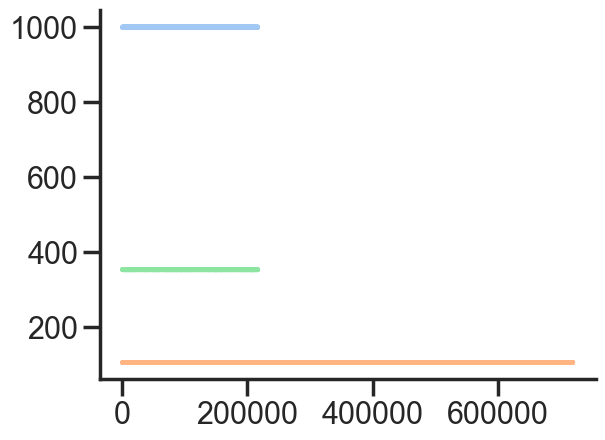

[7.2084000e+04 7.2437000e+04 7.2790000e+04 ... 7.6516877e+07 7.6517230e+07
 7.6517584e+07]
[  136729.   136835.   136941. ... 76434271. 76434376. 76434482.]
camera [184] [216297]
[216113]
216534 720278 216534
nt [4] [720274]
[7202.000933333334, 7423.529366666667, 7202.1657, 7200.771566666666, 7203.977266666667, 7192.625933333334, 7203.210766666667, 7208.707666666666, 7204.2908333333335, 7204.6833, 7204.269366666666, 9012.358733333333, 9003.281566666667, 9013.348366666667, 9008.886066666666, 7202.6313666666665, 7224.9296, 7201.7563666666665, 8994.584966666667, 8998.803033333334, 9012.648933333334, 9002.0079, 9003.714433333333, 9003.420133333333, 9006.693066666667, 9004.2471, 10802.2624, 10809.1058, 7209.523133333333, 7202.5974] [7202.43793279 7202.43793279 7202.43793279 7202.43793279 7202.43793279
 7202.43793279 7202.43793279 7202.43793279 7202.43793279 7202.43793279
 7202.43793279 7202.43793279 7202.43793279 7202.43793279 7202.43793279
 7202.43793279 7202.43793279 7202.43793279 7202.43

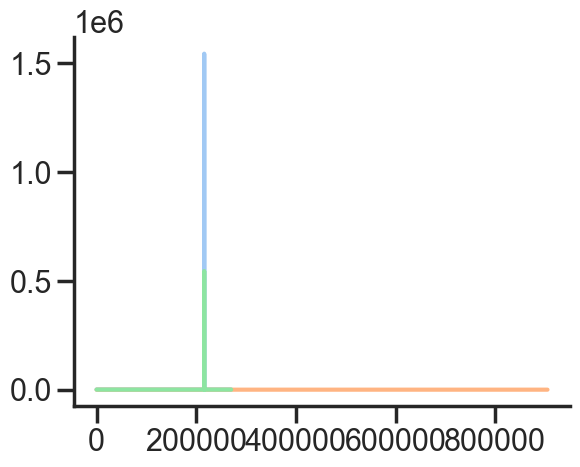

[4.3888000e+04 4.4242000e+04 4.4595000e+04 ... 9.5978040e+07 9.5978393e+07
 9.5978746e+07]
[9.2123000e+04 9.2229000e+04 9.2335000e+04 ... 9.5947431e+07 9.5947537e+07
 9.5947643e+07]
camera [137] [270108]
[269971]
270198 904910 270198
nt [2] [904905]
[7202.000933333334, 7423.529366666667, 7202.1657, 7200.771566666666, 7203.977266666667, 7192.625933333334, 7203.210766666667, 7208.707666666666, 7204.2908333333335, 7204.6833, 7204.269366666666, 9012.358733333333, 9003.281566666667, 9013.348366666667, 9008.886066666666, 7202.6313666666665, 7224.9296, 7201.7563666666665, 8994.584966666667, 8998.803033333334, 9012.648933333334, 9002.0079, 9003.714433333333, 9003.420133333333, 9006.693066666667, 9004.2471, 10802.2624, 10809.1058, 7209.523133333333, 7202.5974, 9048.897233333333] [9048.70104959 9048.70104959 9048.70104959 9048.70104959 9048.70104959
 9048.70104959 9048.70104959 9048.70104959 9048.70104959 9048.70104959
 9048.70104959 9048.70104959 9048.70104959 9048.70104959 9048.70104959
 9048.

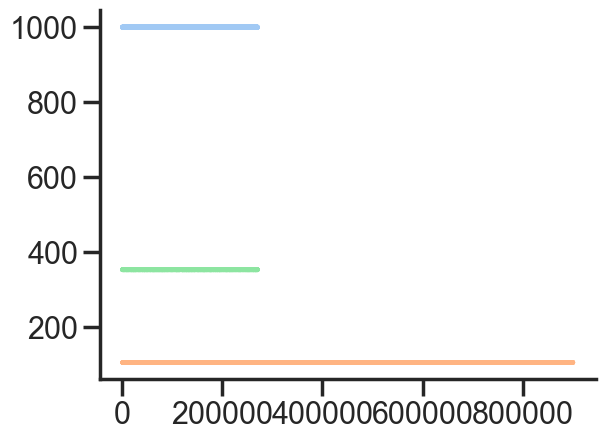

[6.5289000e+04 6.5642000e+04 6.5996000e+04 ... 9.5558764e+07 9.5559118e+07
 9.5559471e+07]
[  112179.   112285.   112391. ... 95509673. 95509779. 95509885.]
camera [133] [270349]
[270216]
270491 900588 270491
nt [1] [900585]
[7202.000933333334, 7423.529366666667, 7202.1657, 7200.771566666666, 7203.977266666667, 7192.625933333334, 7203.210766666667, 7208.707666666666, 7204.2908333333335, 7204.6833, 7204.269366666666, 9012.358733333333, 9003.281566666667, 9013.348366666667, 9008.886066666666, 7202.6313666666665, 7224.9296, 7201.7563666666665, 8994.584966666667, 8998.803033333334, 9012.648933333334, 9002.0079, 9003.714433333333, 9003.420133333333, 9006.693066666667, 9004.2471, 10802.2624, 10809.1058, 7209.523133333333, 7202.5974, 9048.897233333333, 9005.6943] [9005.51342719 9005.51342719 9005.51342719 9005.51342719 9005.51342719
 9005.51342719 9005.51342719 9005.51342719 9005.51342719 9005.51342719
 9005.51342719 9005.51342719 9005.51342719 9005.51342719 9005.51342719
 9005.51342719 9005.

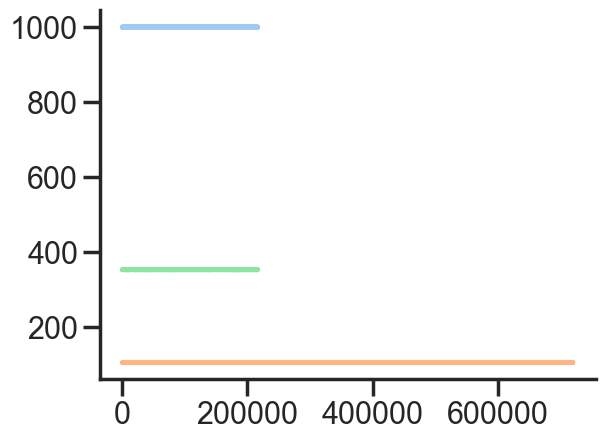

[5.6693000e+04 5.7046000e+04 5.7399000e+04 ... 7.6513149e+07 7.6513502e+07
 7.6513856e+07]
[  122848.   122954.   123060. ... 76415842. 76415948. 76416054.]
camera [188] [216292]
[216104]
216571 720235 216571
nt [2] [720230]
[7202.000933333334, 7423.529366666667, 7202.1657, 7200.771566666666, 7203.977266666667, 7192.625933333334, 7203.210766666667, 7208.707666666666, 7204.2908333333335, 7204.6833, 7204.269366666666, 9012.358733333333, 9003.281566666667, 9013.348366666667, 9008.886066666666, 7202.6313666666665, 7224.9296, 7201.7563666666665, 8994.584966666667, 8998.803033333334, 9012.648933333334, 9002.0079, 9003.714433333333, 9003.420133333333, 9006.693066666667, 9004.2471, 10802.2624, 10809.1058, 7209.523133333333, 7202.5974, 9048.897233333333, 9005.6943, 7202.166766666666] [7202.01860799 7202.01860799 7202.01860799 7202.01860799 7202.01860799
 7202.01860799 7202.01860799 7202.01860799 7202.01860799 7202.01860799
 7202.01860799 7202.01860799 7202.01860799 7202.01860799 7202.01860799
 

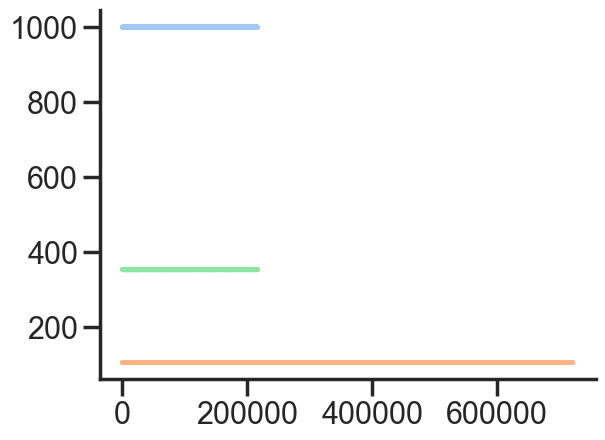

[6.8299000e+04 6.8652000e+04 6.9006000e+04 ... 7.6546304e+07 7.6546657e+07
 7.6547009e+07]
[  112235.   112341.   112446. ... 76516444. 76516550. 76516656.]
camera [125] [216545]
[216420]
216632 721285 216632
nt [2] [721283]
[7202.000933333334, 7423.529366666667, 7202.1657, 7200.771566666666, 7203.977266666667, 7192.625933333334, 7203.210766666667, 7208.707666666666, 7204.2908333333335, 7204.6833, 7204.269366666666, 9012.358733333333, 9003.281566666667, 9013.348366666667, 9008.886066666666, 7202.6313666666665, 7224.9296, 7201.7563666666665, 8994.584966666667, 8998.803033333334, 9012.648933333334, 9002.0079, 9003.714433333333, 9003.420133333333, 9006.693066666667, 9004.2471, 10802.2624, 10809.1058, 7209.523133333333, 7202.5974, 9048.897233333333, 9005.6943, 7202.166766666666, 7212.695266666667] [7212.54741759 7212.54741759 7212.54741759 7212.54741759 7212.54741759
 7212.54741759 7212.54741759 7212.54741759 7212.54741759 7212.54741759
 7212.54741759 7212.54741759 7212.54741759 7212.54741

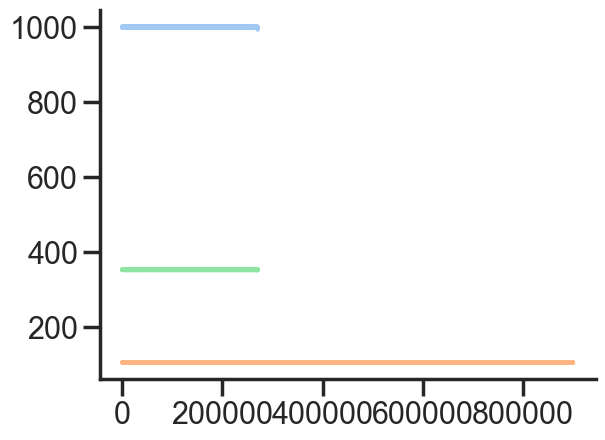

[7.3508000e+04 7.3861000e+04 7.4214000e+04 ... 9.5537947e+07 9.5538300e+07
 9.5538651e+07]
[  114094.   114200.   114306. ... 95481384. 95481490. 95481596.]
camera [115] [270249]
[270134]
270412 900303 270412
nt [1] [900300]
[7202.000933333334, 7423.529366666667, 7202.1657, 7200.771566666666, 7203.977266666667, 7192.625933333334, 7203.210766666667, 7208.707666666666, 7204.2908333333335, 7204.6833, 7204.269366666666, 9012.358733333333, 9003.281566666667, 9013.348366666667, 9008.886066666666, 7202.6313666666665, 7224.9296, 7201.7563666666665, 8994.584966666667, 8998.803033333334, 9012.648933333334, 9002.0079, 9003.714433333333, 9003.420133333333, 9006.693066666667, 9004.2471, 10802.2624, 10809.1058, 7209.523133333333, 7202.5974, 9048.897233333333, 9005.6943, 7202.166766666666, 7212.695266666667, 9002.850033333334] [9002.66216959 9002.66216959 9002.66216959 9002.66216959 9002.66216959
 9002.66216959 9002.66216959 9002.66216959 9002.66216959 9002.66216959
 9002.66216959 9002.66216959 9002.

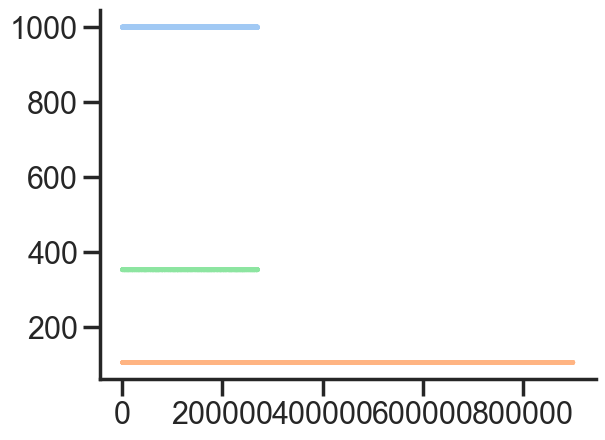

[6.6482000e+04 6.6835000e+04 6.7188000e+04 ... 9.5534455e+07 9.5534809e+07
 9.5535162e+07]
[  135862.   135968.   136074. ... 95491183. 95491289. 95491395.]
camera [197] [270293]
[270096]
270419 900190 270419
nt [2] [900185]
[7202.000933333334, 7423.529366666667, 7202.1657, 7200.771566666666, 7203.977266666667, 7192.625933333334, 7203.210766666667, 7208.707666666666, 7204.2908333333335, 7204.6833, 7204.269366666666, 9012.358733333333, 9003.281566666667, 9013.348366666667, 9008.886066666666, 7202.6313666666665, 7224.9296, 7201.7563666666665, 8994.584966666667, 8998.803033333334, 9012.648933333334, 9002.0079, 9003.714433333333, 9003.420133333333, 9006.693066666667, 9004.2471, 10802.2624, 10809.1058, 7209.523133333333, 7202.5974, 9048.897233333333, 9005.6943, 7202.166766666666, 7212.695266666667, 9002.850033333334, 9001.6876] [9001.50237119 9001.50237119 9001.50237119 9001.50237119 9001.50237119
 9001.50237119 9001.50237119 9001.50237119 9001.50237119 9001.50237119
 9001.50237119 9001.502

In [70]:
x_aln = []
y_aln = []
yaw_aln = []
speed_aln = []
duration = []
idx_camera = []
idx_camera_end = []
idx_nt = []
idx_nt_end = []

for ipath in range(0,len(x)):
    ipathsync = sync_path_matched[ipath]
    print('experiment',ipathsync)

    plt.plot(np.diff(ts_ephys_aln[ipath]))
    plt.plot(np.diff(nt_sync_aln[ipath]))
    plt.plot(np.diff(camera_sync_aln[ipath]))
    plt.show()

    print(camera_sync_aln[ipath])
    print(nt_sync_aln[ipath])
    
    _tmp_idx = []
    _tmp_idx = np.argwhere((camera_sync_aln[ipath] < nt_sync_aln[ipath][-1])==True)[-1]
    
    if ts_ephys_aln[ipath].size >= _tmp_idx:
        #Just to allign the camera with the sync, having the first frame of behavior and the last one
        idx_camera.append(np.argwhere((camera_sync_aln[ipath] > nt_sync_aln[ipath][0])==True)[0])
        idx_camera_end.append(np.argwhere((camera_sync_aln[ipath] < nt_sync_aln[ipath][-1])==True)[-1])
 
    if ts_ephys_aln[ipath].size < _tmp_idx:
        #Just to allign the camera with the sync, having the first frame of behavior and the last one
        idx_camera.append(np.argwhere((camera_sync_aln[ipath] > nt_sync_aln[ipath][0])==True)[0])
        idx_camera_end.append(np.array([ts_ephys_aln[ipath].size-1]).astype(int))
         
    
    print('camera',idx_camera[ipath],idx_camera_end[ipath])
    print(idx_camera_end[ipath]-idx_camera[ipath])


    print(ts_ephys_aln[ipath].size,nt_sync_aln[ipath].size,camera_sync_aln[ipath].size)


    duration.append(((ts_ephys_aln[ipath][idx_camera_end[ipath]] - ts_ephys_aln[ipath][idx_camera[ipath]]) /30000)[0])

    idx_nt.append(np.argwhere((nt_sync_aln[ipath] > camera_sync_aln[ipath][idx_camera[ipath]])==True)[0])
    idx_nt_end.append(np.argwhere((nt_sync_aln[ipath] < camera_sync_aln[ipath][idx_camera_end[ipath]])==True)[-1])
    print('nt',idx_nt[ipath],idx_nt_end[ipath])

    print(duration,(nt_sync_aln[ipath][idx_nt_end[ipath]] - nt_sync_aln[ipath][idx_nt[ipath]]) /ioFS)
    print('Deviation of',(duration[ipath] - (nt_sync_aln[ipath][idx_nt_end[ipath]] - nt_sync_aln[ipath][idx_nt[ipath]]) /ioFS[ipath]) * 1000, 'in miliseconds')
    print('Deviation at start',((camera_sync_aln[ipath][idx_camera[ipath]] - nt_sync_aln[ipath][idx_nt[ipath]])/ioFS[ipath]) * 1000,'in miliseconds')
    print('Deviation at end',((camera_sync_aln[ipath][idx_camera_end[ipath]] - nt_sync_aln[ipath][idx_nt_end[ipath]])/ioFS[ipath]) * 1000,'in miliseconds')

    
    
    ## align behavior

    x_aln.append(x[ipath][int(idx_nt[ipath][0]):int(idx_nt_end[ipath][0])])
    y_aln.append(y[ipath][int(idx_nt[ipath][0]):int(idx_nt_end[ipath][0])])
    yaw_aln.append(yaw[ipath][int(idx_nt[ipath][0]):int(idx_nt_end[ipath][0])])
    speed_aln.append(speed[ipath][int(idx_nt[ipath][0]):int(idx_nt_end[ipath][0])])

#### Save x, y, and speed 

In [72]:
speed_path = r'C:\Users\fentonlab\Desktop\Gino\speed\\'
np.save(os.path.join(speed_path, "x_aln.npy"), x_aln)
np.save(os.path.join(speed_path, "y_aln.npy"), y_aln)
np.save(os.path.join(speed_path, "speed_aln.npy"), speed_aln)

In [73]:
len(speed_aln[1])/100

7423.67

In [74]:
speed_aln[1].shape
Y_time = np.linspace(0, len(speed_aln[1])/ 100, len(speed_aln[1]))
Y_time.shape

(742367,)

### Electrophysiology - Load units - HPC probe

In [75]:
## get channels in HPC only

ch_HPC_list_flipped = []
ch_HPC_list_flipped = [np.arange(36,160), np.arange(60,160),np.arange(84,180),np.arange(88,160),np.arange(80,220),
               np.arange(160,384), np.arange(180,384),np.arange(172,260),np.arange(132,200),np.arange(172,252),
               np.arange(144,212), np.arange(152,228),np.arange(152,244),np.arange(180,384),np.arange(124,216),
               np.arange(180,280), np.arange(140,280), np.arange(280,384), np.arange(80,240), np.arange(120,260),
               np.arange(100,260), np.arange(100,280),np.arange(120,248),np.arange(160,320),np.arange(80,260),
               np.arange(100,260), np.arange(160,280),np.arange(160,280),np.arange(120,320),np.arange(100,260),
               np.arange(80,280), np.arange(80,220),np.arange(80,220),np.arange(80,240),np.arange(80,260),np.arange(80,240)]

# flip the index for correct orientation wrt matlab's plot
ch_HPC_list = [val[::-1] for val in ch_HPC_list_flipped]
# relabel indexes 
ch_HPC_list = [np.abs(val-384) for val in ch_HPC_list]

In [76]:
# start and end channels of HPC
ch_HPC = [(sess[0],sess[-1]) for sess in ch_HPC_list]

In [77]:
cluster_info_all_HPC = []
df_units_all_HPC = []

cids_to_keep_HPC_all = []

lfp_aln_idx = []

time_bin = 0.1 # in seconds

fs = 30000

spikes_binned_all_HPC = []

for ipath in range(0,len(x)):
    
    ksort_path = ksort_HPC_path_matched[ipath]
    print('experiment',ksort_path)

    cluster_info_path = ksort_path.joinpath('cluster_info.tsv')
    cluster_group_path = ksort_path.joinpath('cluster_group.tsv')

    try:
        cluster_info = pd.read_csv(cluster_info_path, sep='\t')
    except:
        cluster_info = pd.read_csv(cluster_group_path, sep='\t')

    # for screening look only at good units 
    try:
        #cluster_info = cluster_info[cluster_info.group != 'noise']
        cluster_info = cluster_info[cluster_info.KSLabel == 'good']

    #    cluster_info = cluster_info[cluster_info.group == 'good']
    #    cluster_info = cluster_info[cluster_info.n_spikes > 100]
    #    cluster_info = cluster_info[(cluster_info.group == 'good') * (cluster_info.depth > 1200)]

    except:
        print('phy was not done')
        cluster_info = cluster_info[cluster_info.KSLabel == 'good']
        #cluster_info = cluster_info[cluster_info.KSLabel != 'noise']


    spike_times = np.load(ksort_path.joinpath('spike_times.npy'))
    spike_clusters = np.load(ksort_path.joinpath('spike_clusters.npy'))
    templates = np.load(ksort_path.joinpath('templates.npy'))
    spike_templates = np.load(ksort_path.joinpath('spike_templates.npy'))

    # cid_channels = dict(zip(cluster_info.id.values, cluster_info.ch.values))
    # cid_depth = dict(zip(cluster_info.id.values, cluster_info.depth.values))

    df_spikes = pd.DataFrame({'times':spike_times.flatten()/30000.0, 
               'unit_id':spike_clusters.flatten(), 
               'templates':spike_templates.flatten() })
    df_spikes.unit_id.unique().size
    
    
    
        # remove noise units
    try:
        kslabel_d = dict(zip(cluster_info.id, cluster_info.group))
    except:
        kslabel_d = dict(zip(cluster_info.cluster_id, cluster_info.KSLabel))

    df_spikes['kslabel'] = df_spikes.unit_id.map(kslabel_d)
    # remove noise units
    df_spikes = df_spikes.dropna()
#     df_spikes_all.append(df_spikes)
    cluster_info_all_HPC.append(cluster_info)
    print('allcells',df_spikes.unit_id.unique().size)
    
    cids_to_keep = []
    cids_to_keep = cluster_info[cluster_info['ch'].isin(ch_HPC_list[ipath])].cluster_id.values    
#     print(cids_to_keep)
    cids_to_keep_HPC_all.append(cids_to_keep)
    
    start_offset = []
    start_offset = int(ts_ephys_aln[ipath][idx_camera[ipath]])
    print(start_offset,start_offset/fs)
    
    
    ## start with neurotar light recording
    df_spk = []
    df_spk = df_spikes.copy()
    df_spk['spk'] = df_spikes['times']

    
    df_spk= df_spk[(df_spk['spk'] >= (ts_ephys_aln[ipath][idx_camera[ipath]]/fs)[0]) & (df_spk['spk'] <= (ts_ephys_aln[ipath][idx_camera_end[ipath]]/fs)[0])]
    df_spk.head()
    
    df_spk['spk'] = df_spk['times'] - (ts_ephys_aln[ipath][idx_camera[ipath]]/fs)[0]
    df_spk['spk'] 
    
    df_units = []
    df_units = bin_smooth_spk(df_spk, time_bin)  #0.01 is the time resolution to bin 0.01 s = 10ms
    
    _inp_l = []
    _inp_l = df_units[df_units['cids'].isin(cids_to_keep)].pivot('cids', 'times', 'hz').values[:, :]
#     _inp_l = df_units.pivot('cids', 'times', 'hz').values[:, :]

    spikes_binned_all_HPC.append(_inp_l)
    df_units_all_HPC.append(df_units)
    print('shape binned', _inp_l.shape)
    
    spk_tmp = []
    
    lfp_aln_idx.append([int(ts_ephys_aln[ipath][idx_camera[ipath]][0]/12),
                        int(ts_ephys_aln[ipath][idx_camera_end[ipath]][0]/12)])
    

experiment C:\Users\fentonlab\Desktop\Gino\SPK\electrophysiology\2022-07-27_07-41-00_M015_SAL_PFC_HPC_0_0_0mpk_HPCprobe
allcells 565
288932 9.631066666666667
shape binned (100, 72019)
experiment C:\Users\fentonlab\Desktop\Gino\SPK\electrophysiology\2022-07-28_13-19-00_M016_SAL_PFC_HPC_0_0_0mpk_HPCprobe
allcells 397
673748 22.458266666666667
shape binned (130, 74239)
experiment C:\Users\fentonlab\Desktop\Gino\SPK\electrophysiology\2022-08-01_04-30-00_M015_RSK_mPFC_HPC_3_10_30mpk_HPCprobe
allcells 223
1051128 35.0376
shape binned (28, 72019)
experiment C:\Users\fentonlab\Desktop\Gino\SPK\electrophysiology\2022-08-03_12-45-00_M015_RSK_mPFC_HPC_3_10_30mpk_HPCprobe
allcells 200
748473 24.9491
shape binned (33, 72009)
experiment C:\Users\fentonlab\Desktop\Gino\SPK\electrophysiology\2022-08-04_03-45-00_M016_RSK_mPFC_HPC_3_10_30mpk_HPCprobe
allcells 192
703039 23.434633333333334
shape binned (86, 72039)
experiment C:\Users\fentonlab\Desktop\Gino\SPK\electrophysiology\2022-08-06-05-20-00_M016_R

#### Add name of file to list of start and finish LFP time


In [78]:
files

['2022-07-27_07-41-00_M015_SAL_PFC_HPC_0_0_0mpk_HPCprobe',
 '2022-07-27_07-41-00_M015_SAL_PFC_HPC_0_0_0mpk_PFCprobe',
 '2022-07-28_13-19-00_M016_SAL_PFC_HPC_0_0_0mpk_HPCprobe',
 '2022-07-28_13-19-00_M016_SAL_PFC_HPC_0_0_0mpk_PFCprobe',
 '2022-08-01_04-30-00_M015_RSK_mPFC_HPC_3_10_30mpk_HPCprobe',
 '2022-08-01_04-30-00_M015_RSK_mPFC_HPC_3_10_30mpk_PFCprobe',
 '2022-08-03_12-45-00_M015_RSK_mPFC_HPC_3_10_30mpk_HPCprobe',
 '2022-08-03_12-45-00_M015_RSK_mPFC_HPC_3_10_30mpk_PFCprobe',
 '2022-08-04_03-45-00_M016_RSK_mPFC_HPC_3_10_30mpk_HPCprobe',
 '2022-08-04_03-45-00_M016_RSK_mPFC_HPC_3_10_30mpk_PFCprobe',
 '2022-08-06-05-20-00_M016_RSK_mPFC_HPC_3_10_30mpk_HPCprobe',
 '2022-08-06-05-20-00_M016_RSK_mPFC_HPC_3_10_30mpk_PFCprobe',
 '2022-08-08-04-05-00_M017_SAL_mPFC_HPC_0_0_0mpk_HPCprobe',
 '2022-08-08-04-05-00_M017_SAL_mPFC_HPC_0_0_0mpk_PFCprobe',
 '2022-08-11-01-55-00_M018_SAL_mPFC_HPC_0_0_0mpk_HPCprobe',
 '2022-08-11-01-55-00_M018_SAL_mPFC_HPC_0_0_0mpk_PFCprobe',
 '2022-08-12-02-35-00_M017_R

In [79]:
lfp_aln_idx_name = copy.deepcopy(lfp_aln_idx)
for i in range(0,int(len(files)/2)):
    lfp_aln_idx_name[i].extend([ch_HPC[i][0], ch_HPC[i][-1],files[i*2]])   

#### save lfp alingment

In [80]:
df = pd.DataFrame(lfp_aln_idx_name, columns=["Lfp start", "Lfp end","HPC ch start","HPC ch end","Name_file"])
out_file = os.path.join(r'C:\Users\fentonlab\Desktop\Gino\LFPs\\', "lfp_aln_idx.csv")
df.to_csv(out_file, index=False)

In [82]:
pd.set_option('display.max_colwidth',100)
df.loc[1,"Name_file"]
df

Lfp start   Lfp end  HPC ch start  HPC ch end  \
0       24077  18029080           225         348   
1       56145  18614969           225         324   
2       87594  18093008           205         300   
3       62372  18064301           225         296   
4       58586  18068529           165         304   
5       36874  18018439             1         224   
6       38525  18046552             1         204   
7       38439  18060209           125         212   
8       28792  18039519           185         252   
9       23493  18035202           133         212   
10      31173  18041846           173         240   
11      34482  22565378           157         232   
12      23697  22531901           141         232   
13      29867  22563238             1         204   
14      32168  22554383           169         260   
15      37339  18043918           105         204   
16      26681  18089005           105         244   
17      26326  18030717             1         104   
18      20968  22507431           145         304   
19      21844  22518851           125         264   
20      22903  22554525           125         284   
21      19528  22524548           105         284   
22      19486  22528772           137         264   
23      34211  22542761            65         224   
24      38166  22554899           125         304   
25      22423  22533041           125         284   
26      19990  27025646           105         224   
27      17918  27040683           105         224   
28      20968  18044776            65         264   
29      32361  18038855           125         284   
30      21772  22644016           105         304   
31      26500  22540736           165         304   
32      29044  18034461           165         304   
33      26544  18058282           145         304   
34      26951  22534076           125         304   
35      32114  22536333           145         304   

                                                             Name_file  
0               2022-07-27_07-41-00_M015_SAL_PFC_HPC_0_0_0mpk_HPCprobe  
1               2022-07-28_13-19-00_M016_SAL_PFC_HPC_0_0_0mpk_HPCprobe  
2            2022-08-01_04-30-00_M015_RSK_mPFC_HPC_3_10_30mpk_HPCprobe  
3            2022-08-03_12-45-00_M015_RSK_mPFC_HPC_3_10_30mpk_HPCprobe  
4            2022-08-04_03-45-00_M016_RSK_mPFC_HPC_3_10_30mpk_HPCprobe  
5            2022-08-06-05-20-00_M016_RSK_mPFC_HPC_3_10_30mpk_HPCprobe  
6              2022-08-08-04-05-00_M017_SAL_mPFC_HPC_0_0_0mpk_HPCprobe  
7              2022-08-11-01-55-00_M018_SAL_mPFC_HPC_0_0_0mpk_HPCprobe  
8            2022-08-12-02-35-00_M017_RSK_mPFC_HPC_3_10_30mpk_HPCprobe  
9            2022-08-13-03-57-00_M018_RSK_mPFC_HPC_3_10_30mpk_HPCprobe  
10           2022-08-15-02-25-00_M018_RSK_mPFC_HPC_3_10_30mpk_HPCprobe  
11        2022-08-18-01-20-00_M020_1020_mPFC_HPC_1_3_10_30mpk_HPCprobe  
12        2022-08-19-04-25-00_M019_1020_mPFC_HPC_1_3_10_30mpk_HPCprobe  
13        2022-09-06-01-50-00-M021_1020_mPFC_HPC_1_3_10_30mpk_HPCprobe  
14        2022-09-07-02-54-00-M022_1020_mPFC_HPC_1_3_10_30mpk_HPCprobe  
15             2022-09-12-04-40-00_M023_SAL_mPFC_HPC_0_0_0mpk_HPCprobe  
16           2022-09-14-03-35-00_M023_RSK_mPFC_HPC_3_10_30mpk_HPCprobe  
17           2022-09-16-02-10-00_M023_RSK_mPFC_HPC_3_10_30mpk_HPCprobe  
18  2022-09-21-05-20-00-M024_R-ketamine_mPFC_HPC_1_3_10_30mpk_HPCprobe  
19  2022-09-22-02-50-00_M025_S-ketamine_mPFC_HPC_1_3_10_30mpk_HPCprobe  
20  2022-09-23-02-00-00_M026_R-ketamine_mPFC_HPC_1_3_10_30mpk_HPCprobe  
21  2022-09-24-04-55-00_M027_S-ketamine_mPFC_HPC_1_3_10_30mpk_HPCprobe  
22  2022-09-29-01-00-00_M024_R-ketamine_mPFC_HPC_1_3_10_30mpk_HPCprobe  
23  2022-10-03-03-25-00_M025_S-ketamine_mPFC_HPC_1_3_10_30mpk_HPCprobe  
24  2022-10-05-03-30-00_M027_S-ketamine_mPFC_HPC_1_3_10_30mpk_HPCprobe  
25  2022-10-06-03-55-00_M026_R-ketamine_mPFC_HPC_1_3_10_30mpk_HPCprobe  
26    2022-10-13-03-30-00_M028_CP101606_mPFC_HPC_1_3_10_30mpk_HPCprobe 

In [ ]:
cluster_info_all_PFC = []
df_units_all_PFC = []
depth_PFC_all = []
fs = 30000

spikes_binned_all_PFC = []

for ipath in range(0,len(x)):
    
    ksort_path = ksort_PFC_path_matched[ipath]
    print('experiment',ksort_path)

    cluster_info_path = ksort_path.joinpath('cluster_info.tsv')
    cluster_group_path = ksort_path.joinpath('cluster_group.tsv')

    try:
        cluster_info = pd.read_csv(cluster_info_path, sep='\t')
    except:
        cluster_info = pd.read_csv(cluster_group_path, sep='\t')

    # for screening look only at good units 
    try:
        #cluster_info = cluster_info[cluster_info.group != 'noise']
        cluster_info = cluster_info[cluster_info.KSLabel == 'good']

    #    cluster_info = cluster_info[cluster_info.group == 'good']
    #    cluster_info = cluster_info[cluster_info.n_spikes > 100]
    #    cluster_info = cluster_info[(cluster_info.group == 'good') * (cluster_info.depth > 1200)]

    except:
        print('phy was not done')
        cluster_info = cluster_info[cluster_info.KSLabel == 'good']
        #cluster_info = cluster_info[cluster_info.KSLabel != 'noise']


    spike_times = np.load(ksort_path.joinpath('spike_times.npy'))
    spike_clusters = np.load(ksort_path.joinpath('spike_clusters.npy'))
    templates = np.load(ksort_path.joinpath('templates.npy'))
    spike_templates = np.load(ksort_path.joinpath('spike_templates.npy'))

    # cid_channels = dict(zip(cluster_info.id.values, cluster_info.ch.values))
    # cid_depth = dict(zip(cluster_info.id.values, cluster_info.depth.values))

    df_spikes = pd.DataFrame({'times':spike_times.flatten()/30000.0, 
               'unit_id':spike_clusters.flatten(), 
               'templates':spike_templates.flatten() })
    df_spikes.unit_id.unique().size
    
    
    
        # remove noise units
    try:
        kslabel_d = dict(zip(cluster_info.id, cluster_info.group))
    except:
        kslabel_d = dict(zip(cluster_info.cluster_id, cluster_info.KSLabel))

    df_spikes['kslabel'] = df_spikes.unit_id.map(kslabel_d)
    # remove noise units
    df_spikes = df_spikes.dropna()
#     df_spikes_all.append(df_spikes)
    cluster_info_all_PFC.append(cluster_info)
    
    cid_depth, depth = [], []
    cid_depth = dict(zip(cluster_info.cluster_id.values, cluster_info.depth.values))
    depth = [cid_depth[p] for p in cid_depth]
    depth_PFC_all.append(depth)
    
    print(df_spikes.unit_id.unique().size)

    start_offset = []
    start_offset = int(ts_ephys_aln[ipath][idx_camera[ipath]])
    print(start_offset,start_offset/fs)
    
    
    ## start with neurotar light recording
    df_spk = []
    df_spk = df_spikes.copy()
    df_spk['spk'] = df_spikes['times']

    df_spk= df_spk[(df_spk['spk'] >= (ts_ephys_aln[ipath][idx_camera[ipath]]/fs)[0]) & (df_spk['spk'] <= (ts_ephys_aln[ipath][idx_camera_end[ipath]]/fs)[0])]
    df_spk.head()
    
    df_spk['spk'] = df_spk['times'] - (ts_ephys_aln[ipath][idx_camera[ipath]]/fs)[0]
    df_spk['spk'] 
    
    df_units = []
    df_units = bin_smooth_spk(df_spk, time_bin)  #0.01 is the time resolution to bin 0.01 s = 10ms
    
    _inp_l = []
    _inp_l = df_units.pivot('cids', 'times', 'hz').values[:, :]
       
    spikes_binned_all_PFC.append(_inp_l)
    df_units_all_PFC.append(df_units)
    print('shape binned', _inp_l.shape)
    
    spk_tmp = []
    

In [123]:
cluster_info_all_HPC[0][cluster_info_all_HPC[0].KSLabel == 'good']

cluster_id  Amplitude  ContamPct KSLabel        amp   ch   depth  \
0              0     3656.1      100.0    good  71.223831    2    40.0   
1              1     1915.6      100.0    good  72.064331    3    40.0   
2              2     2423.7      100.0    good  73.348633    3    40.0   
5              5     2725.9      100.0    good  74.094940    2    40.0   
7              7     2622.5      100.0    good  89.831329    1    20.0   
...          ...        ...        ...     ...        ...  ...     ...   
1054        1206     1369.6      100.0    good  80.386429  368  3700.0   
1058        1210     2173.2      100.0    good  70.201019  378  3800.0   
1060        1212     2149.2      100.0    good  72.932541  376  3780.0   
1065        1219     2317.9      100.0    good  56.349724  382  3840.0   
1067        1221     1857.3      100.0    good  59.444046  382  3840.0   

            fr  group  n_spikes  sh  
0     5.256622   good     38142   0  
1     2.300168   good     16690   0  
2     0.282939   good      2053   0  
5     0.053611  noise       389   0  
7     0.166483  noise      1208   0  
...        ...    ...       ...  ..  
1054  0.114388  noise       830   0  
1058  0.175166  noise      1271   0  
1060  0.125414  noise       910   0  
1065  0.050165  noise       364   0  
1067  0.032111  noise       233   0  

[565 rows x 11 columns]

In [ ]:
## binned spikes in the chosen timebin ms

In [ ]:
bin_size = time_bin*100 ## samples per bin == 10 ms to 200 ms (100 samples per second that's the behavior sampRate)

beh_binned_all = []

for ipath in range(0,len(x)):
    print(ipath)
    
    behavior_con = []
    behavior_con = np.array([x_aln[ipath],y_aln[ipath],yaw_aln[ipath],speed_aln[ipath]])

    bins = behavior_con.shape[1] / bin_size
    
    behavior_tmp = []
    behavior_tmp = getMeanBinnedVector_2d(behavior_con.T, bins, return_format="array")
    print(behavior_tmp.shape)
    
    beh_binned_all.append(behavior_tmp)
    behavior_tmp = []


In [ ]:
## export to mat aligned behavior and fine resolution spiking activity

In [ ]:
# outputList = [spikes_binned_all_HPC, spikes_binned_all_PFC, beh_binned_all,
#               cluster_info_all_HPC, df_units_all_HPC, cluster_info_all_PFC, df_units_all_PFC]

# # to save "processed" aligned data
# with open(r'G:\My Drive\Fenton_Lab\Ketamine_analysis\Ketamine_data\Neurotar_HPC_ketamine\Binned_data_200ms\ephys_behavior_aligned_HPC_PFC_all_1000ms_chfilt.file', 'wb') as f:
#     pickle.dump(outputList, f, pickle.HIGHEST_PROTOCOL)
# print('saved!')

In [ ]:
## import data

In [ ]:
# spikes_binned_all_HPC, spikes_binned_all_PFC, beh_binned_all, cluster_info_all_HPC, df_units_all_HPC, cluster_info_all_PFC, df_units_all_PFC = [],[],[],[],[], [],[]
# # load data
# with open(r'G:\My Drive\Fenton_Lab\Ketamine_analysis\Ketamine_data\Neurotar_HPC_ketamine\Binned_data_200ms\ephys_behavior_aligned_HPC_PFC_all_1000ms_chfilt.file', 'rb') as f3:
#     [spikes_binned_all_HPC, spikes_binned_all_PFC, beh_binned_all, cluster_info_all_HPC, df_units_all_HPC, cluster_info_all_PFC, df_units_all_PFC ] = pickle.load(f3)    
# print('loaded!')

# Analysis start here

experiment C:\Users\fentonlab\Desktop\Gino\SPK\electrophysiology\2022-07-27_07-41-00_M015_SAL_PFC_HPC_0_0_0mpk_HPCprobe


NameError: name 'beh_binned_all' is not defined

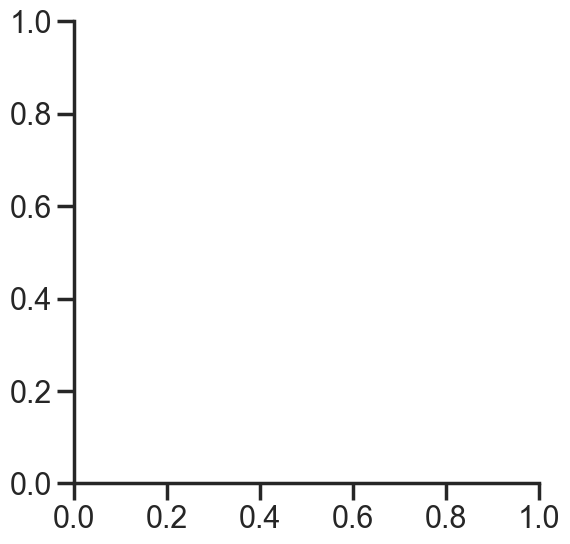

In [131]:
#Plotting behavior, xy tracking as a function of speed

for irec in range(0,1): #len(x_aln)):
    
    ksort_path = ksort_HPC_path_matched[irec]
    print('experiment',ksort_path)
    
    
    fig = plt.figure(figsize = (6,6))
    ax = fig.add_subplot(1,1,1)
    p2 = ax.scatter(beh_binned_all[irec][0],beh_binned_all[irec][1], s=5, c= beh_binned_all[irec][3], cmap = 'viridis')
    fig.colorbar(p2, label='Speed')
#     p2 = ax.plot(beh_binned_all[irec][0],beh_binned_all[irec][1])
    
    
    ax.set_xlim(-150,150)
    ax.set_xlim(-150,150)
    ax.set_xlabel('X position')
    ax.set_ylabel('Y position')
    
    plt.show()

In [ ]:
#Plotting xy tracking as a function of heading angle

for irec in range(0,1): #len(x_aln)):
    
    ksort_path = ksort_HPC_path_matched[irec]
    print('experiment',ksort_path)
    
    
    fig = plt.figure(figsize = (6,6))
    ax = fig.add_subplot(1,1,1)
    p2 = ax.scatter(beh_binned_all[irec][0],beh_binned_all[irec][1], s=5, c= beh_binned_all[irec][2], cmap = 'hsv')
    fig.colorbar(p2, label='Heading')
    ax.set_xlim(-150,150)
    ax.set_xlim(-150,150)
    ax.set_xlabel('X position')
    ax.set_ylabel('Y position')
    
    plt.show()

In [ ]:
bins = np.arange(0,10,0.1)
plt.hist(beh_binned_all[1][3], bins = bins)

In [ ]:
# mask for movement vs stationary
mask_mov_all = []
mask_sta_all = []
    
for irec in range(0,len(x_aln)):
    
    mask_mov = []
    mask_sta = []

#     size_to = []
#     size_to = np.min([spikes_binned_all_PFC[irec].shape[1],beh_binned_all[irec][0].size]) - 1
 
    mask_mov = np.zeros(beh_binned_all[irec][3].size).astype(bool)
    mask_mov[beh_binned_all[irec][3] > 10] = True
    mask_sta = np.invert(mask_mov)
    
    mask_mov_all.append(mask_mov)
    mask_sta_all.append(mask_sta)

In [ ]:
## plot firing rates @ 1000 ms = 60*30 or @ 200 ms, 30 min = 5*60*30 = 9000
sampRate = 10

# define the different injection times

baseline = 30*60*sampRate
dose1 = 60*60*sampRate
dose2 = 90*60*sampRate
dose3 = 120*60*sampRate

In [ ]:
drug_list = []
drug_list = ['SAL', 'SAL', 'RSK', 'RSK', 'RSK', 'RSK', 'SAL', 'SAL', 'RSK', 'RSK','RSK','1020',
             '1020','1020','1020','SAL','RSK', 'RSK', 'RK', 'SK', 'RK', 'SK','RK', 'SK', 'SK', 'RK',
             'CP101606', 'CP101606', 'PCP', 'PCP', 'CP101606', 'CP101606', 'PCP', 'PCP', 'CP101606', 'CP101606']

In [ ]:
len(drug_list)

In [ ]:
mouse_list = []
mouse_list = ['M15', 'M16', 'M15', 'M15', 'M16', 'M16', 'M17', 'M18', 'M17', 'M18', 'M18', 'M20', 'M19', 'M21', 'M22',
             'M23', 'M23', 'M23', 'M24', 'M25', 'M26', 'M27', 'M24', 'M25', 'M27', 'M26', 'M28', 'M29', 'M30', 'M31', 'M28',
             'M29', 'M30', 'M31', 'M32', 'M33']

In [ ]:
## plot firing rate example for HPC and mPFC cells
fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(2,1,1)
sns.heatmap(spikes_binned_all_HPC[0][:,10*60*10:12*60*10], ax=ax, vmax = 10)
ax.set_xticks([])
ax.set_ylabel('Cell ID')

ax2 = fig.add_subplot(2,1,2)
sns.heatmap(spikes_binned_all_PFC[0][:,10*60*10:12*60*10], ax=ax2, vmax = 10)
ax2.set_ylabel('Cell ID')
ax2.set_xlabel('Sample')

# plt.savefig(r'G:\My Drive\Fenton_Lab\Ketamine_analysis\Manuscript\firingrate_samples' + '.png', transparent = True)
# plt.show()
# plt.clf()
# plt.close()      

In [ ]:
#Plotting behavior, xy tracking as a function of speed
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(1,1,1)
# p2 = ax.scatter(beh_binned_all[0][0],beh_binned_all[0][1], s=5, c= beh_binned_all[0][3], cmap = 'viridis')
# fig.colorbar(p2, label='Speed')
p2 = ax.plot(beh_binned_all[0][0][:dose1],beh_binned_all[0][1][:dose1], color= 'black')

ax.set_xlim(-150,150)
ax.set_xlim(-150,150)
ax.set_xlabel('X position')
ax.set_ylabel('Y position')
ax.axis(False)
# plt.savefig(r'G:\My Drive\Fenton_Lab\Ketamine_analysis\Manuscript\behavior_samples' + '.pdf', transparent = True)
# plt.show()
# plt.clf()
# plt.close()     



In [ ]:
def place_cell_properties(spk_data, beh_data, binsxy, fsrate, shuf_state):
    from scipy.ndimage import gaussian_filter

    occ, rate_maps_sm, rate_maps_temp, p_info, coh = [], [], [], [], []
    nRepeat = 50  # number of shuffles

    # COMPUTING THE RATE MAPS
    occ = np.histogram2d(beh_data[0], beh_data[1], bins=binsxy)[0] / fsrate
    rate_maps_temp = [np.histogram2d(beh_data[0], beh_data[1], bins=binsxy, weights=s)[0]
                      / occ for s in spk_data]
    
    idx_nan = [np.isnan(p) for p in rate_maps_temp]

    rate_maps_sm = [gaussian_filter(np.nan_to_num(p), sigma=0) for p in rate_maps_temp]
    
#     for icell in range(0,len(rate_maps_temp)):
        
#         rate_maps_temp[icell][idx_nan[icell]] = np.nan
        
#     ## plot firing rate maps
#     for icell in range(0,len(rate_maps_temp)):
#         fig = plt.figure(figsize=(2, 2))
#         ax = fig.add_subplot(1, 1, 1)
#         sns.heatmap(rate_maps_temp[icell], cmap='jet', ax=ax, cbar_kws={'label': 'Normalized rate'})
#         ax.set_xlabel('X position')
#         ax.set_ylabel('Y position')
#         fname = 'Cell' + str(icell)
#         ax.set_title(fname)
#         plt.show()    

    # analyze rate maps
    p_info = [place_info_content(occ, m) for m in rate_maps_temp]
    coh = [neighbor_sum(m) for m in rate_maps_temp]

    ## pinfo and coherence
    #     print('Place info', np.hstack(p_info))
    #     print('Coherence', np.hstack(coh))

    if shuf_state == True:
        # Randomizing
        sTrackedCopy = spk_data.copy()
        sTrackedTimePairs = list(zip(*sTrackedCopy))

        pInfoShuffled = []
        cohShuffled = []
        for iRand in range(nRepeat):
            np.random.shuffle(sTrackedTimePairs)
            sShuffled = list(zip(*sTrackedTimePairs))

            RateMapsShuffled = [np.histogram2d(beh_data[0], beh_data[1], bins=binsxy, weights=s)[0]
                                / occ for s in sShuffled]
            pInfoShuffled.append([place_info_content(occ, m) for m in RateMapsShuffled])

            cohShuffled.append([neighbor_sum(m) for m in RateMapsShuffled])

        pInfoTest = []
        for p, z in zip(p_info, zip(*pInfoShuffled)):
            Out = [p, (p - np.mean(z)) / np.std(z)]
            pInfoTest.append([Out, Out[0] > 1 and Out[1] > 1.96])

        cohTest = []
        for p, z in zip(coh, zip(*cohShuffled)):
            Out = [p, (p - np.mean(z)) / np.std(z)]
            testTmp = Out[0] > 0.5 and Out[1] > 1.96
            cohTest.append([Out, testTmp])

        # determine whether cells are place cells
        PC_test = [c[0][1] > 1.96 and p[0][1] > 1.96 for c, p in zip(cohTest, pInfoTest)]
        fr_test = [(np.sum(s)/(s.size/10))<5 for s in spk_data]
        
    if shuf_state == False:
    
        PC_test = [c> 0.7 and p> 0.7 for c, p in zip(coh, p_info)]
        fr_test = [(np.sum(s)/(s.size/10))<5 for s in spk_data]

    PC_fr_test = [p*q for p,q in zip(PC_test, fr_test)]    
    print('number of PCs', np.sum(PC_fr_test), 'of', len(PC_test))

#     ## plot firing rate maps
#     for icell in np.hstack(np.argwhere(np.hstack(PC_fr_test) == True)):
#         print('place information', p_info[icell])
#         print('coherence', coh[icell])
#         print('firing rate', np.sum(spk_data[icell])/(spk_data[icell].size/10))

#         fig = plt.figure(figsize=(2, 2))
#         ax = fig.add_subplot(1, 1, 1)
# #         sns.heatmap(rate_maps_temp_temp[icell], cmap='jet', ax=ax, cbar_kws={'label': 'Normalized rate'})
#         sns.heatmap(rate_maps_sm[icell], cmap='jet', ax=ax, cbar_kws={'label': 'Normalized rate'})
#         ax.set_xlabel('X position')
#         ax.set_ylabel('Y position')
#         fname = 'Cell' + str(icell)
#         ax.set_title(fname)
#         plt.show()

    return occ, rate_maps_temp, p_info, coh, PC_fr_test


In [ ]:
## PC analysis in HPC cells

In [ ]:
bins_position = 20
ls_tmp = []
fr_maps_all = []
PC_test_b_all = []

for irec in range(0,len(x)):
    
#     if (drug_list[irec] == 'SAL') or (drug_list[irec] == 'PCP') or (drug_list[irec] == 'RSK'):
#     if (mouse_list[irec] == 'M15'):


    ksort_path = ksort_HPC_path_matched[irec]
    print('experiment',ksort_path)

    size_to = []
    size_to = np.min([spikes_binned_all_HPC[irec].shape[1],beh_binned_all[irec][0].size]) - 1



    # baseline
    occ_b, rate_maps_temp_b, p_info_b, coh_b, PC_test_b = [], [],[],[],[]   
    occ_b, rate_maps_temp_b, p_info_b, coh_b, PC_test_b = place_cell_properties(spikes_binned_all_HPC[irec][:,0:baseline][:,mask_mov_all[irec][0:baseline]],
                                                                      np.array([beh_binned_all[irec][0][0:baseline][mask_mov_all[irec][0:baseline]],
                                                                                beh_binned_all[irec][1][0:baseline][mask_mov_all[irec][0:baseline]]]),
                                                                                bins_position,10,True)
    
    PC_test_b_all.append(PC_test_b)

        
#         # dose 1
#         occ_d1, rate_maps_temp_d1, p_info_d1, coh_d1, PC_test_d1 = [], [],[],[],[]   
#         occ_d1, rate_maps_temp_d1, p_info_d1, coh_d1, PC_test_d1 = place_cell_properties(spikes_binned_all_HPC[irec][:,baseline:dose1],
#                                                                           np.array([beh_binned_all[irec][0][baseline:dose1],
#                                                                                     beh_binned_all[irec][1][baseline:dose1]]),
#                                                                                          bins_position,10, True)
        
        
#         # dose 2
#         occ_d2, rate_maps_temp_d2, p_info_d2, coh_d2, PC_test_d2 = [], [],[],[],[]   
#         occ_d2, rate_maps_temp_d2, p_info_d2, coh_d2, PC_test_d2 = place_cell_properties(spikes_binned_all_HPC[irec][:,dose1:dose2],
#                                                                           np.array([beh_binned_all[irec][0][dose1:dose2],
#                                                                                     beh_binned_all[irec][1][dose1:dose2]]),
#                                                                                          bins_position,10, True)
        
        
#         # dose 3
#         occ_d3, rate_maps_temp_d3, p_info_d3, coh_d3, PC_test_d3 = [], [],[],[],[]   
#         occ_d3, rate_maps_temp_d3, p_info_d3, coh_d3, PC_test_d3 = place_cell_properties(spikes_binned_all_HPC[irec][:,dose2:size_to],
#                                                                           np.array([beh_binned_all[irec][0][dose2:size_to],
#                                                                                     beh_binned_all[irec][1][dose2:size_to]]),
#                                                                                          bins_position,10, True)
        
        
#     ls_tmp.append(pd.DataFrame({'mouse': mouse_list[irec], 'drug': drug_list[irec], 'condition': 'baseline',
#                                    'cellid': np.arange(0,len(p_info_b)),'place_info': p_info_b, 'coherence': coh_b, 'PC_test': PC_test_b}))
        
#         ls_tmp.append(pd.DataFrame({'mouse': mouse_list[irec], 'drug': drug_list[irec], 'condition': 'dose1',
#                                    'cellid': np.arange(0,len(p_info_b)),'place_info': p_info_d1, 'coherence': coh_d1, 'PC_test': PC_test_d1}))
        
#         ls_tmp.append(pd.DataFrame({'mouse': mouse_list[irec], 'drug': drug_list[irec], 'condition': 'dose2',
#                                    'cellid': np.arange(0,len(p_info_b)),'place_info': p_info_d2, 'coherence': coh_d2, 'PC_test': PC_test_d2}))
        
#         ls_tmp.append(pd.DataFrame({'mouse': mouse_list[irec], 'drug': drug_list[irec], 'condition': 'dose3',
#                                    'cellid': np.arange(0,len(p_info_b)),'place_info': p_info_d3, 'coherence': coh_d3, 'PC_test': PC_test_d3}))      
        
        
        
#         fr_maps_all.append([rate_maps_temp_b, rate_maps_temp_d1, rate_maps_temp_d2, rate_maps_temp_d3])

In [ ]:
HPC_sal_cells = 235 + 120 + 33 + 13 + 81
HPC_sal_cells

In [ ]:
bins_position = 20
ls_tmp = []
fr_maps_all = []
PC_test_b_all_PFC = []

for irec in range(0,len(x)):
    
#     if (drug_list[irec] == 'SAL') or (drug_list[irec] == 'PCP') or (drug_list[irec] == 'RSK'):
#     if (mouse_list[irec] == 'M15'):


    ksort_path = ksort_HPC_path_matched[irec]
    print('experiment',ksort_path)

    size_to = []
    size_to = np.min([spikes_binned_all_PFC[irec].shape[1],beh_binned_all[irec][0].size]) - 1



    # baseline
    occ_b, rate_maps_temp_b, p_info_b, coh_b, PC_test_b = [], [],[],[],[]   
    occ_b, rate_maps_temp_b, p_info_b, coh_b, PC_test_b = place_cell_properties(spikes_binned_all_PFC[irec][:,0:baseline][:,mask_mov_all[irec][0:baseline]],
                                                                      np.array([beh_binned_all[irec][0][0:baseline][mask_mov_all[irec][0:baseline]],
                                                                                beh_binned_all[irec][1][0:baseline][mask_mov_all[irec][0:baseline]]]),
                                                                                bins_position,10,True)
    
    PC_test_b_all_PFC.append(PC_test_b)

        
#         # dose 1
#         occ_d1, rate_maps_temp_d1, p_info_d1, coh_d1, PC_test_d1 = [], [],[],[],[]   
#         occ_d1, rate_maps_temp_d1, p_info_d1, coh_d1, PC_test_d1 = place_cell_properties(spikes_binned_all_HPC[irec][:,baseline:dose1],
#                                                                           np.array([beh_binned_all[irec][0][baseline:dose1],
#                                                                                     beh_binned_all[irec][1][baseline:dose1]]),
#                                                                                          bins_position,10, True)
        
        
#         # dose 2
#         occ_d2, rate_maps_temp_d2, p_info_d2, coh_d2, PC_test_d2 = [], [],[],[],[]   
#         occ_d2, rate_maps_temp_d2, p_info_d2, coh_d2, PC_test_d2 = place_cell_properties(spikes_binned_all_HPC[irec][:,dose1:dose2],
#                                                                           np.array([beh_binned_all[irec][0][dose1:dose2],
#                                                                                     beh_binned_all[irec][1][dose1:dose2]]),
#                                                                                          bins_position,10, True)
        
        
#         # dose 3
#         occ_d3, rate_maps_temp_d3, p_info_d3, coh_d3, PC_test_d3 = [], [],[],[],[]   
#         occ_d3, rate_maps_temp_d3, p_info_d3, coh_d3, PC_test_d3 = place_cell_properties(spikes_binned_all_HPC[irec][:,dose2:size_to],
#                                                                           np.array([beh_binned_all[irec][0][dose2:size_to],
#                                                                                     beh_binned_all[irec][1][dose2:size_to]]),
#                                                                                          bins_position,10, True)
        
        
#     ls_tmp.append(pd.DataFrame({'mouse': mouse_list[irec], 'drug': drug_list[irec], 'condition': 'baseline',
#                                    'cellid': np.arange(0,len(p_info_b)),'place_info': p_info_b, 'coherence': coh_b, 'PC_test': PC_test_b}))
        
#         ls_tmp.append(pd.DataFrame({'mouse': mouse_list[irec], 'drug': drug_list[irec], 'condition': 'dose1',
#                                    'cellid': np.arange(0,len(p_info_b)),'place_info': p_info_d1, 'coherence': coh_d1, 'PC_test': PC_test_d1}))
        
#         ls_tmp.append(pd.DataFrame({'mouse': mouse_list[irec], 'drug': drug_list[irec], 'condition': 'dose2',
#                                    'cellid': np.arange(0,len(p_info_b)),'place_info': p_info_d2, 'coherence': coh_d2, 'PC_test': PC_test_d2}))
        
#         ls_tmp.append(pd.DataFrame({'mouse': mouse_list[irec], 'drug': drug_list[irec], 'condition': 'dose3',
#                                    'cellid': np.arange(0,len(p_info_b)),'place_info': p_info_d3, 'coherence': coh_d3, 'PC_test': PC_test_d3}))      
        
        
        
#         fr_maps_all.append([rate_maps_temp_b, rate_maps_temp_d1, rate_maps_temp_d2, rate_maps_temp_d3])

In [ ]:
PFC_sal_cells = 309 + 479 + 371 + 425 + 607
PFC_sal_cells

In [ ]:
def normalizer(a):
    out = []
    if (np.nanmax(a) - np.nanmin(a)) == 0:
        out = (a-np.nanmin(a))
    if (np.nanmax(a) - np.nanmin(a)) != 0:
        out = (a-np.nanmin(a))/(np.nanmax(a) - np.nanmin(a))
        
    return out

In [ ]:
def fr_map_ang(spk_data, beh_data, binsxy, fsrate):
    from scipy.ndimage import gaussian_filter
    
    occ, rate_maps_temp= [], []
    
    Xcenter = beh_data[0] - (np.nanmax(beh_data[0]) + np.nanmin(beh_data[1])) / 2
    Ycenter = beh_data[1] - (np.nanmax(beh_data[1]) + np.nanmin(beh_data[0])) / 2
    
    alpha = np.arctan2(Ycenter, Xcenter)

    L_occ = np.histogram(alpha, bins=binsxy)[0] /fsrate
    LinMapsTemp_temp = [np.histogram(alpha, bins=binsxy, weights=s)[0] / L_occ
         for s in spk_data]
    
    LinMapsTemp = [normalizer(gaussian_filter(np.nan_to_num(p), sigma=1)) for p in LinMapsTemp_temp]
    

    return LinMapsTemp

In [ ]:
bins_position = 30
fr_maps_all = []

idx_plot = 0

PCs_b_all_sal = []
PCs_d1_all_sal = []

for irec in range(0,len(x)):
    

    ksort_path = ksort_HPC_path_matched[irec]
    print('experiment',ksort_path)

    size_to = []
    size_to = np.min([spikes_binned_all_HPC[irec].shape[1],beh_binned_all[irec][0].size]) - 1



    # baseline
    rate_maps_temp_b= []
    rate_maps_temp_b= fr_map_ang(spikes_binned_all_HPC[irec][:,0:baseline][:,mask_mov_all[irec][0:baseline]],
                                                                      np.array([beh_binned_all[irec][0][0:baseline][mask_mov_all[irec][0:baseline]],
                                                                                beh_binned_all[irec][1][0:baseline][mask_mov_all[irec][0:baseline]]]),
                                                                                bins_position,10)

    # baseline
    rate_maps_temp_d1= []
    rate_maps_temp_d1= fr_map_ang(spikes_binned_all_HPC[irec][:,baseline:dose1][:,mask_mov_all[irec][baseline:dose1]],
                                                                      np.array([beh_binned_all[irec][0][baseline:dose1][mask_mov_all[irec][baseline:dose1]],
                                                                                beh_binned_all[irec][1][baseline:dose1][mask_mov_all[irec][baseline:dose1]]]),
                                  bins_position,10) 
#     # baseline
#     rate_maps_temp_d1= []
#     rate_maps_temp_d1= fr_map_ang(spikes_binned_all_HPC[irec][:,baseline:size_to][:,mask_mov_all[irec][baseline:size_to]],
#                                                                       np.array([beh_binned_all[irec][0][baseline:size_to][mask_mov_all[irec][baseline:size_to]],
#                                                                                 beh_binned_all[irec][1][baseline:size_to][mask_mov_all[irec][baseline:size_to]]]),
#                                                                                 bins_position,10)   
    if (drug_list[irec] == 'SAL'):
        
            
        fig = plt.figure(figsize=(10,10))
        ax = fig.add_subplot(1,2,1)

        idx_sort = np.nanargmax(np.vstack(rate_maps_temp_b)[PC_test_b_all[irec],:].T,axis=0)
        ax.imshow(((np.vstack(rate_maps_temp_b)[PC_test_b_all[irec],:]).T[:,np.argsort(idx_sort)]).T)
        ax.set_title('Baseline')
        ax.set_xlabel('Angle')
        ax.set_ylabel('Cell ID')

        ax2 = fig.add_subplot(1,2,2)
        ax2.imshow(((np.vstack(rate_maps_temp_d1)[PC_test_b_all[irec],:]).T[:,np.argsort(idx_sort)]).T)    
        ax2.axis(False)
#         plt.show()    

#         fig = plt.figure(figsize=(5,20))
#         ax = fig.add_subplot(1,2,1)

#         idx_sort = np.nanargmax(np.vstack(rate_maps_temp_d1)[PC_test_b_all[irec],:].T,axis=0)
#         ax.imshow(((np.vstack(rate_maps_temp_b)[PC_test_b_all[irec],:]).T[:,np.argsort(idx_sort)]).T)
#         ax.set_title('Baseline')
#         ax.set_xlabel('Angle')
#         ax.set_ylabel('Cell ID')

#         ax2 = fig.add_subplot(1,2,2)
#         ax2.imshow(((np.vstack(rate_maps_temp_d1)[PC_test_b_all[irec],:]).T[:,np.argsort(idx_sort)]).T)    
#         ax2.axis(False)
        
#         plt.tight_layout()
#         plt.savefig(r'G:\My Drive\Fenton_Lab\Ketamine_analysis\Manuscript\PC_linearized_HPC_SAL' + str(idx_plot)  + '.pdf', transparent = True)
#         plt.show()
#         plt.clf()
#         plt.close()  
        
        idx_plot = idx_plot +1
        
        PCs_b_all_sal.append((np.vstack(rate_maps_temp_b)[PC_test_b_all[irec],:]).T)
        PCs_d1_all_sal.append((np.vstack(rate_maps_temp_d1)[PC_test_b_all[irec],:]).T)


In [ ]:
np.hstack(PCs_d1_all_sal).shape

In [ ]:
## plotting all PCs during baseline and dose 1

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,2,1)

idx_sort = np.nanargmax(np.hstack(PCs_b_all_sal),axis=0)


ax.imshow(np.hstack(PCs_b_all_sal)[:,np.argsort(idx_sort)].T)
ax.set_title('Saline')
ax.set_xlabel('Angle')
ax.set_ylabel('Cell ID')

ax2 = fig.add_subplot(1,2,2)
ax2.imshow(np.hstack(PCs_d1_all_sal)[:,np.argsort(idx_sort)].T)    
ax2.set_title('Saline')
ax2.axis(False)
# plt.savefig(r'G:\My Drive\Fenton_Lab\Ketamine_analysis\Manuscript\PC_linearized_HPC_SAL_summary' + '.pdf', transparent = True)
# plt.show()
# plt.clf()
# plt.close()  

## map correlation

map_corr_HPC = []
map_corr_HPC = [pearsonr(p,q).statistic for p,q in zip(np.hstack(PCs_b_all_sal).T,np.hstack(PCs_d1_all_sal).T)]

map_corr_HPC_shuf = []
for ishuf in range(0,100):
    PC_b_shuf = np.hstack(PCs_b_all_sal).T.copy()
    np.random.shuffle(PC_b_shuf)

    map_corr_HPC_shuf_tmp = []
    map_corr_HPC_shuf_tmp = [pearsonr(p,q).statistic for p,q in zip(np.hstack(PCs_b_all_sal).T,PC_b_shuf)]
    map_corr_HPC_shuf.append(np.hstack(map_corr_HPC_shuf_tmp))

print('mean map corr',np.nanmean(np.hstack(map_corr_HPC)))
print('mean map corr_shuf',np.nanmean(np.concatenate(map_corr_HPC_shuf,axis=None)))


## histogram

bins = np.arange(-1,1,0.1)
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)
sns.histplot(np.hstack(map_corr_HPC), bins=bins, color ='orange', alpha= 0.3, stat = 'probability')
sns.histplot(np.hstack(map_corr_HPC_shuf), bins=bins, color = 'black',alpha = 0.2, stat = 'probability')

plt.xlabel('Map correlation (r)')
plt.show()

In [ ]:
bins_position = 30
fr_maps_all = []

idx_plot = 0


PCs_b_all_sal_PFC = []
PCs_d1_all_sal_PFC = []

for irec in range(0,len(x)):
    

    ksort_path = ksort_HPC_path_matched[irec]
    print('experiment',ksort_path)

    size_to = []
    size_to = np.min([spikes_binned_all_HPC[irec].shape[1],beh_binned_all[irec][0].size]) - 1



    # baseline
    rate_maps_temp_b= []
    rate_maps_temp_b= fr_map_ang(spikes_binned_all_PFC[irec][:,0:baseline][:,mask_mov_all[irec][0:baseline]],
                                                                      np.array([beh_binned_all[irec][0][0:baseline][mask_mov_all[irec][0:baseline]],
                                                                                beh_binned_all[irec][1][0:baseline][mask_mov_all[irec][0:baseline]]]),
                                                                                bins_position,10)

    # baseline
    rate_maps_temp_d1= []
    rate_maps_temp_d1= fr_map_ang(spikes_binned_all_PFC[irec][:,baseline:dose1][:,mask_mov_all[irec][baseline:dose1]],
                                                                      np.array([beh_binned_all[irec][0][baseline:dose1][mask_mov_all[irec][baseline:dose1]],
                                                                                beh_binned_all[irec][1][baseline:dose1][mask_mov_all[irec][baseline:dose1]]]),
                                                                                bins_position,10)    
    
    if (drug_list[irec] == 'SAL'):
    
        fig = plt.figure(figsize=(2,2))
        ax = fig.add_subplot(1,2,1)

        idx_sort = np.nanargmax(np.vstack(rate_maps_temp_b)[PC_test_b_all_PFC[irec],:].T,axis=0)
        ax.imshow(((np.vstack(rate_maps_temp_b)[PC_test_b_all_PFC[irec],:]).T[:,np.argsort(idx_sort)]).T)
        ax.set_title('Baseline')
        ax.set_xlabel('Angle')
        ax.set_ylabel('Cell ID')

        ax2 = fig.add_subplot(1,2,2)
        ax2.imshow(((np.vstack(rate_maps_temp_d1)[PC_test_b_all_PFC[irec],:]).T[:,np.argsort(idx_sort)]).T)    
        ax2.axis(False)
        
#         plt.savefig(r'G:\My Drive\Fenton_Lab\Ketamine_analysis\Manuscript\PC_linearized_PFC_SAL' + str(idx_plot)  + '.pdf', transparent = True)
#         plt.show()
#         plt.clf()
#         plt.close()  
        
        PCs_b_all_sal_PFC.append((np.vstack(rate_maps_temp_b)[PC_test_b_all_PFC[irec],:]).T)
        PCs_d1_all_sal_PFC.append((np.vstack(rate_maps_temp_d1)[PC_test_b_all_PFC[irec],:]).T)

        idx_plot = idx_plot +1

In [ ]:
print(np.hstack(PCs_b_all_sal).shape, np.hstack(PCs_b_all_sal_PFC).shape)

In [ ]:
## plotting all PCs during baseline and dose 1

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,2,1)

idx_sort = np.nanargmax(np.hstack(PCs_b_all_sal_PFC),axis=0)

ax.imshow(np.hstack(PCs_b_all_sal_PFC)[:,np.argsort(idx_sort)].T)
ax.set_title('Saline')
ax.set_xlabel('Angle')
ax.set_ylabel('Cell ID')

ax2 = fig.add_subplot(1,2,2)
ax2.imshow(np.hstack(PCs_d1_all_sal_PFC)[:,np.argsort(idx_sort)].T)    
ax2.set_title('Saline')
ax2.axis(False)
# plt.savefig(r'G:\My Drive\Fenton_Lab\Ketamine_analysis\Manuscript\PC_linearized_PFC_SAL_summary' + '.pdf', transparent = True)
# plt.show()
# plt.clf()
# plt.close()  

## map correlation

map_corr_PFC = []
map_corr_PFC = [pearsonr(p,q).statistic for p,q in zip(np.hstack(PCs_b_all_sal_PFC).T,np.hstack(PCs_d1_all_sal_PFC).T)]

map_corr_PFC_shuf = []
for ishuf in range(0,100):
    PC_b_shuf = np.hstack(PCs_b_all_sal_PFC).T.copy()
    np.random.shuffle(PC_b_shuf)

    map_corr_PFC_shuf_tmp = []
    map_corr_PFC_shuf_tmp = [pearsonr(p,q).statistic for p,q in zip(np.hstack(PCs_b_all_sal_PFC).T,PC_b_shuf)]
    map_corr_PFC_shuf.append(np.hstack(map_corr_PFC_shuf_tmp))

print('mean map corr',np.nanmean(np.hstack(map_corr_PFC)))
print('mean map corr_shuf',np.nanmean(np.concatenate(map_corr_PFC_shuf,axis=None)))

noise = np.random.normal(0,0.5,np.hstack(PCs_b_all_sal_PFC).T.shape)
PCs_b_all_sal_PFC_fake = np.hstack(PCs_b_all_sal_PFC).T + noise

map_corr_PFC_fake = []
map_corr_PFC_fake = [pearsonr(p,q).statistic for p,q in zip(np.hstack(PCs_b_all_sal_PFC).T,PCs_b_all_sal_PFC_fake)]

print('mean map corr',np.nanmean(np.hstack(map_corr_PFC_fake)))


## histogram

bins = np.arange(-1,1,0.1)
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)
sns.histplot(np.hstack(map_corr_PFC), bins=bins, color ='orange', alpha= 0.3, stat = 'probability',fill = False)
sns.histplot(np.hstack(map_corr_HPC), bins=bins, color ='green', alpha= 0.3, stat = 'probability',fill = False)

sns.histplot(np.hstack(map_corr_PFC_shuf), bins=bins, color = 'black',alpha = 0.2, stat = 'probability', fill = False)
sns.histplot(np.hstack(map_corr_PFC_fake), bins=bins, color = 'red',alpha = 0.2, stat = 'probability',fill = False)

plt.xlabel('Map correlation (r)')


# plt.savefig(r'G:\My Drive\Fenton_Lab\Ketamine_analysis\Manuscript\map_corr_HPC_PFC' + '.pdf', transparent = True)
# plt.show()
# plt.clf()
# plt.close()  


In [ ]:
## histogram

bins = np.arange(-1,1,0.1)
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)
sns.histplot(np.hstack(map_corr_PFC), bins=bins, color ='orange', alpha= 0.3, stat = 'probability',fill = False)
# sns.histplot(np.hstack(map_corr_HPC), bins=bins, color ='green', alpha= 0.3, stat = 'probability',fill = False)

sns.histplot(np.hstack(map_corr_PFC_shuf), bins=bins, color = 'black',alpha = 0.2, stat = 'probability', fill = False)
# sns.histplot(np.hstack(map_corr_PFC_fake), bins=bins, color = 'red',alpha = 0.2, stat = 'probability',fill = False)

plt.xlabel('Map correlation (r)')

# plt.savefig(r'G:\My Drive\Fenton_Lab\Ketamine_analysis\Manuscript\map_corr_PFC' + '.pdf', transparent = True)
# plt.show()
# plt.clf()
# plt.close()  


In [ ]:
def fr_map(spk_data, beh_data, binsxy, fsrate):

    occ, rate_maps_temp= [], []

    # COMPUTING THE RATE MAPS
    occ = np.histogram2d(beh_data[0], beh_data[1], bins=binsxy)[0] / fsrate
    rate_maps_temp = [np.histogram2d(beh_data[0], beh_data[1], bins=binsxy, weights=s)[0]
                      / occ for s in spk_data]
    return rate_maps_temp

In [ ]:
def ratemap_comparison(fr_map_data, PC_data):
    from scipy.ndimage import gaussian_filter
    
    bas_fr, d1_fr, d2_fr, d3_fr = [], [], [], []
    
    idx_nan = [np.isnan(p) for p in fr_map_data[0]]
    bas_fr = [gaussian_filter(np.nan_to_num(p), sigma=1.5) for p in fr_map_data[0]]
    for icell in range(0,len(bas_fr)):
        bas_fr[icell][idx_nan[icell]] = np.nan    

    idx_nan = [np.isnan(p) for p in fr_map_data[1]]    
    d1_fr = [gaussian_filter(np.nan_to_num(p), sigma=1.5) for p in fr_map_data[1]]
    for icell in range(0,len(d1_fr)):
        d1_fr[icell][idx_nan[icell]] = np.nan       
    
    
    idx_nan = [np.isnan(p) for p in fr_map_data[2]]    
    d2_fr =[gaussian_filter(np.nan_to_num(p), sigma=1.5) for p in fr_map_data[2]]
    for icell in range(0,len(d2_fr)):
        d2_fr[icell][idx_nan[icell]] = np.nan      
        
    idx_nan = [np.isnan(p) for p in fr_map_data[3]]    
    d3_fr = [gaussian_filter(np.nan_to_num(p), sigma=1.5) for p in fr_map_data[3]]
    for icell in range(0,len(d3_fr)):
        d3_fr[icell][idx_nan[icell]] = np.nan        
    
    if np.sum(PC_data) > 2:
        for icell in np.hstack(np.argwhere(np.hstack(PC_data) == True)):
            print('Cell', str(icell))

            fig = plt.figure(figsize =(8,2))
            ax = fig.add_subplot(1,4,1)
            sns.heatmap(bas_fr[icell], cmap='jet', ax=ax, cbar_kws={'label': 'Normalized rate'}, cbar = False)
    #         ax.set_xlabel('X position')
    #         ax.set_ylabel('Y position')
            ax.axis(False)
            fname = 'Baseline'
            ax.set_title(fname)

            ax2 = fig.add_subplot(1,4,2)
            sns.heatmap(d1_fr[icell], cmap='jet', ax=ax2, cbar_kws={'label': 'Normalized rate'}, cbar = False)
    #         ax2.set_xlabel('X position')
    #         ax2.set_ylabel('Y position')
            ax2.axis(False)
            fname = 'Dose 1'
            ax2.set_title(fname)

            ax3 = fig.add_subplot(1,4,3)
            sns.heatmap(d2_fr[icell], cmap='jet', ax=ax3, cbar_kws={'label': 'Normalized rate'}, cbar = False)
    #         ax3.set_xlabel('X position')
    #         ax3.set_ylabel('Y position')
            ax3.axis(False)
            fname = 'Dose 2'
            ax3.set_title(fname)

            ax4 = fig.add_subplot(1,4,4)
            sns.heatmap(d3_fr[icell], cmap='jet', ax=ax4, cbar_kws={'label': 'Normalized rate'}, cbar = False)
    #         ax4.set_xlabel('X position')
    #         ax4.set_ylabel('Y position')
            ax4.axis(False)
            fname = 'Dose 3'
            ax4.set_title(fname)   

            plt.show()

    return

In [ ]:
bins_position = 15
fr_maps_all = []

for irec in range(0,1): #len(x)):
    
    if (drug_list[irec] == 'SAL'):

        ksort_path = ksort_HPC_path_matched[irec]
        print('experiment',ksort_path)

        size_to = []
        size_to = np.min([spikes_binned_all_HPC[irec].shape[1],beh_binned_all[irec][0].size]) - 1



        # baseline
        rate_maps_temp_b= []
        rate_maps_temp_b= fr_map(spikes_binned_all_HPC[irec][:,0:baseline][:,mask_mov_all[irec][0:baseline]],
                                                                          np.array([beh_binned_all[irec][0][0:baseline][mask_mov_all[irec][0:baseline]],
                                                                                    beh_binned_all[irec][1][0:baseline][mask_mov_all[irec][0:baseline]]]),
                                                                                    bins_position,10)


        # dose 1
        rate_maps_temp_d1 = []  
        rate_maps_temp_d1 = fr_map(spikes_binned_all_HPC[irec][:,baseline:dose1][:,mask_mov_all[irec][baseline:dose1]],
                                                                          np.array([beh_binned_all[irec][0][baseline:dose1][mask_mov_all[irec][baseline:dose1]],
                                                                                    beh_binned_all[irec][1][baseline:dose1][mask_mov_all[irec][baseline:dose1]]]),
                                                                                         bins_position,10)


        # dose 2
        rate_maps_temp_d2= [] 
        rate_maps_temp_d2= fr_map(spikes_binned_all_HPC[irec][:,dose1:dose2][:,mask_mov_all[irec][dose1:dose2]],
                                                                          np.array([beh_binned_all[irec][0][dose1:dose2][mask_mov_all[irec][dose1:dose2]],
                                                                                    beh_binned_all[irec][1][dose1:dose2][mask_mov_all[irec][dose1:dose2]]]),
                                                                                         bins_position,10)


        # dose 3
        rate_maps_temp_d3 = [] 
        rate_maps_temp_d3 = fr_map(spikes_binned_all_HPC[irec][:,dose2:size_to][:,mask_mov_all[irec][dose2:size_to]],
                                                                          np.array([beh_binned_all[irec][0][dose2:size_to][mask_mov_all[irec][dose2:size_to]],
                                                                                    beh_binned_all[irec][1][dose2:size_to][mask_mov_all[irec][dose2:size_to]]]),
                                                                                         bins_position,10)

        fr_maps_all.append([rate_maps_temp_b, rate_maps_temp_d1, rate_maps_temp_d2, rate_maps_temp_d3])

        ratemap_comparison([rate_maps_temp_b, rate_maps_temp_d1, rate_maps_temp_d2, rate_maps_temp_d3], PC_test_b_all[irec])

In [ ]:
bins_position = 15
ls_tmp = []
fr_maps_all = []

for irec in range(0,1): #len(x)):
    
    if (drug_list[irec] == 'SAL'):

        ksort_path = ksort_HPC_path_matched[irec]
        print('experiment',ksort_path)

        size_to = []
        size_to = np.min([spikes_binned_all_HPC[irec].shape[1],beh_binned_all[irec][0].size]) - 1
        
        
        
        # baseline
        rate_maps_temp_b= []
        rate_maps_temp_b= fr_map(spikes_binned_all_PFC[irec][:,0:baseline],
                                                                          np.array([beh_binned_all[irec][0][0:baseline],
                                                                                    beh_binned_all[irec][1][0:baseline]]),
                                                                                    bins_position,10)
        
        
        # dose 1
        rate_maps_temp_d1 = []  
        rate_maps_temp_d1 = fr_map(spikes_binned_all_PFC[irec][:,baseline:dose1],
                                                                          np.array([beh_binned_all[irec][0][baseline:dose1],
                                                                                    beh_binned_all[irec][1][baseline:dose1]]),
                                                                                         bins_position,10)
    
        
        # dose 2
        rate_maps_temp_d2= [] 
        rate_maps_temp_d2= fr_map(spikes_binned_all_PFC[irec][:,dose1:dose2],
                                                                          np.array([beh_binned_all[irec][0][dose1:dose2],
                                                                                    beh_binned_all[irec][1][dose1:dose2]]),
                                                                                         bins_position,10)
        
        
        # dose 3
        rate_maps_temp_d3 = [] 
        rate_maps_temp_d3 = fr_map(spikes_binned_all_PFC[irec][:,dose2:size_to],
                                                                          np.array([beh_binned_all[irec][0][dose2:size_to],
                                                                                    beh_binned_all[irec][1][dose2:size_to]]),
                                                                                         bins_position,10)
        
        fr_maps_all.append([rate_maps_temp_b, rate_maps_temp_d1, rate_maps_temp_d2, rate_maps_temp_d3])
        
        ratemap_comparison([rate_maps_temp_b, rate_maps_temp_d1, rate_maps_temp_d2, rate_maps_temp_d3],PC_test_b_all_PFC[irec])

In [ ]:
## concatenate activity vectors of HPC and PFC

spikes_binned_HPC_PFC = []
for irec in range(0,len(x_aln)):
    
    spikes_binned_HPC_PFC.append(np.vstack([spikes_binned_all_HPC[irec],spikes_binned_all_PFC[irec]]))
    print('HPC_cells',spikes_binned_all_HPC[irec].shape, 'PFC_cells',
          spikes_binned_all_PFC[irec].shape, 'total', spikes_binned_HPC_PFC[irec].shape)
    

In [ ]:
## cofiring properties

In [ ]:
def pairwise_dist(depths_data):
    import itertools

    dist = np.concatenate([x1-x2 for x1, x2 in itertools.combinations(depths_data, 2)],axis=None)
    
    dist[(dist < -200)*(dist > 200)] = np.nan

    return dist

In [ ]:
def kendalltau_distance_mPFC(data1, data2):
    PCo_out = []
    
    data1 = data1[:, 0]

    idx = (np.isnan(data1))|(np.isnan(data2))
    data1 = data1[~idx]
    data2 = data2[~idx]
#     
    try:
        a, b = np.polyfit(data1, data2, 1)

    except:
        a = 0
        b = 0
        
    PCo_out = pearsonr(data1, data2)
# 
    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot(1,1,1)
    # Creating plot
    
#     sns.kdeplot(x=data1,y=data2, fill=True, ax = ax)
    ax.scatter(data1, data2, s=20, color='orange', alpha=0.3)
    plt.xlabel('Tau corr.')
    plt.ylabel('Distance (mm)')
    # plt.xlim(0,1)

    print('PCo', PCo_out.statistic)

    return PCo_out

In [ ]:
whos

In [ ]:
## Kendall tau correlations - all times - cell pair correlations

## do in HPC

PCo_sal_all_mov = []
tauVec_sal_all_mov = []

idx_plot = 0
for irec in range(0,1): #len(x_aln)):
    
    if (drug_list[irec] == 'SAL'):


        ksort_path = ksort_HPC_path_matched[irec]
        print('experiment',ksort_path)

        corr_baseline, cellpairs_baseline, tauVec_baseline = [],[],[]
        corr_dose1, cellpairs_dose1, tauVec_dose1 = [],[],[]

        corr_baseline, cellpairs_baseline, tauVec_baseline = kendall_tau_parallel(spikes_binned_all_PFC[irec][:,0:baseline][:,mask_mov_all[irec][0:baseline]])
#         corr_dose1, cellpairs_dose1, tauVec_dose1 = kendall_tau_parallel(spikes_binned_all_PFC[irec][:,baseline:dose1][:,mask_mov_all[irec][baseline:dose1]])

        dist_tmp = pairwise_dist(depth_PFC_all[irec])
        
        print('Baseline')
        PCo_PFC = kendalltau_distance_mPFC(tauVec_baseline[0],dist_tmp)  
        plt.ylim(-100,100)
        plt.show()
#         plt.savefig(r'G:\My Drive\Fenton_Lab\Ketamine_analysis\Manuscript\PCo_PFC' + str(idx_plot) + '.pdf', transparent = True)
#         plt.show()
#         plt.clf()
#         plt.close()  
        
#         print('Dose 1')
#         PCo_HPC_PFC = kendalltau_distance_mPFC(tauVec_dose1[0], dist_tmp)    
#         plt.show()
#         plt.savefig(r'G:\My Drive\Fenton_Lab\Ketamine_analysis\Manuscript\PCo_HPC_PFC' + str(idx_plot) + '.pdf', transparent = True)
#         plt.show()
#         plt.clf()
#         plt.close()  

        idx_plot = idx_plot +1

In [ ]:
def kendall_visualization_PCo_doses(data1, data2, data3, data4):
    PCo_out = []
    
    data1 = data1[:, 0]
    data2 = data2[:, 0]
    data3 = data3[:, 0]
    data4 = data4[:, 0]
    
    idx = (np.isnan(data1))|(np.isnan(data2))|(np.isnan(data3))|(np.isnan(data4))
    data1 = data1[~idx]
    data2 = data2[~idx]    
    data3 = data3[~idx]
    data4 = data4[~idx] 
    
    try:
        a, b = np.polyfit(data1, data2, 1)

    except:
        a = 0
        b = 0

    try:
        a2, b2 = np.polyfit(data1, data3, 1)

    except:
        a2 = 0
        b2 = 0

    try:
        a3, b3 = np.polyfit(data1, data4, 1)

    except:
        a3 = 0
        b3 = 0

    if data1.size < 2: 
        print('not enough data')
        PCo_out=[np.nan, np.nan, np.nan]
        return PCo_out
    
    PCo_out = [pearsonr(data1, data2),
               pearsonr(data1, data3),
               pearsonr(data1, data4)]

    fig = plt.figure(figsize=(5, 5))
    # Creating plot
    plt.scatter(data1, data2, s=20, color='green', alpha=0.3)
    plt.scatter(data1, data3, s=20, color='orange', alpha=0.3)
    plt.scatter(data1, data4, s=20, color='blue', alpha=0.3)

    x = np.linspace(-1, 1, 10)
    plt.plot(x, x, '--k')
    plt.plot(x, a * x + b, linewidth=6, color='green', alpha=0.5, label='Dose 1')
    plt.plot(x, a2 * x + b2, linewidth=6, color='orange', alpha=0.5, label='Dose 2')
    plt.plot(x, a3 * x + b3, linewidth=6, color='blue', alpha=0.5, label='Dose 3')

    plt.xlabel('Pairwise correlations - Baseline')
    plt.ylabel('Pairwise correlations')
    plt.legend()
    # plt.xlim(0,1)
#     plt.show()

    print('PCo', PCo_out[0].statistic, PCo_out[1].statistic, PCo_out[2].statistic)

    return PCo_out

In [ ]:
def kendall_visualization_PCo(data1, data2):
    PCo_out = []
    
    data1 = data1[:, 0]
    data2 = data2[:, 0]

    idx = (np.isnan(data1))|(np.isnan(data2))
    data1 = data1[~idx]
    data2 = data2[~idx]
#     
    try:
        a, b = np.polyfit(data1, data2, 1)

    except:
        a = 0
        b = 0
    if data1.size < 2: 
        print('not enough data')
        PCo_out = np.nan
        return PCo_out
    
    PCo_out = pearsonr(data1, data2)
# 
    fig = plt.figure(figsize=(5, 5))
    # Creating plot
    plt.scatter(data1, data2, s=50, color='orange', alpha=0.3)
    x = np.linspace(-1, 1, 10)
    plt.plot(x, x, '--k')
    plt.plot(x, a * x + b, linewidth=6, color='orange', alpha=0.5)
    plt.xlabel('Pairwise correlations - Condition 1')
    plt.ylabel('Pairwise correlations - Condition 2')
    # plt.xlim(0,1)

    print('PCo', PCo_out.statistic)

    return PCo_out

In [ ]:
## Kendall tau correlations - all times - cell pair correlations
PCo_sal_all_mov = []
tauVec_sal_all_mov = []

idx_plot = 0
for irec in range(0,len(x_aln)):
    
    if (drug_list[irec] == 'SAL'):

        size_to = np.min([dose3, mask_mov_all[irec].size])

        ksort_path = ksort_HPC_path_matched[irec]
        print('experiment',ksort_path)

        corr_baseline, cellpairs_baseline, tauVec_baseline = [],[],[]
        corr_dose1, cellpairs_dose1, tauVec_dose1 = [],[],[]

        corr_baseline, cellpairs_baseline, tauVec_baseline = kendall_tau_parallel(spikes_binned_HPC_PFC[irec][:,0:baseline][:,mask_mov_all[irec][0:baseline]])
        corr_dose1, cellpairs_dose1, tauVec_dose1 = kendall_tau_parallel(spikes_binned_HPC_PFC[irec][:,baseline:dose1][:,mask_mov_all[irec][baseline:dose1]])
        corr_dose2, cellpairs_dose2, tauVec_dose2 = kendall_tau_parallel(spikes_binned_HPC_PFC[irec][:,dose1:dose2][:,mask_mov_all[irec][dose1:dose2]])
        corr_dose3, cellpairs_dose3, tauVec_dose3 = kendall_tau_parallel(spikes_binned_HPC_PFC[irec][:,dose2:size_to][:,mask_mov_all[irec][dose2:size_to]])

        ## mask for pairs of cells from HPC-HPC / PFC-PFC / HPC-PFC
        HPC_idx = np.arange(0,spikes_binned_all_HPC[irec].shape[0])  #Change index depending of the recording - change the variable names

        test = []
        test = [np.intersect1d(HPC_idx,np.hstack(p)).size for p in cellpairs_baseline]

        mask_HPC_HPC = np.zeros(len(cellpairs_baseline)).astype(bool)
        mask_HPC_HPC[np.hstack(test)==2] = True

        mask_HPC_PFC = np.zeros(len(cellpairs_baseline)).astype(bool)
        mask_HPC_PFC[np.hstack(test)==1] = True

        mask_PFC_PFC = np.zeros(len(cellpairs_baseline)).astype(bool)
        mask_PFC_PFC[np.hstack(test)==0] = True

        # PCo computation
        PCo_HPC,PCo_PFC,PCo_HPC_PFC = [],[],[]

        print('Hippocampal pair of cells')
        PCo_HPC = kendall_visualization_PCo(tauVec_baseline[0][mask_HPC_HPC],tauVec_dose1[0][mask_HPC_HPC])
        PCo_HPC2 = kendall_visualization_PCo(tauVec_dose1[0][mask_HPC_HPC],tauVec_dose2[0][mask_HPC_HPC])
        PCo_HPC3 = kendall_visualization_PCo(tauVec_dose2[0][mask_HPC_HPC],tauVec_dose3[0][mask_HPC_HPC])
        
#         plt.savefig(r'G:\My Drive\Fenton_Lab\Ketamine_analysis\Manuscript\PCo_HPC' + str(idx_plot) + '.pdf', transparent = True)
        plt.show()
#         plt.clf()
#         plt.close()  
        
        print('PFC pair of cells')
        PCo_PFC = kendall_visualization_PCo(tauVec_baseline[0][mask_PFC_PFC],tauVec_dose1[0][mask_PFC_PFC])  
        PCo_PFC2 = kendall_visualization_PCo(tauVec_dose1[0][mask_PFC_PFC],tauVec_dose2[0][mask_PFC_PFC])  
        PCo_PFC3 = kendall_visualization_PCo(tauVec_dose2[0][mask_PFC_PFC],tauVec_dose3[0][mask_PFC_PFC])  
        
        
#         plt.savefig(r'G:\My Drive\Fenton_Lab\Ketamine_analysis\Manuscript\PCo_PFC' + str(idx_plot) + '.pdf', transparent = True)
        plt.show()
#         plt.clf()
#         plt.close()  
        
        print('HPC-PFC pair of cells')
        PCo_HPC_PFC = kendall_visualization_PCo(tauVec_baseline[0][mask_HPC_PFC],tauVec_dose1[0][mask_HPC_PFC])         
        PCo_HPC_PFC2 = kendall_visualization_PCo(tauVec_dose1[0][mask_HPC_PFC],tauVec_dose2[0][mask_HPC_PFC])         
        PCo_HPC_PFC3 = kendall_visualization_PCo(tauVec_dose2[0][mask_HPC_PFC],tauVec_dose3[0][mask_HPC_PFC])         
        
#         plt.savefig(r'G:\My Drive\Fenton_Lab\Ketamine_analysis\Manuscript\PCo_HPC_PFC' + str(idx_plot) + '.pdf', transparent = True)
        plt.show()
#         plt.clf()
#         plt.close()  
        
        PCo_sal_all_mov.append([[PCo_HPC,PCo_HPC2, PCo_HPC3],
                               [PCo_PFC,PCo_PFC2,PCo_PFC3],
                               [PCo_HPC_PFC,PCo_HPC_PFC2,PCo_HPC_PFC3]])

        ## save tauVec, cell pairs

        tauVec_sal_all_mov.append([tauVec_baseline,tauVec_dose1,tauVec_dose2,tauVec_dose3])
        idx_plot = idx_plot +1

In [ ]:
np.concatenate(PCo_sal_all_mov,axis=1)[0,:,0]

In [ ]:
df_sal_PCo = []
df_sal_PCo = pd.concat([pd.DataFrame({'PCo':np.concatenate(PCo_sal_all_mov,axis=1)[0,:,0], 'brain_region': 'HPC-HPC'}),
                        pd.DataFrame({'PCo':np.concatenate(PCo_sal_all_mov,axis=1)[1,:,0], 'brain_region': 'PFC-PFC'}),
                        pd.DataFrame({'PCo':np.concatenate(PCo_sal_all_mov,axis=1)[2,:,0], 'brain_region': 'HPC-PFC'})])


df_sal_PCo.head(4)

In [ ]:
## PCo saline

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)
sns.boxplot(data=df_sal_PCo, y = 'PCo',x='brain_region', ax= ax)
sns.stripplot(data=df_sal_PCo, y = 'PCo',x='brain_region', dodge = True, color = 'black',ax=ax)

plt.savefig(r'G:\My Drive\Fenton_Lab\Ketamine_analysis\Manuscript\PCo_SAL' + '.pdf', transparent = True)
plt.show()
plt.clf()
plt.close()  

In [ ]:
## Kendall tau correlations - all times - cell pair correlations
PCo_sal_all_mov = []
tauVec_sal_all_mov = []

idx_plot = 0
for irec in range(0,len(x_aln)):
    
    if (drug_list[irec] == 'SAL'):


        ksort_path = ksort_HPC_path_matched[irec]
        print('experiment',ksort_path)

        corr_baseline, cellpairs_baseline, tauVec_baseline = [],[],[]
        corr_dose1, cellpairs_dose1, tauVec_dose1 = [],[],[]

        bas_shuf = spikes_binned_HPC_PFC[irec][:,0:baseline][:,mask_mov_all[irec][0:baseline]].copy()
        dos1_shuf = spikes_binned_HPC_PFC[irec][:,baseline:dose1][:,mask_mov_all[irec][baseline:dose1]].copy()
        np.random.shuffle(bas_shuf)
        np.random.shuffle(dos1_shuf)
        
        corr_baseline, cellpairs_baseline, tauVec_baseline = kendall_tau_parallel(bas_shuf)
        corr_dose1, cellpairs_dose1, tauVec_dose1 = kendall_tau_parallel(dos1_shuf)

        ## mask for pairs of cells from HPC-HPC / PFC-PFC / HPC-PFC
        HPC_idx = np.arange(0,spikes_binned_all_HPC[irec].shape[0])  #Change index depending of the recording - change the variable names

        test = []
        test = [np.intersect1d(HPC_idx,np.hstack(p)).size for p in cellpairs_baseline]

        mask_HPC_HPC = np.zeros(len(cellpairs_baseline)).astype(bool)
        mask_HPC_HPC[np.hstack(test)==2] = True

        mask_HPC_PFC = np.zeros(len(cellpairs_baseline)).astype(bool)
        mask_HPC_PFC[np.hstack(test)==1] = True

        mask_PFC_PFC = np.zeros(len(cellpairs_baseline)).astype(bool)
        mask_PFC_PFC[np.hstack(test)==0] = True

        # PCo computation
        PCo_HPC,PCo_PFC,PCo_HPC_PFC = [],[],[]

        print('Hippocampal pair of cells')
        PCo_HPC = kendall_visualization_PCo(tauVec_baseline[0][mask_HPC_HPC],tauVec_dose1[0][mask_HPC_HPC])
        plt.show()
        
        print('PFC pair of cells')
        PCo_PFC = kendall_visualization_PCo(tauVec_baseline[0][mask_PFC_PFC],tauVec_dose1[0][mask_PFC_PFC])        
        plt.show()
        
        print('HPC-PFC pair of cells')
        PCo_HPC_PFC = kendall_visualization_PCo(tauVec_baseline[0][mask_HPC_PFC],tauVec_dose1[0][mask_HPC_PFC])         
        plt.show()


In [ ]:
## Kendall tau correlations - all times - cell pair correlations
PCo_all_mov = []
tauVec_all_mov = []

drug_reduced_list = []
mouse_reduced_list = []

for irec in range(0,len(x_aln)):

    if (drug_list[irec] == 'SAL') or (drug_list[irec] == 'RSK'):

        ksort_path = ksort_HPC_path_matched[irec]
        print('experiment',ksort_path)
        size_to = np.min([dose3, mask_mov_all[irec].size])

        corr_baseline, cellpairs_baseline, tauVec_baseline = [],[],[]
        corr_dose1, cellpairs_dose1, tauVec_dose1 = [],[],[]
        corr_dose2, cellpairs_dose2, tauVec_dose2 = [],[],[]
        corr_dose3, cellpairs_dose3, tauVec_dose3 = [],[],[]

        corr_baseline, cellpairs_baseline, tauVec_baseline = kendall_tau_parallel(spikes_binned_HPC_PFC[irec][:,0:baseline][:,mask_mov_all[irec][0:baseline]])
        corr_dose1, cellpairs_dose1, tauVec_dose1 = kendall_tau_parallel(spikes_binned_HPC_PFC[irec][:,baseline:dose1][:,mask_mov_all[irec][baseline:dose1]])
        corr_dose2, cellpairs_dose2, tauVec_dose2 = kendall_tau_parallel(spikes_binned_HPC_PFC[irec][:,dose1:dose2][:,mask_mov_all[irec][dose1:dose2]])
        corr_dose3, cellpairs_dose3, tauVec_dose3 = kendall_tau_parallel(spikes_binned_HPC_PFC[irec][:,dose2:size_to][:,mask_mov_all[irec][dose2:size_to]])

        ## mask for pairs of cells from HPC-HPC / PFC-PFC / HPC-PFC
        HPC_idx = np.arange(0,spikes_binned_all_HPC[irec].shape[0])  #Change index depending of the recording - change the variable names

        test = []
        test = [np.intersect1d(HPC_idx,np.hstack(p)).size for p in cellpairs_baseline]

        mask_HPC_HPC = np.zeros(len(cellpairs_baseline)).astype(bool)
        mask_HPC_HPC[np.hstack(test)==2] = True

        mask_HPC_PFC = np.zeros(len(cellpairs_baseline)).astype(bool)
        mask_HPC_PFC[np.hstack(test)==1] = True

        mask_PFC_PFC = np.zeros(len(cellpairs_baseline)).astype(bool)
        mask_PFC_PFC[np.hstack(test)==0] = True

        # PCo computation
        PCo_HPC,PCo_PFC,PCo_HPC_PFC = [],[],[]

        print('Hippocampal pair of cells')
        PCo_HPC = kendall_visualization_PCo_doses(tauVec_baseline[0][mask_HPC_HPC],tauVec_dose1[0][mask_HPC_HPC],
                                                 tauVec_dose2[0][mask_HPC_HPC],tauVec_dose3[0][mask_HPC_HPC])
        plt.show()
        
        print('mPFC pair of cells')
        PCo_PFC = kendall_visualization_PCo_doses(tauVec_baseline[0][mask_PFC_PFC],tauVec_dose1[0][mask_PFC_PFC],
                                                 tauVec_dose2[0][mask_PFC_PFC],tauVec_dose3[0][mask_PFC_PFC])
        plt.show()

        print('mPFC-HPC pair of cells')
        PCo_HPC_PFC = kendall_visualization_PCo_doses(tauVec_baseline[0][mask_HPC_PFC],tauVec_dose1[0][mask_HPC_PFC],
                                                 tauVec_dose2[0][mask_HPC_PFC],tauVec_dose3[0][mask_HPC_PFC])
        
        plt.show()
        

        PCo_all_mov.append([PCo_HPC,PCo_PFC,PCo_HPC_PFC])
        drug_reduced_list.append(drug_list[irec])
        mouse_reduced_list.append(mouse_list[irec])
        ## save tauVec, cell pairs

        tauVec_all_mov.append([tauVec_baseline,tauVec_dose1,tauVec_dose2,tauVec_dose3])


In [ ]:

df_sal_rsk_PCo = []
ls_tmp = []
## Kendall tau correlations - all times - cell pair correlations

for it in range(0,len(mouse_reduced_list)):
    
    if np.sum(np.isnan(np.array(PCo_all_mov[it][0]))) == 3:
        continue

    ### create dataframe saving PCo values
    ls_tmp.append(pd.DataFrame({'drug':drug_reduced_list[it], 'condition': ['dose1', 'dose2', 'dose3'],
                                'PCo':np.array(PCo_all_mov[it][0])[:,0],'brain_region': 'HPC-HPC',
                                'mouse': mouse_reduced_list[it]}))

    ls_tmp.append(pd.DataFrame({'drug':drug_reduced_list[it], 'condition': ['dose1', 'dose2', 'dose3'],
                                'PCo':np.array(PCo_all_mov[it][1])[:,0],'brain_region': 'PFC-PFC',
                                'mouse': mouse_reduced_list[it]}))

    ls_tmp.append(pd.DataFrame({'drug':drug_reduced_list[it], 'condition': ['dose1', 'dose2', 'dose3'],
                                'PCo':np.array(PCo_all_mov[it][2])[:,0],'brain_region': 'HPC-PFC',
                                'mouse': mouse_reduced_list[it]}))    

In [ ]:
it

In [ ]:
df_sal_rsk_PCo = pd.concat(ls_tmp)
df_sal_rsk_PCo.head(4)

In [ ]:
## PCo saline rsk

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)

sns.boxplot(data=df_sal_rsk_PCo[df_sal_rsk_PCo['drug']=='SAL'],
            y = 'PCo',x='condition', hue = 'brain_region', ax= ax)

sns.stripplot(data=df_sal_rsk_PCo[df_sal_rsk_PCo['drug']=='SAL'],
              y = 'PCo',x='condition',hue = 'brain_region', dodge = True, color = 'black',ax=ax)

plt.show()
# plt.savefig(r'G:\My Drive\Fenton_Lab\Ketamine_analysis\Manuscript\PCo_SAL' + '.pdf', transparent = True)
# plt.show()
# plt.clf()
# plt.close()  

In [ ]:
## PCo saline rsk

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)

sns.boxplot(data=df_sal_rsk_PCo[df_sal_rsk_PCo['drug']=='RSK'],
            y = 'PCo',x='condition', hue = 'brain_region', ax= ax)

sns.stripplot(data=df_sal_rsk_PCo[df_sal_rsk_PCo['drug']=='RSK'],
              y = 'PCo',x='condition',hue = 'brain_region', dodge = True, color = 'black',ax=ax)

plt.show()
# plt.savefig(r'G:\My Drive\Fenton_Lab\Ketamine_analysis\Manuscript\PCo_SAL' + '.pdf', transparent = True)
# plt.show()
# plt.clf()
# plt.close()  

In [ ]:
## to modify lineplots

x1 = df_sal_rsk_PCo[(df_sal_rsk_PCo['drug'] == 'SAL') & (df_sal_rsk_PCo['condition'] == 'dose1')
                    & (df_sal_rsk_PCo['brain_region'] == 'HPC-HPC')].PCo

x2 = df_sal_rsk_PCo[(df_sal_rsk_PCo['drug'] == 'SAL') & (df_sal_rsk_PCo['condition'] == 'dose2')
                    & (df_sal_rsk_PCo['brain_region'] == 'HPC-HPC')].PCo

x3 = df_sal_rsk_PCo[(df_sal_rsk_PCo['drug'] == 'SAL') & (df_sal_rsk_PCo['condition'] == 'dose3')
                    & (df_sal_rsk_PCo['brain_region'] == 'HPC-HPC')].PCo

xtotal = np.array([x1, x2, x3])


x1 = df_sal_rsk_PCo[(df_sal_rsk_PCo['drug'] == 'RSK') & (df_sal_rsk_PCo['condition'] == 'dose1')
                    & (df_sal_rsk_PCo['brain_region'] == 'HPC-HPC')].PCo

x2 = df_sal_rsk_PCo[(df_sal_rsk_PCo['drug'] == 'RSK') & (df_sal_rsk_PCo['condition'] == 'dose2')
                    & (df_sal_rsk_PCo['brain_region'] == 'HPC-HPC')].PCo

x3 = df_sal_rsk_PCo[(df_sal_rsk_PCo['drug'] == 'RSK') & (df_sal_rsk_PCo['condition'] == 'dose3')
                    & (df_sal_rsk_PCo['brain_region'] == 'HPC-HPC')].PCo

xtotal2 = np.array([x1, x2, x3])

fig = plt.figure(figsize = (12,6))
ax = fig.add_subplot(1, 2, 1)

ax.plot(np.array([0, 1, 2]), xtotal, '-o',color = 'gray', alpha = 0.6, markeredgecolor = 'black', markeredgewidth = 3)
ax.plot(np.array([0, 1, 2]), xtotal2, '-o',color = 'green', alpha = 0.6, markeredgecolor = 'black', markeredgewidth = 3)

# sns.violinplot(data=df_sal_rsk_PCo[(df_sal_rsk_PCo['drug'] == 'SAL') & (df_sal_rsk_PCo['brain_region'] == 'HPC-HPC')],
#                x="condition", y="PCo", inner = None,showfliers = False, ax = ax)

# sns.stripplot(y="n_modes", hue = 'light',
#                 x="condition",dodge=True,
#                 data=df_registrations.reset_index(),
#               color="black", edgecolor="gray", ax = ax)

ax.legend([],[], frameon=False)
ax.set_ylabel('PCo')
ax.set_xticks([0,1,2])
ax.set_xticklabels(['Dose1', 'Dose2', 'Dose 3'])
# ax.set_ylim(-0.4,0.7)
# plt.show()
plt.savefig(r'G:\My Drive\Fenton_Lab\Ketamine_analysis\Manuscript\PCo_SAL_RSK_HPC' + '.pdf', transparent = True)
plt.show()
plt.clf()
plt.close()  


In [ ]:
## to modify lineplots

x1 = df_sal_rsk_PCo[(df_sal_rsk_PCo['drug'] == 'SAL') & (df_sal_rsk_PCo['condition'] == 'dose1')
                    & (df_sal_rsk_PCo['brain_region'] == 'PFC-PFC')].PCo

x2 = df_sal_rsk_PCo[(df_sal_rsk_PCo['drug'] == 'SAL') & (df_sal_rsk_PCo['condition'] == 'dose2')
                    & (df_sal_rsk_PCo['brain_region'] == 'PFC-PFC')].PCo

x3 = df_sal_rsk_PCo[(df_sal_rsk_PCo['drug'] == 'SAL') & (df_sal_rsk_PCo['condition'] == 'dose3')
                    & (df_sal_rsk_PCo['brain_region'] == 'PFC-PFC')].PCo

xtotal = np.array([x1, x2, x3])


x1 = df_sal_rsk_PCo[(df_sal_rsk_PCo['drug'] == 'RSK') & (df_sal_rsk_PCo['condition'] == 'dose1')
                    & (df_sal_rsk_PCo['brain_region'] == 'PFC-PFC')].PCo

x2 = df_sal_rsk_PCo[(df_sal_rsk_PCo['drug'] == 'RSK') & (df_sal_rsk_PCo['condition'] == 'dose2')
                    & (df_sal_rsk_PCo['brain_region'] == 'PFC-PFC')].PCo

x3 = df_sal_rsk_PCo[(df_sal_rsk_PCo['drug'] == 'RSK') & (df_sal_rsk_PCo['condition'] == 'dose3')
                    & (df_sal_rsk_PCo['brain_region'] == 'PFC-PFC')].PCo

xtotal2 = np.array([x1, x2, x3])

fig = plt.figure(figsize = (12,6))
ax = fig.add_subplot(1, 2, 1)

ax.plot(np.array([0, 1, 2]), xtotal, '-o',color = 'gray', alpha = 0.6, markeredgecolor = 'black', markeredgewidth = 3)
ax.plot(np.array([0, 1, 2]), xtotal2, '-o',color = 'orange', alpha = 0.6, markeredgecolor = 'black', markeredgewidth = 3)

# sns.violinplot(data=df_sal_rsk_PCo[(df_sal_rsk_PCo['drug'] == 'SAL') & (df_sal_rsk_PCo['brain_region'] == 'HPC-HPC')],
#                x="condition", y="PCo", inner = None,showfliers = False, ax = ax)

# sns.stripplot(y="n_modes", hue = 'light',
#                 x="condition",dodge=True,
#                 data=df_registrations.reset_index(),
#               color="black", edgecolor="gray", ax = ax)

ax.legend([],[], frameon=False)
ax.set_ylabel('PCo')
ax.set_xticks([0,1,2])
ax.set_xticklabels(['Dose1', 'Dose2', 'Dose 3'])
# ax.set_ylim(-0.4,0.7)
# plt.show()
plt.savefig(r'G:\My Drive\Fenton_Lab\Ketamine_analysis\Manuscript\PCo_SAL_RSK_PFC' + '.pdf', transparent = True)
plt.show()
plt.clf()
plt.close()  

In [ ]:
## to modify lineplots

x1 = df_sal_rsk_PCo[(df_sal_rsk_PCo['drug'] == 'SAL') & (df_sal_rsk_PCo['condition'] == 'dose1')
                    & (df_sal_rsk_PCo['brain_region'] == 'HPC-PFC')].PCo

x2 = df_sal_rsk_PCo[(df_sal_rsk_PCo['drug'] == 'SAL') & (df_sal_rsk_PCo['condition'] == 'dose2')
                    & (df_sal_rsk_PCo['brain_region'] == 'HPC-PFC')].PCo

x3 = df_sal_rsk_PCo[(df_sal_rsk_PCo['drug'] == 'SAL') & (df_sal_rsk_PCo['condition'] == 'dose3')
                    & (df_sal_rsk_PCo['brain_region'] == 'HPC-PFC')].PCo

xtotal = np.array([x1, x2, x3])


x1 = df_sal_rsk_PCo[(df_sal_rsk_PCo['drug'] == 'RSK') & (df_sal_rsk_PCo['condition'] == 'dose1')
                    & (df_sal_rsk_PCo['brain_region'] == 'HPC-PFC')].PCo

x2 = df_sal_rsk_PCo[(df_sal_rsk_PCo['drug'] == 'RSK') & (df_sal_rsk_PCo['condition'] == 'dose2')
                    & (df_sal_rsk_PCo['brain_region'] == 'HPC-PFC')].PCo

x3 = df_sal_rsk_PCo[(df_sal_rsk_PCo['drug'] == 'RSK') & (df_sal_rsk_PCo['condition'] == 'dose3')
                    & (df_sal_rsk_PCo['brain_region'] == 'HPC-PFC')].PCo

xtotal2 = np.array([x1, x2, x3])

fig = plt.figure(figsize = (12,6))
ax = fig.add_subplot(1, 2, 1)

ax.plot(np.array([0, 1, 2]), xtotal, '-o',color = 'gray', alpha = 0.6, markeredgecolor = 'black', markeredgewidth = 3)
ax.plot(np.array([0, 1, 2]), xtotal2, '-o',color = 'brown', alpha = 0.6, markeredgecolor = 'black', markeredgewidth = 3)

# sns.violinplot(data=df_sal_rsk_PCo[(df_sal_rsk_PCo['drug'] == 'SAL') & (df_sal_rsk_PCo['brain_region'] == 'HPC-HPC')],
#                x="condition", y="PCo", inner = None,showfliers = False, ax = ax)

# sns.stripplot(y="n_modes", hue = 'light',
#                 x="condition",dodge=True,
#                 data=df_registrations.reset_index(),
#               color="black", edgecolor="gray", ax = ax)

ax.legend([],[], frameon=False)
ax.set_ylabel('PCo')
ax.set_xticks([0,1,2])
ax.set_xticklabels(['Dose1', 'Dose2', 'Dose 3'])
# plt.show()
plt.savefig(r'G:\My Drive\Fenton_Lab\Ketamine_analysis\Manuscript\PCo_SAL_RSK_HPC_PFC' + '.pdf', transparent = True)
plt.show()
plt.clf()
plt.close()  

In [ ]:
df_sal_rsk_PCo_normchange = []
ls_tmp = []
## Kendall tau correlations - all times - cell pair correlations

for it in range(0,len(mouse_reduced_list)):
    
    if np.sum(np.isnan(np.array(PCo_all_mov[it][0]))) == 3:
        continue

#     ### create dataframe saving PCo values
#     ls_tmp.append(pd.DataFrame({'drug':drug_reduced_list[it], 'condition': ['dose2/1', 'dose3/2'],
#                                 'PCo':np.array(PCo_all_mov[it][0])[:,0][1:3]/np.array(PCo_all_mov[it][0])[:,0][0:2],'brain_region': 'HPC-HPC',
#                                 'mouse': mouse_reduced_list[it]}))

#     ls_tmp.append(pd.DataFrame({'drug':drug_reduced_list[it], 'condition': ['dose2/1', 'dose3/2'],
#                                 'PCo':np.array(PCo_all_mov[it][1])[:,0][1:3]/np.array(PCo_all_mov[it][1])[:,0][0:2],'brain_region': 'PFC-PFC',
#                                 'mouse': mouse_reduced_list[it]}))

#     ls_tmp.append(pd.DataFrame({'drug':drug_reduced_list[it], 'condition': ['dose2/1', 'dose3/2'],
#                                 'PCo':np.array(PCo_all_mov[it][2])[:,0][1:3]/np.array(PCo_all_mov[it][2])[:,0][0:2],'brain_region': 'HPC-PFC',
#                                 'mouse': mouse_reduced_list[it]}))    
  

    ### create dataframe saving PCo values
    ls_tmp.append(pd.DataFrame({'drug':drug_reduced_list[it], 'condition': ['dose2/1', 'dose3/2'],
                                'PCo':np.diff(np.array(PCo_all_mov[it][0])[:,0]),'brain_region': 'HPC-HPC',
                                'mouse': mouse_reduced_list[it]}))

    ls_tmp.append(pd.DataFrame({'drug':drug_reduced_list[it], 'condition': ['dose2/1', 'dose3/2'],
                                'PCo':np.diff(np.array(PCo_all_mov[it][1])[:,0]),'brain_region': 'PFC-PFC',
                                'mouse': mouse_reduced_list[it]}))

    ls_tmp.append(pd.DataFrame({'drug':drug_reduced_list[it], 'condition': ['dose2/1', 'dose3/2'],
                                'PCo':np.diff(np.array(PCo_all_mov[it][2])[:,0]),'brain_region': 'HPC-PFC',
                                'mouse': mouse_reduced_list[it]}))    

In [ ]:
df_sal_rsk_PCo_normchange = pd.concat(ls_tmp)
df_sal_rsk_PCo_normchange.head(4)

In [ ]:
## PCo saline rsk

fig = plt.figure(figsize=(3,3))
ax = fig.add_subplot(1,1,1)

sns.barplot(data=df_sal_rsk_PCo_normchange[df_sal_rsk_PCo_normchange['brain_region']=='HPC-HPC'],
            y = 'PCo',x='condition', hue = 'drug', ax= ax, errorbar = 'se')

sns.stripplot(data=df_sal_rsk_PCo_normchange[df_sal_rsk_PCo_normchange['brain_region']=='HPC-HPC'],
            y = 'PCo',x='condition', hue = 'drug', ax= ax, dodge = True, color = 'black')
ax.legend([],[], frameon=False)

plt.savefig(r'G:\My Drive\Fenton_Lab\Ketamine_analysis\Manuscript\PCo_barplot_HPC' + '.pdf', transparent = True)
plt.show()
plt.clf()
plt.close()  

In [ ]:
## PCo saline rsk

fig = plt.figure(figsize=(3,3))
ax = fig.add_subplot(1,1,1)

sns.barplot(data=df_sal_rsk_PCo_normchange[df_sal_rsk_PCo_normchange['brain_region']=='PFC-PFC'],
            y = 'PCo',x='condition', hue = 'drug', ax= ax, errorbar = 'se')

sns.stripplot(data=df_sal_rsk_PCo_normchange[df_sal_rsk_PCo_normchange['brain_region']=='PFC-PFC'],
            y = 'PCo',x='condition', hue = 'drug', ax= ax, dodge = True, color = 'black')
ax.legend([],[], frameon=False)

plt.savefig(r'G:\My Drive\Fenton_Lab\Ketamine_analysis\Manuscript\PCo_barplot_PFC' + '.pdf', transparent = True)
plt.show()
plt.clf()
plt.close()  

In [ ]:
## PCo saline rsk

fig = plt.figure(figsize=(3,3))
ax = fig.add_subplot(1,1,1)

sns.barplot(data=df_sal_rsk_PCo_normchange[df_sal_rsk_PCo_normchange['brain_region']=='HPC-PFC'],
            y = 'PCo',x='condition', hue = 'drug', ax= ax, errorbar = 'se')

sns.stripplot(data=df_sal_rsk_PCo_normchange[df_sal_rsk_PCo_normchange['brain_region']=='HPC-PFC'],
            y = 'PCo',x='condition', hue = 'drug', ax= ax, dodge = True, color = 'black')
ax.legend([],[], frameon=False)

plt.savefig(r'G:\My Drive\Fenton_Lab\Ketamine_analysis\Manuscript\PCo_barplot_HPC_PFC' + '.pdf', transparent = True)
plt.show()
plt.clf()
plt.close()  

In [ ]:
df_sal_rsk_PCo_normchange = []
ls_tmp = []
## Kendall tau correlations - all times - cell pair correlations

for it in range(0,len(mouse_reduced_list)):
    
    if np.sum(np.isnan(np.array(PCo_all_mov[it][0]))) == 3:
        continue

    ### create dataframe saving PCo values
    ls_tmp.append(pd.DataFrame({'drug':drug_reduced_list[it], 'condition': ['dose3/1'],
                                'PCo':np.array(PCo_all_mov[it][0])[:,0][-1]-np.array(PCo_all_mov[it][0])[:,0][0],'brain_region': 'HPC-HPC',
                                'mouse': mouse_reduced_list[it]}))

    ls_tmp.append(pd.DataFrame({'drug':drug_reduced_list[it], 'condition': ['dose3/1'],
                                'PCo':np.array(PCo_all_mov[it][1])[:,0][-1]-np.array(PCo_all_mov[it][1])[:,0][0],'brain_region': 'PFC-PFC',
                                'mouse': mouse_reduced_list[it]}))

    ls_tmp.append(pd.DataFrame({'drug':drug_reduced_list[it], 'condition': ['dose3/1'],
                                'PCo':np.array(PCo_all_mov[it][2])[:,0][-1]-np.array(PCo_all_mov[it][2])[:,0][0],'brain_region': 'HPC-PFC',
                                'mouse': mouse_reduced_list[it]}))    
   

In [ ]:
df_sal_rsk_PCo_normchange = pd.concat(ls_tmp)
df_sal_rsk_PCo_normchange.head(4)

In [ ]:
## PCo saline rsk

fig = plt.figure(figsize=(3,3))
ax = fig.add_subplot(1,1,1)

sns.barplot(data=df_sal_rsk_PCo_normchange[df_sal_rsk_PCo_normchange['brain_region']=='HPC-HPC'],
            y = 'PCo',x='condition', hue = 'drug', ax= ax, errorbar = 'se')

sns.stripplot(data=df_sal_rsk_PCo_normchange[df_sal_rsk_PCo_normchange['brain_region']=='HPC-HPC'],
            y = 'PCo',x='condition', hue = 'drug', ax= ax, dodge = True, color = 'black')
ax.legend([],[], frameon=False)

plt.savefig(r'G:\My Drive\Fenton_Lab\Ketamine_analysis\Manuscript\PCo_barplot_HPC_v2' + '.pdf', transparent = True)
plt.show()
plt.clf()
plt.close()  

In [ ]:
## PCo saline rsk

fig = plt.figure(figsize=(3,3))
ax = fig.add_subplot(1,1,1)

sns.barplot(data=df_sal_rsk_PCo_normchange[df_sal_rsk_PCo_normchange['brain_region']=='PFC-PFC'],
            y = 'PCo',x='condition', hue = 'drug', ax= ax, errorbar = 'se')

sns.stripplot(data=df_sal_rsk_PCo_normchange[df_sal_rsk_PCo_normchange['brain_region']=='PFC-PFC'],
            y = 'PCo',x='condition', hue = 'drug', ax= ax, dodge = True, color = 'black')
ax.legend([],[], frameon=False)

plt.savefig(r'G:\My Drive\Fenton_Lab\Ketamine_analysis\Manuscript\PCo_barplot_PFC_v2' + '.pdf', transparent = True)
plt.show()
plt.clf()
plt.close()  

In [ ]:
## PCo saline rsk

fig = plt.figure(figsize=(3,3))
ax = fig.add_subplot(1,1,1)

sns.barplot(data=df_sal_rsk_PCo_normchange[df_sal_rsk_PCo_normchange['brain_region']=='HPC-PFC'],
            y = 'PCo',x='condition', hue = 'drug', ax= ax, errorbar = 'se')

sns.stripplot(data=df_sal_rsk_PCo_normchange[df_sal_rsk_PCo_normchange['brain_region']=='HPC-PFC'],
            y = 'PCo',x='condition', hue = 'drug', ax= ax, dodge = True, color = 'black')
ax.legend([],[], frameon=False)

plt.savefig(r'G:\My Drive\Fenton_Lab\Ketamine_analysis\Manuscript\PCo_barplot_HPC_PFC_v2' + '.pdf', transparent = True)
plt.show()
plt.clf()
plt.close()  

In [ ]:
def tau_distribution_timeseries(tau_data,mask_brain):

    kendall_timeseries = []
    kendall_timeseries = tau_data.copy()
    ### plot distributions of tau in time
    bins = np.arange(-1,1,0.02)
    
    ratio_pos_neg_hpc = []
    ratio_overall_hpc = []
    
    fig, axlist = plt.subplots(1, len(kendall_timeseries), sharex=True, sharey=True, figsize = (20,4))
    for isplit,ax in enumerate(axlist):        
        
        tau_, pval, pos_idx, neg_idx = [], [], [], []
        tau_ = np.hstack(kendall_timeseries[isplit])[:,0][mask_brain[0]]
        pval = np.hstack(kendall_timeseries[isplit])[:,1][mask_brain[0]]

        pos_idx = (tau_ > 0)*(pval < 0.05)
        neg_idx = (tau_ < 0)*(pval < 0.05)

        sns.histplot(tau_[pos_idx], bins = bins, ax = ax, color = 'red')
        sns.histplot(tau_[neg_idx], bins = bins, ax = ax, color = 'blue')
#         ax.set_xlim(-1,1)
#         ax.set_ylim(200)
        ax.axis(False)
    
        ratio_pos_neg_hpc.append(np.sum(neg_idx) / np.sum(pos_idx))
        ratio_overall_hpc.append(np.sum(pval < 0.05) / pval.size)
    
        #     ax.set_title(str(np.nanmean(tau_)))
    plt.title('HPC-HPC pair of cells')
    plt.show()

    
    fig2 = plt.figure(figsize = (6,6))
    ax2 = fig2.add_subplot(1,1,1)
    ax2.plot(range(len(ratio_pos_neg_hpc)), ratio_pos_neg_hpc, color = 'green')
    ax2.plot(range(len(ratio_pos_neg_hpc)), ratio_overall_hpc, color = 'gray')
    plt.show()    
    
    
    ratio_pos_neg_pfc = []
    ratio_overall_pfc = []
    
    fig, axlist = plt.subplots(1, len(kendall_timeseries), sharex=True, sharey=True, figsize = (20,4))
    for isplit,ax in enumerate(axlist):        
        
        tau_, pval, pos_idx, neg_idx = [], [], [], []
        tau_ = np.hstack(kendall_timeseries[isplit])[:,0][mask_brain[1]]
        pval = np.hstack(kendall_timeseries[isplit])[:,1][mask_brain[1]]

        pos_idx = (tau_ > 0)*(pval < 0.05)
        neg_idx = (tau_ < 0)*(pval < 0.05)

        sns.histplot(tau_[pos_idx], bins = bins, ax = ax, color = 'red')
        sns.histplot(tau_[neg_idx], bins = bins, ax = ax, color = 'blue')
#         ax.set_xlim(-1,1)
#         ax.set_ylim(200)
        ax.axis(False)
    
        ratio_pos_neg_pfc.append(np.sum(neg_idx) / np.sum(pos_idx))
        ratio_overall_pfc.append(np.sum(pval < 0.05) / pval.size)    
    
    plt.title('mPFC-mPFC pair of cells')
    plt.show()
    
    
    fig2 = plt.figure(figsize = (6,6))
    ax2 = fig2.add_subplot(1,1,1)
    ax2.plot(range(len(ratio_pos_neg_pfc)), ratio_pos_neg_pfc, color = 'orange')
    ax2.plot(range(len(ratio_pos_neg_pfc)), ratio_overall_pfc, color = 'gray')
    plt.show()

    ratio_pos_neg_hpcpfc = []
    ratio_overall_hpcpfc = []
    
    fig, axlist = plt.subplots(1, len(kendall_timeseries), sharex=True, sharey=True, figsize = (20,4))
    for isplit,ax in enumerate(axlist):        
        
        tau_, pval, pos_idx, neg_idx = [], [], [], []
        tau_ = np.hstack(kendall_timeseries[isplit])[:,0][mask_brain[2]]
        pval = np.hstack(kendall_timeseries[isplit])[:,1][mask_brain[2]]

        pos_idx = (tau_ > 0)*(pval < 0.05)
        neg_idx = (tau_ < 0)*(pval < 0.05)

        sns.histplot(tau_[pos_idx], bins = bins, ax = ax, color = 'red')
        sns.histplot(tau_[neg_idx], bins = bins, ax = ax, color = 'blue')
#         ax.set_xlim(-1,1)
#         ax.set_ylim(200)
        ax.axis(False)
    
        ratio_pos_neg_hpcpfc.append(np.sum(neg_idx) / np.sum(pos_idx))
        ratio_overall_hpcpfc.append(np.sum(pval < 0.05) / pval.size)      
    
        #     ax.set_title(str(np.nanmean(tau_)))
    plt.title('mPFC-HPC pair of cells')
    plt.show()
    
    fig2 = plt.figure(figsize = (6,6))
    ax2 = fig2.add_subplot(1,1,1)
    ax2.plot(range(len(ratio_pos_neg_hpcpfc)), ratio_pos_neg_hpcpfc, color = 'brown')
    ax2.plot(range(len(ratio_pos_neg_hpcpfc)), ratio_overall_hpcpfc, color = 'gray')
    plt.show()
    
    
    return ratio_pos_neg_hpc, ratio_pos_neg_pfc, ratio_pos_neg_hpcpfc, ratio_overall_hpc, ratio_overall_pfc, ratio_overall_hpcpfc

In [ ]:
split = 10*60*10

In [ ]:
## distribution of moving points
kendall_timeseries_all = []

for irec in range(0,len(x_aln)):

    if (drug_list[irec] == 'SAL') or (drug_list[irec] == 'RSK'):

        ksort_path = ksort_HPC_path_matched[irec]
        print('experiment',ksort_path)
        size_to = np.min([dose3, mask_mov_all[irec].size])
        
        mov_points = []
        mov_points = [np.sum(mask_mov_all[irec][s*split:(s+1)*split]) for s in  range(0,(mask_mov_all[irec].size // split)-1)]
        
        kendall_timeseries_tmp = []
        kendall_timeseries_tmp = [kendall_tau_parallel(spikes_binned_HPC_PFC[irec][:,s*split:(s+1)*split][:,mask_mov_all[irec][s*split:(s+1)*split]])[2] for s in range(0,(mask_mov_all[irec].size // split))]

        cellpairs_baseline = kendall_tau_parallel(spikes_binned_HPC_PFC[irec][:,0:10])[1]
        
       # mask for pairs of cells from HPC-HPC / PFC-PFC / HPC-PFC
        HPC_idx = np.arange(0,spikes_binned_all_HPC[irec].shape[0])  #Change index depending of the recording - change the variable names

        test = []
        test = [np.intersect1d(HPC_idx,np.hstack(p)).size for p in cellpairs_baseline]

        mask_HPC_HPC = np.zeros(len(cellpairs_baseline)).astype(bool)
        mask_HPC_HPC[np.hstack(test)==2] = True

        mask_HPC_PFC = np.zeros(len(cellpairs_baseline)).astype(bool)
        mask_HPC_PFC[np.hstack(test)==1] = True

        mask_PFC_PFC = np.zeros(len(cellpairs_baseline)).astype(bool)
        mask_PFC_PFC[np.hstack(test)==0] = True        
        
        print('Distribution of moving points',np.hstack(mov_points))
        
        ## plot distribution in time
        
        tau_distribution_timeseries(kendall_timeseries_tmp,[mask_HPC_HPC,mask_PFC_PFC,mask_HPC_PFC])
        
        kendall_timeseries_all.append([kendall_timeseries_tmp,[mask_HPC_HPC,mask_PFC_PFC,mask_HPC_PFC]])

In [ ]:
# # to save "processed" tau timeseries
# with open(r'G:\My Drive\Fenton_Lab\Ketamine_analysis\Ketamine_data\Neurotar_HPC_ketamine\tauvec_timeseries_10min.file', 'wb') as f:
#     pickle.dump(kendall_timeseries_all, f, pickle.HIGHEST_PROTOCOL)
# print('saved!')

In [ ]:
# load data
kendall_timeseries_all_mov = []
with open(r'G:\My Drive\Fenton_Lab\Ketamine_analysis\Ketamine_data\Neurotar_HPC_ketamine\tauvec_timeseries_10min_moving.file', 'rb') as f3:
    kendall_timeseries_all_mov = pickle.load(f3)    
print('loaded!')

In [ ]:

drug_reduced_list = []
mouse_reduced_list = []

for irec in range(0,len(x_aln)):

    if (drug_list[irec] == 'SAL') or (drug_list[irec] == 'RSK'):

        ksort_path = ksort_HPC_path_matched[irec]
        print('experiment',ksort_path)

        drug_reduced_list.append(drug_list[irec])
        mouse_reduced_list.append(mouse_list[irec])


In [ ]:
## Visualize tau vector changes in time

In [ ]:
mask_brain_all = []

for irec in range(0,len(x_aln)):

    if (drug_list[irec] == 'SAL') or (drug_list[irec] == 'RSK'):

        ksort_path = ksort_HPC_path_matched[irec]
        print('experiment',ksort_path)

        cellpairs_baseline = kendall_tau_parallel(spikes_binned_HPC_PFC[irec][:,0:10])[1]
        
       # mask for pairs of cells from HPC-HPC / PFC-PFC / HPC-PFC
        HPC_idx = np.arange(0,spikes_binned_all_HPC[irec].shape[0])  #Change index depending of the recording - change the variable names

        test = []
        test = [np.intersect1d(HPC_idx,np.hstack(p)).size for p in cellpairs_baseline]

        mask_HPC_HPC = np.zeros(len(cellpairs_baseline)).astype(bool)
        mask_HPC_HPC[np.hstack(test)==2] = True

        mask_HPC_PFC = np.zeros(len(cellpairs_baseline)).astype(bool)
        mask_HPC_PFC[np.hstack(test)==1] = True

        mask_PFC_PFC = np.zeros(len(cellpairs_baseline)).astype(bool)
        mask_PFC_PFC[np.hstack(test)==0] = True     
        
        mask_brain_all.append([mask_HPC_HPC,mask_PFC_PFC,mask_HPC_PFC])

In [ ]:
mask_brain_all[irec]

In [ ]:
ratios_all = []
ls_tmp = []

for irec in range(0,len(kendall_timeseries_all_mov)):
    
    l1,l2,l3,l4,l5,l6 = [],[],[],[],[],[]
    l1,l2,l3,l4,l5,l6 = tau_distribution_timeseries(kendall_timeseries_all_mov[irec][0],mask_brain_all[irec])
    
    ratios_all.append([l1,l2,l3,l4,l5,l6])
    
     ### create dataframe saving PCo values
    ls_tmp.append(pd.DataFrame({'drug':drug_reduced_list[irec], 'condition': range(len(l1)),
                                'PCo':l1,'brain_region': 'HPC-HPC',
                                'mouse': mouse_reduced_list[irec]}))

    ls_tmp.append(pd.DataFrame({'drug':drug_reduced_list[irec], 'condition': range(len(l1)),
                                'PCo':l2,'brain_region': 'PFC-PFC',
                                'mouse': mouse_reduced_list[irec]}))

    ls_tmp.append(pd.DataFrame({'drug':drug_reduced_list[irec], 'condition': range(len(l1)),
                                'PCo':l3,'brain_region': 'HPC-PFC',
                                'mouse': mouse_reduced_list[irec]}))       

In [ ]:
df_tau_ratio = pd.concat(ls_tmp)
df_tau_ratio.head(10)

In [ ]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)

sns.lineplot(data = df_tau_ratio.reset_index()[df_tau_ratio.reset_index()['drug']=='SAL'], x = 'condition',
             y = 'PCo', hue = 'brain_region')
plt.ylabel('Neg/Pos ratio')
plt.show()

In [ ]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)

sns.lineplot(data = df_tau_ratio.reset_index()[df_tau_ratio.reset_index()['drug']=='RSK'], x = 'condition',
             y = 'PCo', hue = 'brain_region')
plt.ylabel('Neg/Pos ratio')
plt.show()

In [ ]:
## distribution of sta points
kendall_timeseries_all = []

for irec in range(0,len(x_aln)):

    if (drug_list[irec] == 'SAL') or (drug_list[irec] == 'RSK'):

        ksort_path = ksort_HPC_path_matched[irec]
        print('experiment',ksort_path)
        size_to = np.min([dose3, mask_mov_all[irec].size])
        
        mov_points = []
        mov_points = [np.sum(mask_sta_all[irec][s*split:(s+1)*split]) for s in  range(0,(mask_sta_all[irec].size // split)-1)]
        
        kendall_timeseries_tmp = []
        kendall_timeseries_tmp = [kendall_tau_parallel(spikes_binned_HPC_PFC[irec][:,s*split:(s+1)*split][:,mask_sta_all[irec][s*split:(s+1)*split]])[2] for s in range(0,(mask_sta_all[irec].size // split))]

        cellpairs_baseline = kendall_tau_parallel(spikes_binned_HPC_PFC[irec][:,0:10])[1]
        
       # mask for pairs of cells from HPC-HPC / PFC-PFC / HPC-PFC
        HPC_idx = np.arange(0,spikes_binned_all_HPC[irec].shape[0])  #Change index depending of the recording - change the variable names

        test = []
        test = [np.intersect1d(HPC_idx,np.hstack(p)).size for p in cellpairs_baseline]

        mask_HPC_HPC = np.zeros(len(cellpairs_baseline)).astype(bool)
        mask_HPC_HPC[np.hstack(test)==2] = True

        mask_HPC_PFC = np.zeros(len(cellpairs_baseline)).astype(bool)
        mask_HPC_PFC[np.hstack(test)==1] = True

        mask_PFC_PFC = np.zeros(len(cellpairs_baseline)).astype(bool)
        mask_PFC_PFC[np.hstack(test)==0] = True        
        
        print('Distribution of stationary points',np.hstack(sta_points))
        
        ## plot distribution in time
        
        tau_distribution_timeseries(kendall_timeseries_tmp,[mask_HPC_HPC,mask_PFC_PFC,mask_HPC_PFC])
        
        kendall_timeseries_all.append([kendall_timeseries_tmp,[mask_HPC_HPC,mask_PFC_PFC,mask_HPC_PFC]])

In [ ]:
# # to save "processed" tau timeseries
# with open(r'G:\My Drive\Fenton_Lab\Ketamine_analysis\Ketamine_data\Neurotar_HPC_ketamine\tauvec_timeseries_10min_stationary.file', 'wb') as f:
#     pickle.dump(kendall_timeseries_all, f, pickle.HIGHEST_PROTOCOL)
# print('saved!')

In [ ]:
# load data
kendall_timeseries_all_sta = []
with open(r'G:\My Drive\Fenton_Lab\Ketamine_analysis\Ketamine_data\Neurotar_HPC_ketamine\tauvec_timeseries_10min_stationary.file', 'rb') as f3:
    kendall_timeseries_all_sta = pickle.load(f3)    
print('loaded!')

In [ ]:
ratios_all = []
ls_tmp = []

for irec in range(0,len(kendall_timeseries_all_sta)):
    
    l1,l2,l3,l4,l5,l6 = [],[],[],[],[],[]
    l1,l2,l3,l4,l5,l6 = tau_distribution_timeseries(kendall_timeseries_all_sta[irec][0],mask_brain_all[irec])
    
    ratios_all.append([l1,l2,l3,l4,l5,l6])
    
     ### create dataframe saving PCo values
    ls_tmp.append(pd.DataFrame({'drug':drug_reduced_list[irec], 'condition': range(len(l1)),
                                'PCo':l1,'brain_region': 'HPC-HPC',
                                'mouse': mouse_reduced_list[irec]}))

    ls_tmp.append(pd.DataFrame({'drug':drug_reduced_list[irec], 'condition': range(len(l1)),
                                'PCo':l2,'brain_region': 'PFC-PFC',
                                'mouse': mouse_reduced_list[irec]}))

    ls_tmp.append(pd.DataFrame({'drug':drug_reduced_list[irec], 'condition': range(len(l1)),
                                'PCo':l3,'brain_region': 'HPC-PFC',
                                'mouse': mouse_reduced_list[irec]}))       

In [ ]:
df_tau_ratio_sta = pd.concat(ls_tmp)
df_tau_ratio_sta.head(10)

In [ ]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)

sns.lineplot(data = df_tau_ratio_sta.reset_index()[df_tau_ratio_sta.reset_index()['drug']=='SAL'], x = 'condition',
             y = 'PCo', hue = 'brain_region')
plt.ylabel('Neg/Pos ratio')
plt.show()

In [ ]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)

sns.lineplot(data = df_tau_ratio_sta.reset_index()[df_tau_ratio_sta.reset_index()['drug']=='RSK'], x = 'condition',
             y = 'PCo', hue = 'brain_region')
plt.ylabel('Neg/Pos ratio')
plt.show()

# Positive, negative, uncorrelated dynamics

In [ ]:
# load data
tauVec_all_sta, tauVec_all_mov, tauVec_all_baseline_halves_sta, tauVec_all_baseline_halves_mov = [],[],[],[]
with open(r'G:\My Drive\Fenton_Lab\Ketamine_analysis\Ketamine_data\Neurotar_HPC_ketamine\corr_mov_sta_Ketamine.file', 'rb') as f3:
    [tauVec_all_sta, tauVec_all_mov, tauVec_all_baseline_halves_sta, tauVec_all_baseline_halves_mov] = pickle.load(f3)    
print('loaded!')

In [ ]:
# load data
tauVec_all_, tauVec_all_baseline_halves_alltimes = [], []
with open(r'G:\My Drive\Fenton_Lab\Ketamine_analysis\Ketamine_data\Neurotar_HPC_ketamine\corr_alltimes_Ketamine.file', 'rb') as f3:
    [tauVec_all_, tauVec_all_baseline_halves_alltimes] = pickle.load(f3)    
print('loaded!')

In [ ]:
## Kendall tau correlations - all times - cell pair correlations
drug_reduced_list = []
mouse_reduced_list = []

for irec in range(0,len(x_aln)):

    if (drug_list[irec] == 'SAL') or (drug_list[irec] == 'RSK'):

        ksort_path = ksort_HPC_path_matched[irec]
        print('experiment',ksort_path)
        size_to = np.min([dose3, mask_mov_all[irec].size])

        drug_reduced_list.append(drug_list[irec])
        mouse_reduced_list.append(mouse_list[irec])


In [ ]:
def tau_corr_dynamics(tau_data,mask_brain):

    kendall_timeseries = []
    kendall_timeseries = tau_data.copy()
    ### plot distributions of tau in time
    bins = np.arange(-1,1,0.02)
    
    ## "tagged" cell pairs according to their firing during baseline
    
    tau_, pval, pos_idx, neg_idx, ind_idx = [], [], [], [], []
    tau_ = np.nan_to_num(np.hstack(kendall_timeseries[0])[:,0][mask_brain])
    pval = np.nan_to_num(np.hstack(kendall_timeseries[0])[:,1][mask_brain])

    pos_idx = (tau_ >= 0)*(pval < 0.05)
    neg_idx = (tau_ < 0)*(pval < 0.05)  
    ind_idx = (pval >= 0.05)  
    
    tau_dynamics = []
    ## track the distribution of pos, neg and ind across conditions

    for icond in range(0,4):
        
        tau_, pval = [], []
        tau_ = np.nan_to_num(np.hstack(kendall_timeseries[icond])[:,0][mask_brain])
        pval = np.nan_to_num(np.hstack(kendall_timeseries[icond])[:,1][mask_brain])  
        
        pos_change = [np.sum((tau_[pos_idx] >= 0)*(pval[pos_idx] < 0.05))/tau_[pos_idx].size,
                      np.sum((pval[pos_idx] >= 0.05))/tau_[pos_idx].size,
                      np.sum((tau_[pos_idx] < 0)*(pval[pos_idx] < 0.05))/tau_[pos_idx].size]

        neg_change = [np.sum((tau_[neg_idx] >= 0)*(pval[neg_idx] < 0.05))/tau_[neg_idx].size,
                      np.sum((pval[neg_idx] >= 0.05))/tau_[neg_idx].size,
                      np.sum((tau_[neg_idx] < 0)*(pval[neg_idx] < 0.05))/tau_[neg_idx].size]  
        
        ind_change = [np.sum((tau_[ind_idx] >= 0)*(pval[ind_idx] < 0.05))/tau_[ind_idx].size,
                      np.sum((pval[ind_idx] >= 0.05))/tau_[ind_idx].size,
                      np.sum((tau_[ind_idx] < 0)*(pval[ind_idx] < 0.05))/tau_[ind_idx].size]    
        
        
        tau_dynamics.append([pos_change,ind_change,neg_change])

    return tau_dynamics

In [ ]:
tau_change_all_hpc = []
tau_change_all_pfc = []
tau_change_all_hpcpfc = []

tau_change_mov_hpc = []
tau_change_mov_pfc = []
tau_change_mov_hpcpfc = []

tau_change_sta_hpc = []
tau_change_sta_pfc = []
tau_change_sta_hpcpfc = []

for irec in range(0,len(x_aln)):

    if (drug_list[irec] == 'SAL') or (drug_list[irec] == 'RSK'):

        ksort_path = ksort_HPC_path_matched[irec]
        print('experiment',ksort_path)

        cellpairs_baseline = kendall_tau_parallel(spikes_binned_HPC_PFC[irec][:,0:10])[1]
        
       # mask for pairs of cells from HPC-HPC / PFC-PFC / HPC-PFC
        HPC_idx = np.arange(0,spikes_binned_all_HPC[irec].shape[0])  #Change index depending of the recording - change the variable names

        test = []
        test = [np.intersect1d(HPC_idx,np.hstack(p)).size for p in cellpairs_baseline]

        mask_HPC_HPC = np.zeros(len(cellpairs_baseline)).astype(bool)
        mask_HPC_HPC[np.hstack(test)==2] = True

        mask_HPC_PFC = np.zeros(len(cellpairs_baseline)).astype(bool)
        mask_HPC_PFC[np.hstack(test)==1] = True

        mask_PFC_PFC = np.zeros(len(cellpairs_baseline)).astype(bool)
        mask_PFC_PFC[np.hstack(test)==0] = True     
        
        mask_brain_tmp = [mask_HPC_HPC,mask_PFC_PFC,mask_HPC_PFC]
        
        ## moving 
        tau_change = []
        tau_change = tau_corr_dynamics(tauVec_all_mov[irec],mask_HPC_HPC)
        tau_change_mov_hpc.append(tau_change)

        tau_change = []
        tau_change = tau_corr_dynamics(tauVec_all_mov[irec],mask_PFC_PFC)
        tau_change_mov_pfc.append(tau_change)
        
        tau_change = []
        tau_change = tau_corr_dynamics(tauVec_all_mov[irec],mask_HPC_PFC)
        tau_change_mov_hpcpfc.append(tau_change)        

        ## stationary
        tau_change = []
        tau_change = tau_corr_dynamics(tauVec_all_sta[irec],mask_HPC_HPC)
        tau_change_sta_hpc.append(tau_change)

        tau_change = []
        tau_change = tau_corr_dynamics(tauVec_all_sta[irec],mask_PFC_PFC)
        tau_change_sta_pfc.append(tau_change)
        
        tau_change = []
        tau_change = tau_corr_dynamics(tauVec_all_sta[irec],mask_HPC_PFC)
        tau_change_sta_hpcpfc.append(tau_change) 
        
        ## all timepoints
        tau_change = []
        tau_change = tau_corr_dynamics(tauVec_all_[irec],mask_HPC_HPC)
        tau_change_all_hpc.append(tau_change)

        tau_change = []
        tau_change = tau_corr_dynamics(tauVec_all_[irec],mask_PFC_PFC)
        tau_change_all_pfc.append(tau_change)
        
        tau_change = []
        tau_change = tau_corr_dynamics(tauVec_all_[irec],mask_HPC_PFC)
        tau_change_all_hpcpfc.append(tau_change)             
        

In [ ]:
def piechart_plot(raw_data):

    for icond in range(0,4):

        try:
            data = raw_data[icond].copy()
            labels = ['Pos.', 'Ind.', 'Neg.']

            #define Seaborn color palette to use
            colors = ['red', "gray", "blue"] #sns.color_palette('pastel')[0:5]

            fig = plt.figure(figsize=(12,12))
            ax = fig.add_subplot(4,3,1 + 3*icond)
            #create pie chart
            
            if icond > 0:
                ax.pie(data[0], labels = labels, colors = colors, autopct='%.0f%%')
            if icond == 0:
                ax.pie(data[0], labels = labels, colors = colors, autopct='%.0f%%',labeldistance=None)

            ax2 = fig.add_subplot(4,3,2+ 3*icond)
            #create pie chart
            ax2.pie(data[1], labels = labels, colors = colors, autopct='%.0f%%',labeldistance=None)

            ax3 = fig.add_subplot(4,3,3+ 3*icond)
            #create pie chart
            ax3.pie(data[2], labels = labels, colors = colors, autopct='%.0f%%',labeldistance=None)

            plt.show()
        except:
            continue
    return

In [ ]:
for irec in range(0,6): #len(tau_change_all_hpc)):
    
    print(mouse_reduced_list[irec],drug_reduced_list[irec])
    
    print('Hippocampal cell pairs')
    piechart_plot(tau_change_all_hpc[irec])
    
    print('mPFC cell pairs')
    piechart_plot(tau_change_all_pfc[irec])    
    
    print('mPFC-HPC cell pairs')
    piechart_plot(tau_change_all_hpcpfc[irec])        

In [ ]:
for irec in range(0,6): #len(tau_change_all_hpc)):
    
    print(mouse_reduced_list[irec],drug_reduced_list[irec])
    
    print('Hippocampal cell pairs')
    piechart_plot(tau_change_mov_hpc[irec])
    
    print('mPFC cell pairs')
    piechart_plot(tau_change_mov_pfc[irec])    
    
    print('mPFC-HPC cell pairs')
    piechart_plot(tau_change_mov_hpcpfc[irec])        

In [ ]:
for irec in range(0,6): #len(tau_change_all_hpc)):
    
    print(mouse_reduced_list[irec],drug_reduced_list[irec])
    
    print('Hippocampal cell pairs')
    piechart_plot(tau_change_sta_hpc[irec])
    
    print('mPFC cell pairs')
    piechart_plot(tau_change_sta_pfc[irec])    
    
    print('mPFC-HPC cell pairs')
    piechart_plot(tau_change_sta_hpcpfc[irec])    

In [ ]:
def UMAP_HBDSCAN_proj(behavior, units):
    
    import umap
    
    reducer = umap.UMAP(metric='euclidean', min_dist=0.6, n_components=3, n_neighbors=20)
    
    tmp_sim = []
    _inp_l = []
    time = []

    _inp_l = units

    Xl = np.sqrt(_inp_l.T)
    print(Xl.shape)
    
    embedding = []
    embedding = reducer.fit_transform(Xl)
    print(embedding.shape)
    
    tmp_sim = embedding.copy()
    
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(1,1,1, projection = '3d')
    p3 = ax.scatter(tmp_sim[::10, 0], tmp_sim[::10, 1],tmp_sim[::10, 2], c=behavior[::10], s=10, cmap='viridis')
    ax.set_xlabel('Dim 1')
    ax.set_ylabel('Dim 2')
    ax.set_ylabel('Dim 3')
    # ax.axis('equal')
    cb_ax = fig.add_axes([0.95, 0.1, 0.02, 0.8])
    cbar = fig.colorbar(p3, cax=cb_ax, label = 'Dose')
#     plt.show()

    behavior = []
    units = []
    db = []
    
    return tmp_sim, db

In [ ]:
## UMAP projections\
%matplotlib notebook

UMAP_all_HPC = []
UMAP_all_PFC = []
UMAP_all_HPCPFC = []

sampRate = 10
idx_plot = 0

for irec in range(0,1): #len(x)):
    
    if (drug_list[irec] == 'SAL') or (drug_list[irec] == 'RSK'):

        ksort_path = ksort_HPC_path_matched[irec]
        print('experiment',ksort_path)        

        if spikes_binned_all_HPC[irec].shape[0] > 20:

            if  spikes_binned_all_HPC[irec].shape[1] > 7201*sampRate:
                dose_color = []
                dose_color = np.hstack([np.ones(baseline), 2*np.ones(baseline), 3*np.ones(baseline),
                                       4*np.ones(baseline), 5*np.ones(spikes_binned_all_HPC[irec].shape[1]-dose3)])       

            if  spikes_binned_all_HPC[irec].shape[1] <= 7201*sampRate:
                dose_color = []
                dose_color = np.hstack([np.ones(baseline), 2*np.ones(baseline), 3*np.ones(baseline),
                                       4*np.ones(spikes_binned_all_HPC[irec].shape[1]-dose2)])    

            print('HPC')    
            tmp_UMAP = []
            tmp_UMAP,c1 = UMAP_HBDSCAN_proj(dose_color, spikes_binned_all_HPC[irec])
            UMAP_all_HPC.append(tmp_UMAP)
#             plt.savefig(r'G:\My Drive\Fenton_Lab\Ketamine_analysis\Manuscript\Umap_HPC' + str(idx_plot) + '.pdf', transparent = True)
#             plt.show()
#             plt.clf()
#             plt.close()  

            print('mPFC')        
            tmp_UMAP = []
            tmp_UMAP,c2 = UMAP_HBDSCAN_proj(dose_color, spikes_binned_all_PFC[irec])    
            UMAP_all_PFC.append(tmp_UMAP)    
#             plt.savefig(r'G:\My Drive\Fenton_Lab\Ketamine_analysis\Manuscript\UMAP_PFC' + str(idx_plot) + '.pdf', transparent = True)
#             plt.show()
#             plt.clf()
#             plt.close()           

            print('HPC+mPFC')        
            tmp_UMAP = []
            tmp_UMAP,c2 = UMAP_HBDSCAN_proj(dose_color, spikes_binned_HPC_PFC[irec])    
            UMAP_all_HPCPFC.append(tmp_UMAP)    
#             plt.savefig(r'G:\My Drive\Fenton_Lab\Ketamine_analysis\Manuscript\UMAP_HPC_PFC' + str(idx_plot) + '.pdf', transparent = True)
#             plt.show()
#             plt.clf()
#             plt.close()   

            idx_plot = idx_plot + 1
            

# AlignedUMAP 

In [ ]:
pip install fuzzywuzzy

In [ ]:
pip install python-Levenshtein

In [ ]:
import umap
import umap.utils as utils
import umap.aligned_umap
import sklearn.decomposition

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from fuzzywuzzy import fuzz, process
import re

In [ ]:
sns.set(style="darkgrid", color_codes=True)

In [ ]:
spk_test = []
spk_test = spikes_binned_HPC_PFC[2].copy().T

In [ ]:
spk_test.shape

In [ ]:
slices = []
slices = [spk_test[i*(5*60*10):(i+1)*(5*60*10),:] for i in range(12)]

In [ ]:
slices[23].shape

In [ ]:
relation_dict = {i*(10*60*10):(i+1)*(10*60*10) for i in range(12)}
relation_dicts = [relation_dict.copy() for i in range(len(slices) - 1)]

In [ ]:
relation_dicts[0]

In [ ]:
%%time
aligned_mapper = umap.aligned_umap.AlignedUMAP(
    metric="cosine",
    n_neighbors=20,
    alignment_regularisation=0.1,
    alignment_window_size=3,
    n_epochs=200,
    random_state=42,
).fit(slices, relations=relation_dicts)
embeddings = aligned_mapper.embeddings_

In [ ]:
import plotly.graph_objects as go
import scipy.interpolate

In [ ]:
# traces = []
# for rep in df.representative_id.unique():
#     z = df.z[df.representative_id == rep].values
#     x = df.x[df.representative_id == rep].values
#     y = df.y[df.representative_id == rep].values
#     c = df.partisan_lean[df.representative_id == rep]

#     for z, x, y, c, text in interpolate_paths(z, x, y, c, rep):
#         trace = go.Scatter3d(
#             x=x, y=z, z=y,
#             mode="lines",
#             hovertext=text,
#             hoverinfo="text",
#             line=dict(
#                 color=c,
#                 cmin=0.0,
#                 cmid=0.5,
#                 cmax=1.0,
#                 cauto=False,
#                 colorscale="RdBu",
#                 colorbar=dict(),
#                 width=2.5,
#             ),
#             opacity=1.0,
#         )
#         traces.append(trace)

# fig = go.Figure(data=traces)
# fig.update_layout(
#     width=800,
#     height=600,
#     scene=dict(
#         aspectratio = dict( x=0.5, y=1.25, z=0.5 ),
#         yaxis_title="Year",
#         xaxis_title="UMAP-X",
#         zaxis_title="UMAP-Y",
#     ),
#     scene_camera=dict(eye=dict( x=0.5, y=0.8, z=0.75 )),
#     autosize=False,
#     showlegend=False,
# )
# fig_widget = go.FigureWidget(fig)
# fig_widget